# Trabalho Prático: Análise de Desempenho De Técnicas de Aprendizagem Automática 

##### Resolução feita por David Rodrigues (1211574) e Rui Costa (1210971) LETI-ANADI 3DB

### 4.1. Regressão 

##### Pergunta 1 - Comece por carregar o ficheiro “Dados_Trabalho_TP2.csv” para o ambiente do Python, verifique a sua dimensão e obtenha um sumário dos dados

In [1]:
import pandas as pd
import numpy as np

# O primeiro passo é importar e guardar os dados do ficheiro "Dados_Trabalho_TP2.csv". Para isso iremos utilizar a biblioteca "Pandas"
obesidade = pd.read_csv('../Documentos/Dados_Trabalho_TP2.csv')

# De seguida, retiramos as colunas descenessárias, neste caso, a coluna "Unnamed: 0"
obesidade=obesidade.drop(["Unnamed: 0"],axis=1)

# Fazemos um print dos dados para verificar se a importação foi feita com sucesso
obesidade.head()

Genero  Idade  Altura  Peso Historico_obesidade_familiar FCCAC  FCV  \
0   Feminino   21.0    1.62  64.0                          Sim   Nao  2.0   
1   Feminino   21.0    1.52  56.0                          Sim   Nao  3.0   
2  Masculino   23.0    1.80  77.0                          Sim   Nao  2.0   
3  Masculino   27.0    1.80  87.0                          Nao   Nao  3.0   
4  Masculino   22.0    1.78  89.8                          Nao   Nao  2.0   

   NRP            CCER Fumador   CA  MCC  FAF  TUDE             CBA  \
0  3.0  Ocasionalmente     Nao  2.0  Nao  0.0   1.0             Nao   
1  3.0  Ocasionalmente     Sim  3.0  Sim  3.0   0.0  Ocasionalmente   
2  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   1.0  Frequentemente   
3  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   0.0  Frequentemente   
4  1.0  Ocasionalmente     Nao  2.0  Nao  0.0   0.0  Ocasionalmente   

                  TRANS                 Label  
0  Transportes_Publicos           Peso_Normal  
1  Transportes_Publicos           Peso_Normal  
2  Transportes_Publicos           Peso_Normal  
3             Caminhada   Excesso_Peso_Grau_I  
4  Transportes_Publicos  Excesso_Peso_Grau_II

In [2]:
# Como podemos ver na tabela acima, a importação foi feita com sucesso

# Obtemos a dimensão do dataset
dimensão = obesidade.shape
print("Dimensão do dataset: ",dimensão)

Dimensão do dataset:  (2111, 17)


In [3]:
# Verificamos se existem valores nulos no dataset
print(obesidade.isnull().sum()*100/obesidade.shape[0])

num_colunas_com_nulos = obesidade.isnull().sum().sum()

print("\nNúmero de colunas com valores nulos:", num_colunas_com_nulos)

Genero                          0.0
Idade                           0.0
Altura                          0.0
Peso                            0.0
Historico_obesidade_familiar    0.0
FCCAC                           0.0
FCV                             0.0
NRP                             0.0
CCER                            0.0
Fumador                         0.0
CA                              0.0
MCC                             0.0
FAF                             0.0
TUDE                            0.0
CBA                             0.0
TRANS                           0.0
Label                           0.0
dtype: float64

Número de colunas com valores nulos: 0


In [4]:
# Verificamos se há valores Null ou NaN no dataset

# Selecionamos as colunas que pretendemos verificar onde existem valores igual a Null e a NaN (No caso, todas as colunas do dataset)
colunas_verificar = ['Genero', 'Idade', 'Altura', 'Peso', 'Historico_obesidade_familiar', 'FCCAC', 'FCV', 'NRP', 'CCER', 'Fumador', 'CA', 'MCC', 'FAF', 'TUDE', 'CBA', 'TRANS', 'Label']

if obesidade[colunas_verificar].isnull().values.any() & num_colunas_com_nulos != 0:
    print("\nExistem valores iguais a 0, nulos ou NaN nas colunas especificadas.")
else:
    print("\nNão existem valores iguais a 0, nulos ou NaN nas colunas especificadas.")


Não existem valores iguais a 0, nulos ou NaN nas colunas especificadas.


In [5]:
# Antes de criarmos uma tabela com o sumário do dataset, vamos primeiro verificar a quantidade e os tipos de dados que temos no dataset
print(obesidade.info())

print("\nComo é possível ver, temos colunas do tipo object e do tipo float64, indicando que temos tanto variáveis categóricas como variáveis numéricas.")
print("Portanto, vamos criar duas tabelas, uma com o sumário das variáveis numéricas e outra com o sumário das variáveis categóricas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Genero                        2111 non-null   object 
 1   Idade                         2111 non-null   float64
 2   Altura                        2111 non-null   float64
 3   Peso                          2111 non-null   float64
 4   Historico_obesidade_familiar  2111 non-null   object 
 5   FCCAC                         2111 non-null   object 
 6   FCV                           2111 non-null   float64
 7   NRP                           2111 non-null   float64
 8   CCER                          2111 non-null   object 
 9   Fumador                       2111 non-null   object 
 10  CA                            2111 non-null   float64
 11  MCC                           2111 non-null   object 
 12  FAF                           2111 non-null   float64
 13  TUD

In [6]:
# Sumário estatístico das colunas numéricas
print("\nSumário das colunas numéricas: \n") 
obesidade.describe()


Sumário das colunas numéricas: 



Idade       Altura         Peso          FCV          NRP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CA          FAF         TUDE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [7]:
# Sumário estatístico das colunas categóricas
print("\n\nSumário das colunas categóricas: ")
obesidade.describe(include=['object'])



Sumário das colunas categóricas: 


Genero Historico_obesidade_familiar FCCAC            CCER Fumador  \
count        2111                         2111  2111            2111    2111   
unique          2                            2     2               4       2   
top     Masculino                          Sim   Sim  Ocasionalmente     Nao   
freq         1068                         1726  1866            1765    2067   

         MCC             CBA                 TRANS               Label  
count   2111            2111                  2111                2111  
unique     2               4                     5                   9  
top      Nao  Ocasionalmente  Transportes_Publicos  Obesidade_Moderada  
freq    2015            1401                  1580                 370

##### Pergunta 2 - Derive um novo atributo, “IMC” usando a informação dos atributos do Peso e Altura

Para  calcular o índice de massa corporal (IMC) de cada pessoa, foi utilizada a seguinte fórmula:
$$ IMC = {Peso(Kg) \over Altura(m)^2} $$

In [8]:
# Para derivar um novo atributo (IMC), começamos por criar a fórmula para calcular o IMC, filtrando os dados do Peso e da Altura de cada pessoa do dataset e aplicando-os na fórmula do IMC
obesidade['IMC'] = (obesidade['Peso'] / (obesidade['Altura'] / 100) ** 2)/10000

# Para faciliar a leitura, arredondamos o resultado do IMC para 3 casas decimais
obesidade['IMC'] = obesidade['IMC'].round(3)
print(obesidade[['Peso', 'Altura', 'IMC']].head())

   Peso  Altura     IMC
0  64.0    1.62  24.387
1  56.0    1.52  24.238
2  77.0    1.80  23.765
3  87.0    1.80  26.852
4  89.8    1.78  28.342


In [9]:
# Print do dataset para verificar se a coluna do IMC foi adicionada com sucesso
obesidade.head()

Genero  Idade  Altura  Peso Historico_obesidade_familiar FCCAC  FCV  \
0   Feminino   21.0    1.62  64.0                          Sim   Nao  2.0   
1   Feminino   21.0    1.52  56.0                          Sim   Nao  3.0   
2  Masculino   23.0    1.80  77.0                          Sim   Nao  2.0   
3  Masculino   27.0    1.80  87.0                          Nao   Nao  3.0   
4  Masculino   22.0    1.78  89.8                          Nao   Nao  2.0   

   NRP            CCER Fumador   CA  MCC  FAF  TUDE             CBA  \
0  3.0  Ocasionalmente     Nao  2.0  Nao  0.0   1.0             Nao   
1  3.0  Ocasionalmente     Sim  3.0  Sim  3.0   0.0  Ocasionalmente   
2  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   1.0  Frequentemente   
3  3.0  Ocasionalmente     Nao  2.0  Nao  2.0   0.0  Frequentemente   
4  1.0  Ocasionalmente     Nao  2.0  Nao  0.0   0.0  Ocasionalmente   

                  TRANS                 Label     IMC  
0  Transportes_Publicos           Peso_Normal  24.387  
1  Transportes_Publicos           Peso_Normal  24.238  
2  Transportes_Publicos           Peso_Normal  23.765  
3             Caminhada   Excesso_Peso_Grau_I  26.852  
4  Transportes_Publicos  Excesso_Peso_Grau_II  28.342

In [10]:
# Como podemos ver na tabela acima, foi adicionada uma nova coluna ao dataset, a coluna 'IMC', que contém o valor do IMC de cada pessoa de acordo com a fórmula descrita acima

In [11]:
obesidade.describe()

Idade       Altura         Peso          FCV          NRP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

                CA          FAF         TUDE          IMC  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866    29.700176  
std       0.612953     0.850592     0.608927     8.011342  
min       1.000000     0.000000     0.000000    12.999000  
25%       1.584812     0.124505     0.000000    24.325500  
50%       2.000000     1.000000     0.625350    28.719000  
75%       2.477420     1.666678     1.000000    36.016500  
max       3.000000     3.000000     2.000000    50.812000

##### Pergunta 3 - Analise os atributos do conjunto de dados mais significativos, usando gráficos, análises estatísticas e/ou outros métodos apropriados.

Distribuição dos atributos numéricos: 


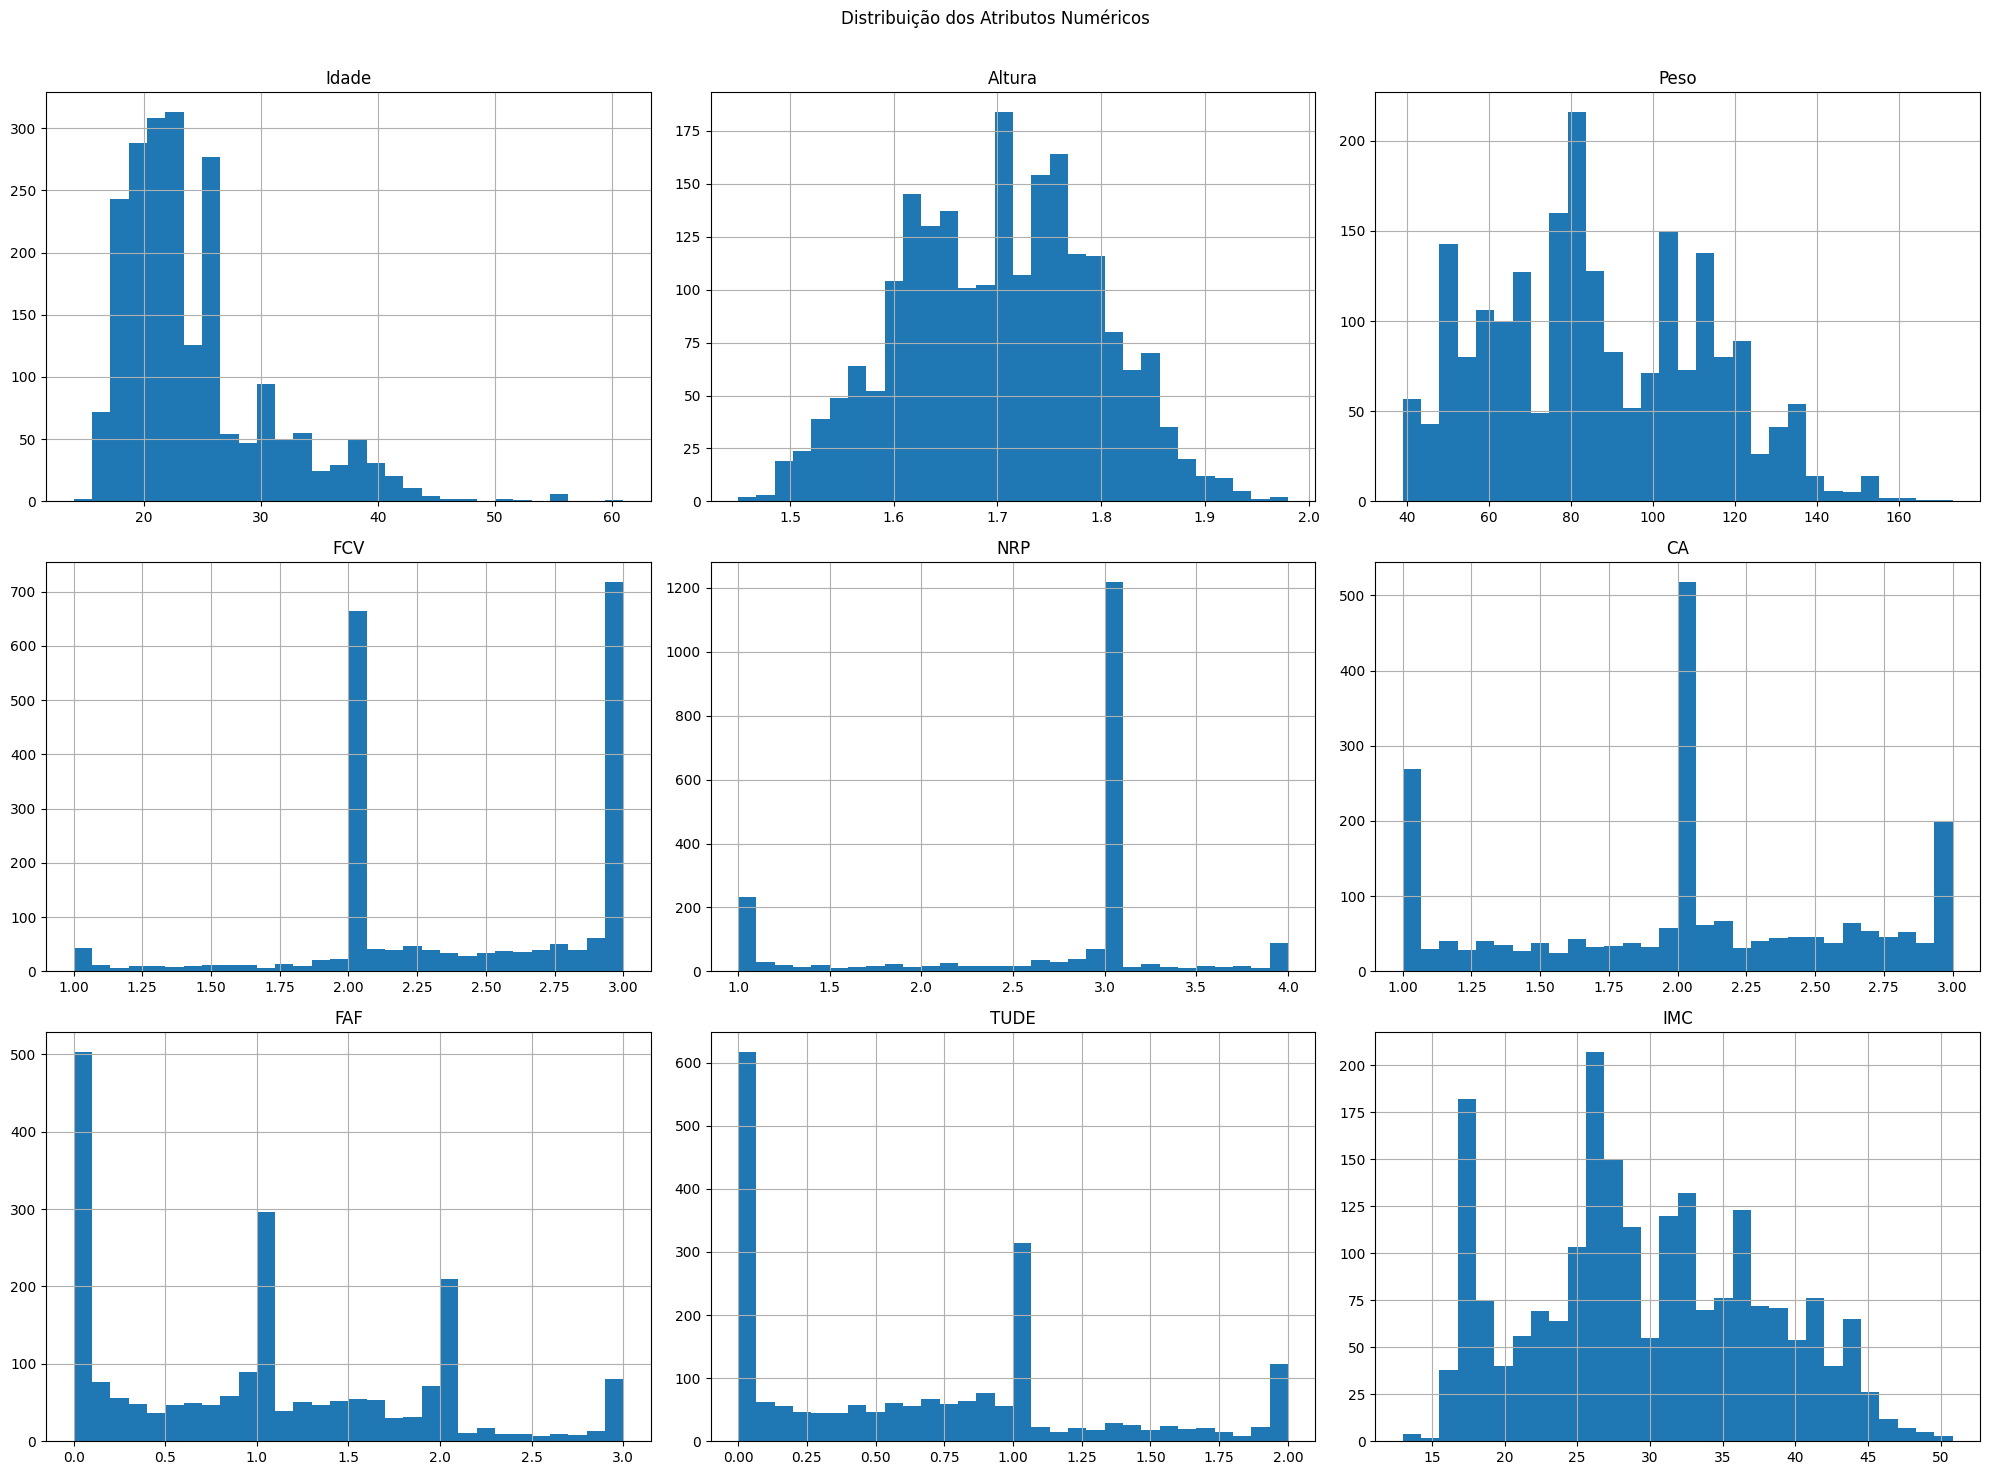

Distribuição dos atributos categóricos: 


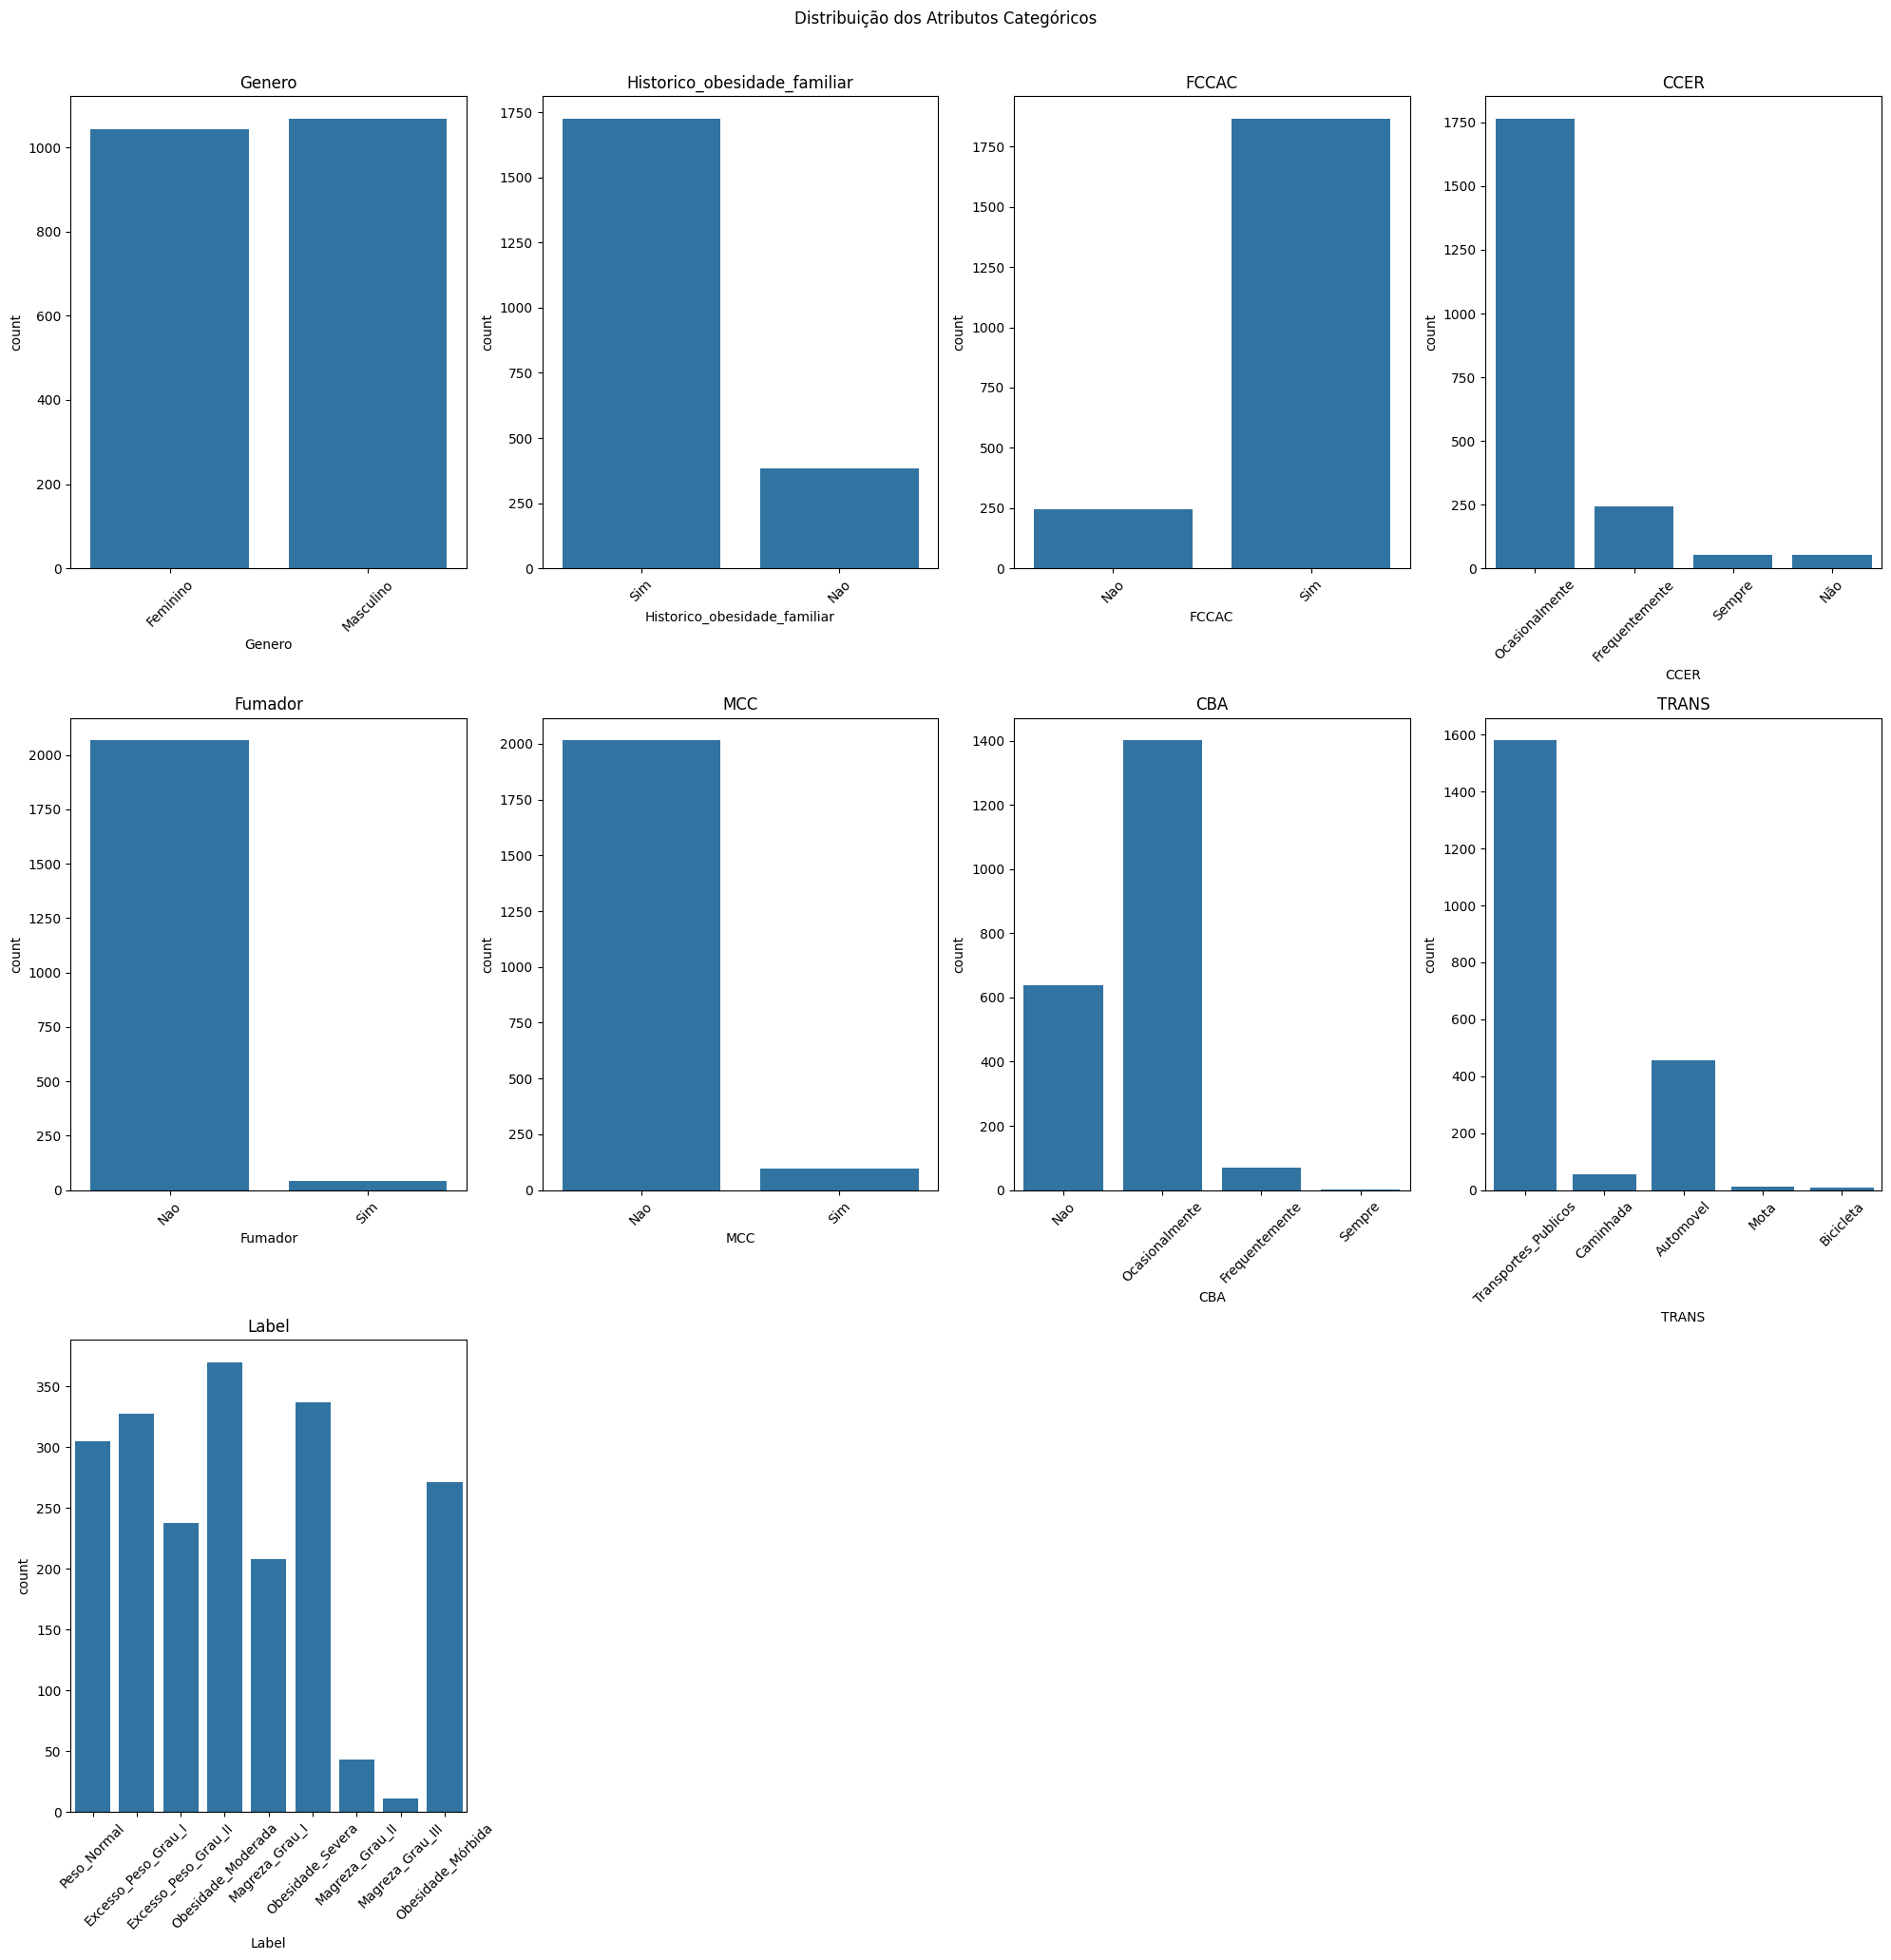

In [12]:
# Tirando a análise já feita anteriormente na Pergunta 1, como a verificação de valores iguais a 0, nulos ou NaN, a verificação da dimensão do dataset 
# e a verificação dos tipos de dados, vamos agora analisar os atributos do conjunto de dados mais significativos através de gráficos e outros métodos apropriados.

import matplotlib.pyplot as plt
import seaborn as sns

# Para fazer a análise dos atributos do conjunto de dados mais significativos, começamos por criar gráficos que representam a distribuição dos atributos numéricos e categóricos 
# através da biblioteca 'matplotlib'.

print("Distribuição dos atributos numéricos: ")

# Para os gráficos da distribuição dos atributos numéricos, selecionamos os dados do dataset que são do tipo float64 e criamos um histograma para cada um deles
atributos_numericos = obesidade.select_dtypes(include=['float64'])
atributos_numericos.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribuição dos Atributos Numéricos\n\n')
plt.tight_layout()
plt.show()

# Já para a distribuição dos atributos categóricos, aplicamos a mesma lógica, mas desta vez selecionamos os dados do dataset que são do tipo object
atributos_categoricos = obesidade.select_dtypes(include=['object'])
num_atributos_categoricos = len(atributos_categoricos.columns)

print("Distribuição dos atributos categóricos: ")

# E fazemos um ciclo for para criar os histogramas de cada atributo categórico
num_linhas = (num_atributos_categoricos // 4) + (num_atributos_categoricos % 4 > 0)
plt.figure(figsize=(20, 7*num_linhas))
plt.suptitle('Distribuição dos Atributos Categóricos\n\n\n')
for i, col in enumerate(atributos_categoricos.columns):
    plt.subplot(num_linhas, 4, i + 1)
    sns.countplot(x=col, data=obesidade)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# Após a análise dos atributos do conjunto de dados, foram verificados os outliers de cada atributo numérico através de boxplots.
plt.figure(figsize=(15, 10))
sns.boxplot(data=obesidade)
plt.title('Boxplots dos Atributos')
plt.show()

print("Idade média do dataset:", obesidade.Idade.mean().round(3))

print("\nPodemos ver que os únicos atributos com outliers significativos são a idade e o NRP (Número de Refeições Principais). Relativamente à idade, esses outliers devem-se ao facto da idade do dataset ter um valor médio de 24.313 anos, logo, os outliers podem ser considerados\ncomo valores normais porque correspondem a possíveis adultos com idades muito superiores à idade média do dataset.\nRelativamente ao NRP, podemos considerar os valores também como normais visto que o número de refeições principais varia de pessoa para pessoa, e os valores obtidos no dataset não parecem ser valores 'anormais'\n\n")


NameError: name 'sasa' is not defined

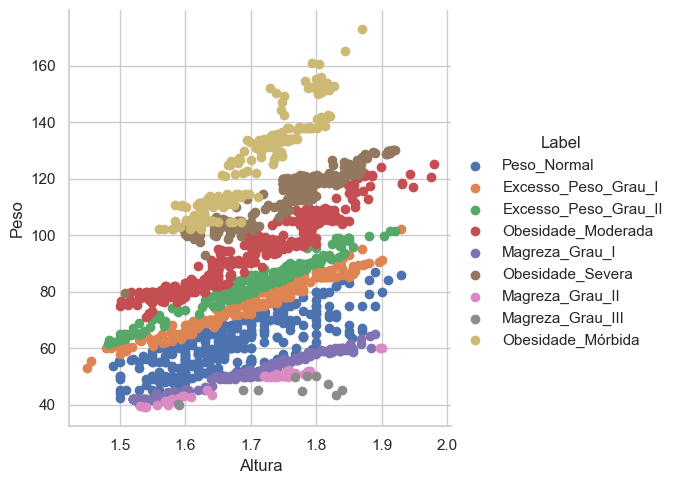

In [ ]:
# Depois da identificação de outliers, criamos um gráfico de dispersão para visualizar a relação entre o peso e a altura (IMC) de cada pessoa com a respetiva Label,
# que corresponde à categoria de risco de obesidade de cada indivíduo. O gráfico de dispersão foi criado através da biblioteca 'seaborn'

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(y='Peso', x='Altura', hue='Label', 
           data=obesidade, 
           fit_reg=False, scatter_kws={'alpha':1})


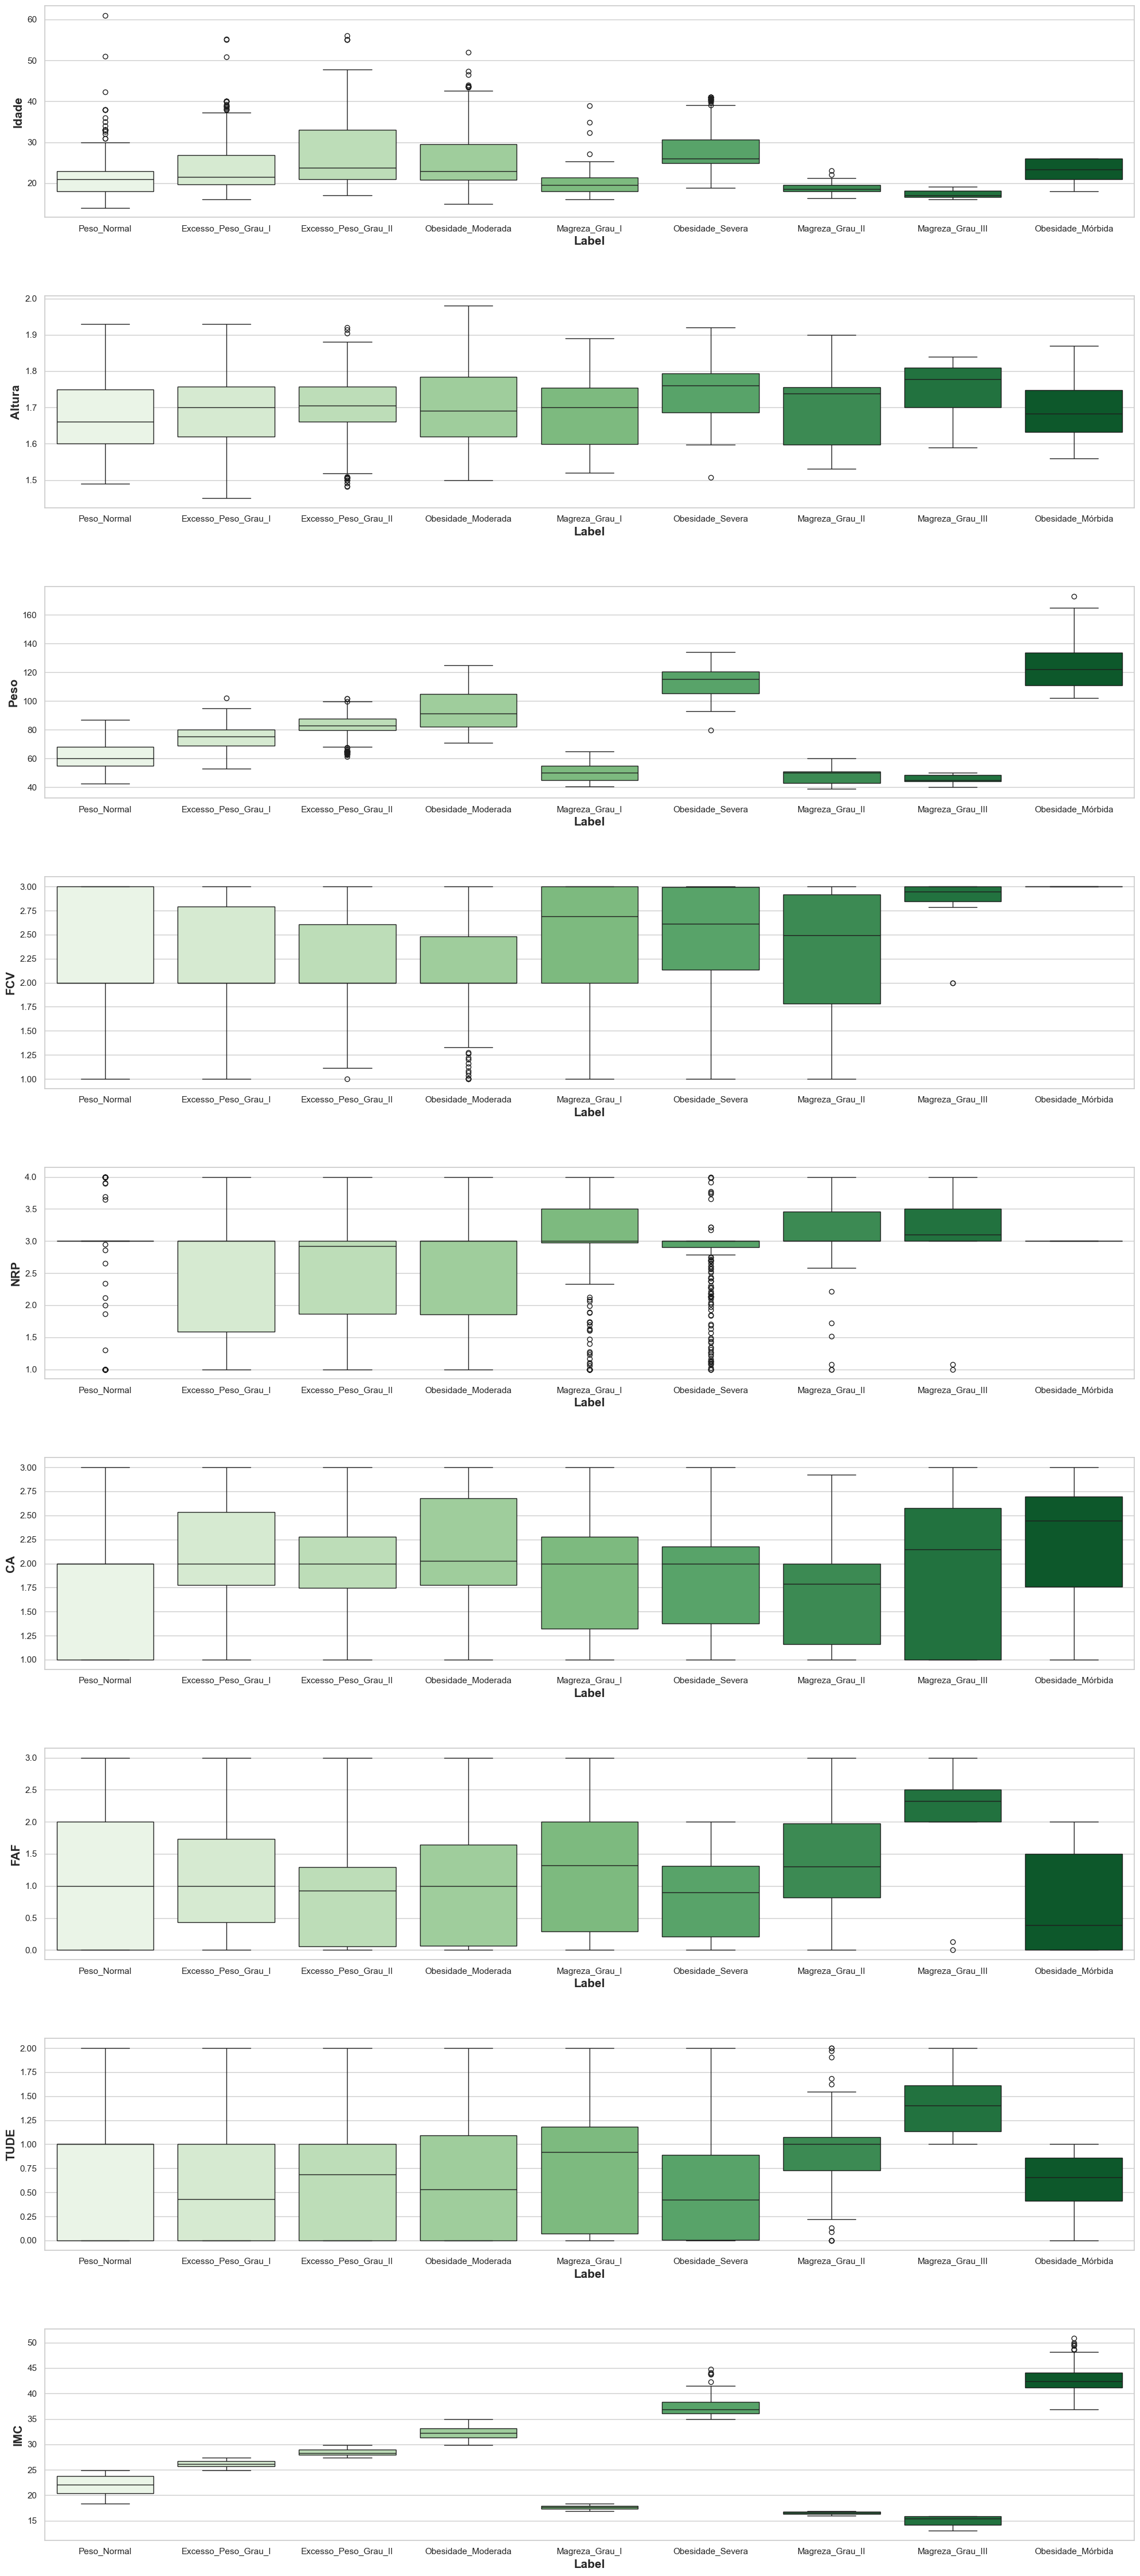

In [ ]:
# Na análise seguinte, verificamos a relação entre cada atributo numérico e a categoria de risco de obesidade (Label) através de boxplots.

# Começamos por excluir as variáveis categóricas
colunas_a_excluir = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS', 'Label']

# Filtramos as colunas
colunas_para_plotar = [col for col in obesidade.columns[1:] if col not in colunas_a_excluir]

# Definimos o número de colunas a plotar
num_colunas = len(colunas_para_plotar)

# Criamos os subplots
fig, ax = plt.subplots(num_colunas, 1, figsize=(20, 5 * num_colunas))
ax = ax.flatten()

# E plotamos os boxplots para as colunas filtradas
for i, col in enumerate(colunas_para_plotar):
    sns.boxplot(x='Label', y=col, data=obesidade, ax=ax[i], palette='Greens', hue='Label')
    ax[i].set_xlabel('Label', fontsize=15, fontweight='bold')
    ax[i].set_ylabel(col, fontsize=15, fontweight='bold')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8376\4056194189.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, data=obesidade, ax=ax[i], fill=True, lw=2, hue='Label')
C:\Users\User\AppData\Local\Temp\ipykernel_8376\4056194189.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=col, data=obesidade, ax=ax[i], fill=True, lw=2, hue='Label')


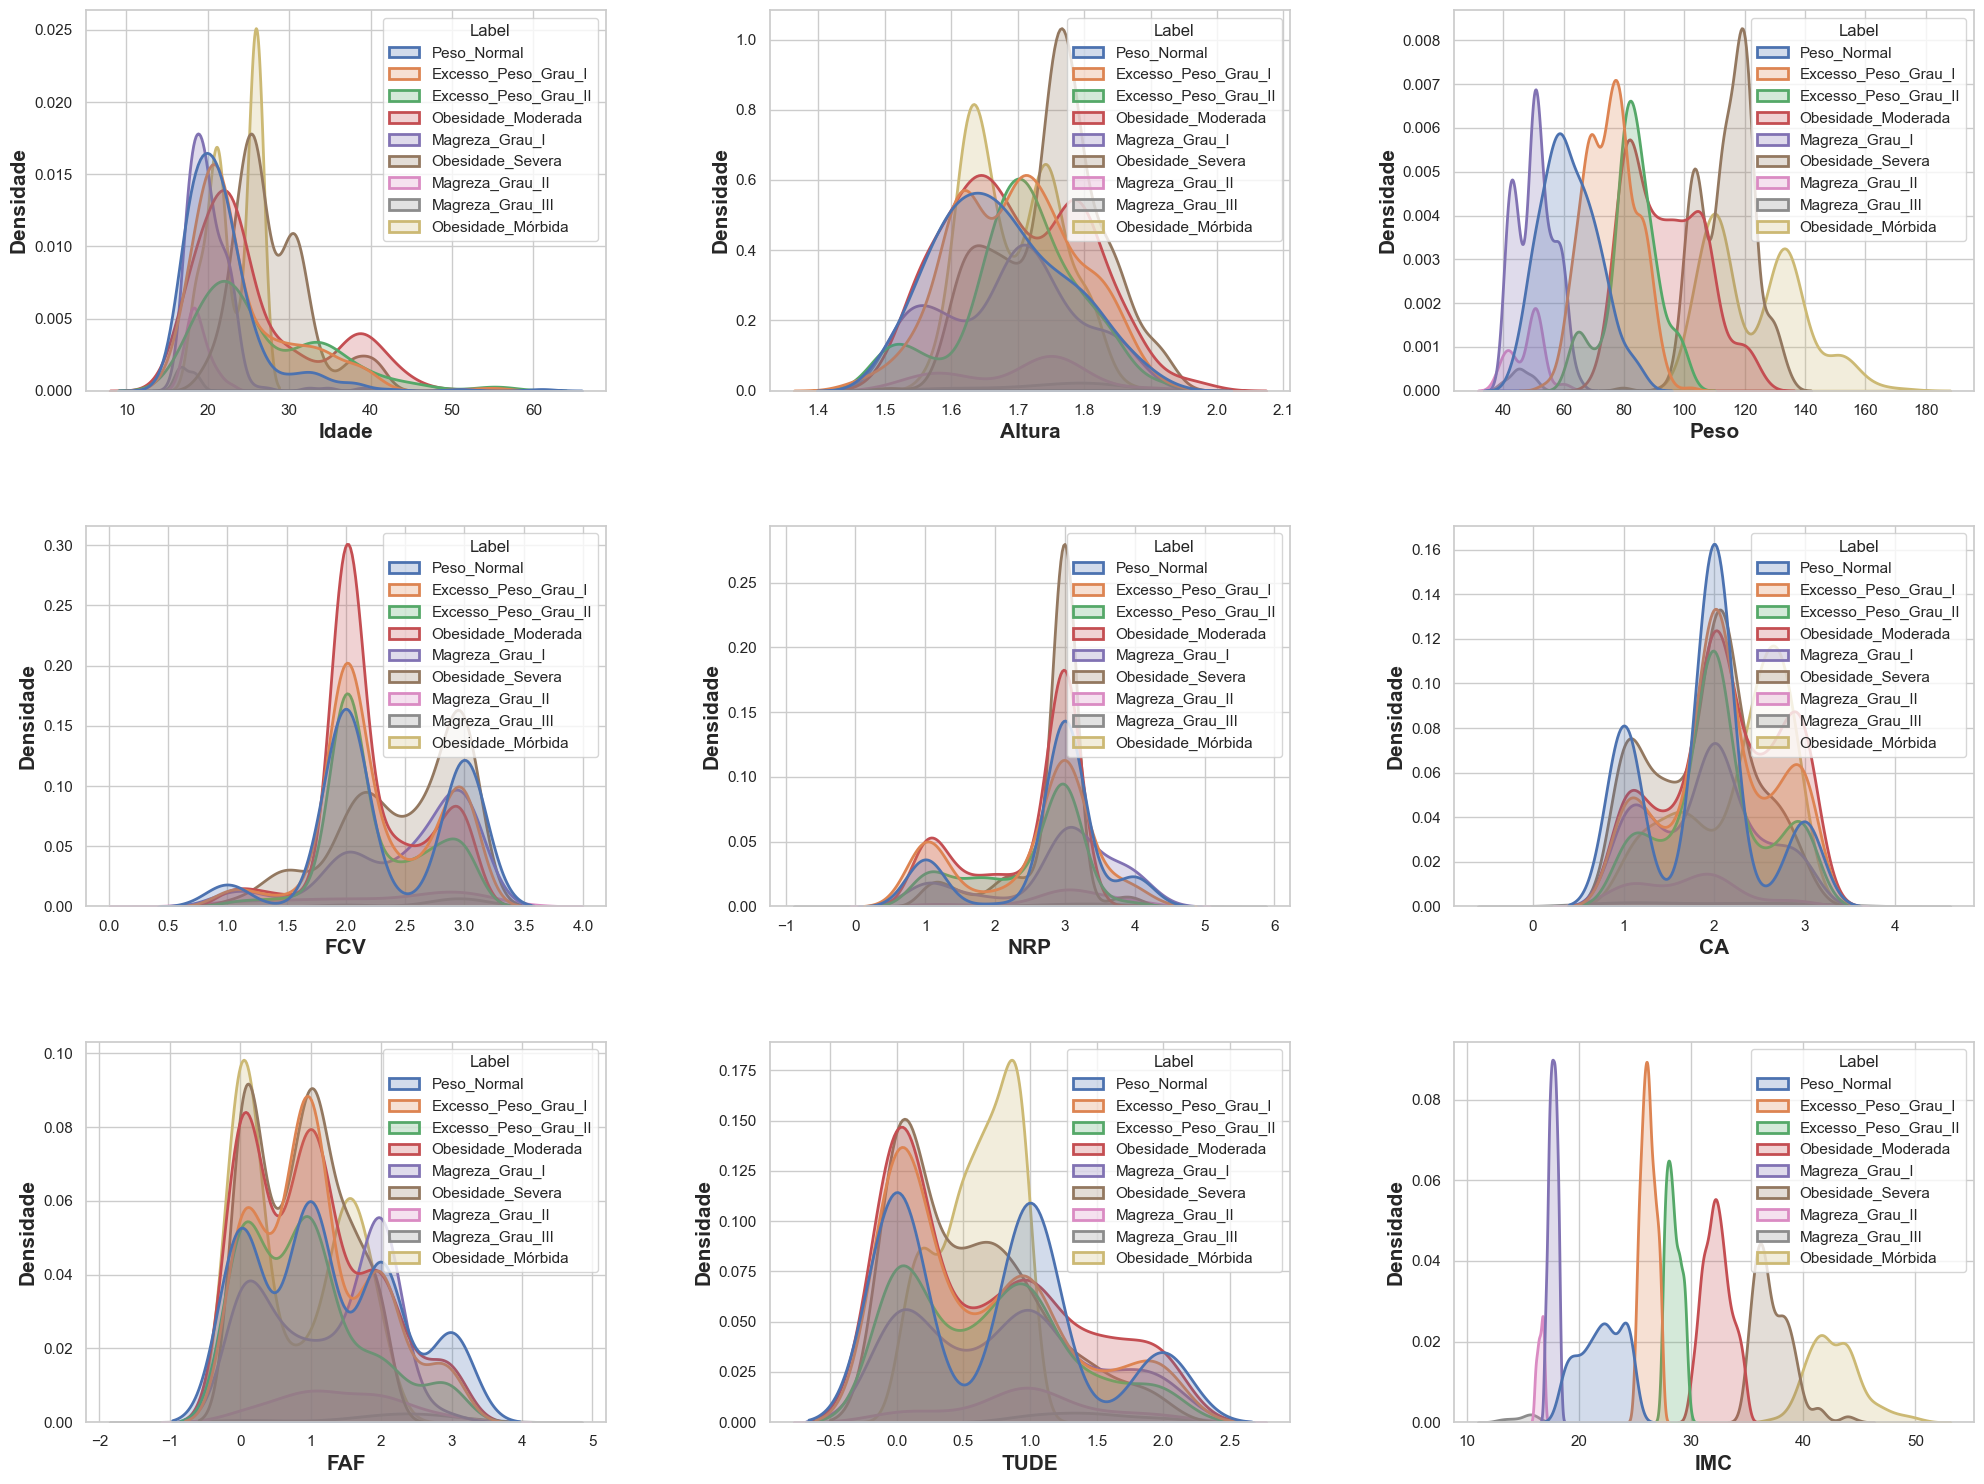

In [ ]:
# Outra análise foi feita através de gráficos de densidade. Os gráficos de densidade permitem visualizar a distribuição das variáveis contínuas, 
# revelando onde as observações estão mais concentradas, com destaque aos picos de densidade que indicam faixas de valores com maior frequência relativa dentro de diferentes categorias,
# permitindo assim a identificação de padrões e tendências nos dados

# Começamos por criar uma lista com as colunas a excluir
colunas_a_excluir = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS', 'Label']

# Filtramos as colunas
colunas_para_plotar = [col for col in obesidade.columns[1:] if col not in colunas_a_excluir]

# Definimos o número de colunas a plotar
num_colunas = len(colunas_para_plotar)

# Calculamos o número de linhas necessárias para exibir todas as colunas
num_linhas = (num_colunas + 2) // 3

# Criamos a figura e os eixos
fig, ax = plt.subplots(num_linhas, 3, figsize=(20, num_linhas * 5))
ax = ax.flatten()

# Plotamos as distribuições
for i, col in enumerate(colunas_para_plotar):
    sns.kdeplot(x=col, data=obesidade, ax=ax[i], fill=True, lw=2, hue='Label')
    ax[i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[i].set_ylabel('Densidade', fontsize=15, fontweight='bold')

# Removemos os eixos que não estão a ser utilizados
for j in range(num_colunas, num_linhas * 3):
    fig.delaxes(ax[j])

# E para finalizar, ajustamos o layout
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

##### Pergunta 4 - Realize o pré-processamento dos dados

### Alínea a) - Faça a identificação de NA e limpe o dataset, se aplicável

In [ ]:
# Nesta parte, vamos verificar se existem valores NaN e Null no conjunto de dados e, em caso afirmativo, vamos "limpar" o dataset, removendo esses valores.

# Verificamos se existem valores nulos no dataset
print(obesidade.isnull().sum()*100/obesidade.shape[0])

num_colunas_com_nulos = obesidade.isnull().sum().sum()

print("\nNúmero de colunas com valores nulos:", num_colunas_com_nulos)

# Selecionamos as colunas que pretendemos verificar onde existem valores igual a Null e a NaN (No caso, todas as colunas do dataset)
colunas_verificar = ['Genero', 'Idade', 'Altura', 'Peso', 'Historico_obesidade_familiar', 'FCCAC', 'FCV', 'NRP', 'CCER', 'Fumador', 'CA', 'MCC', 'FAF', 'TUDE', 'CBA', 'TRANS', 'Label']

# Verificamos se há valores nulos ou NaN nas colunas específicas
if obesidade[colunas_verificar].isnull().values.any() & num_colunas_com_nulos != 0:
    print("\nExistem valores iguais a 0, nulos ou NaN nas colunas especificadas.")
else:
    print("\nNão existem valores iguais a 0, nulos ou NaN nas colunas especificadas.")

print("\nComo foi possível verificar na pergunta 2 e agora na pergunta 4, não existem valores iguais a 0, nem valores Null ou NaN no dataset. Logo, não é necessário limpar o dataset.")

Genero                          0.0
Idade                           0.0
Altura                          0.0
Peso                            0.0
Historico_obesidade_familiar    0.0
FCCAC                           0.0
FCV                             0.0
NRP                             0.0
CCER                            0.0
Fumador                         0.0
CA                              0.0
MCC                             0.0
FAF                             0.0
TUDE                            0.0
CBA                             0.0
TRANS                           0.0
Label                           0.0
IMC                             0.0
dtype: float64

Número de colunas com valores nulos: 0

Não existem valores iguais a 0, nulos ou NaN nas colunas especificadas.

Como foi possível verificar na pergunta 2 e agora na pergunta 4, não existem valores iguais a 0, nem valores Null ou NaN no dataset. Logo, não é necessário limpar o dataset.


### Alínea b) - Identifique dados inconsistentes e outliers, se aplicável

In [ ]:
# Para a identificação de dados inconsistentes e outliers, foram definidos alguns intervalos para as variáveis numéricas, tal como está representado abaixo.
# Os valores escolhidos foram baseados nos boxplots criados na pergunta 3 e no sumário estatístico das variáveis numéricas, 
# que nos permitiram identificar os valores mínimos e máximos de cada variável numérica

intervalos_esperados = {
    'Idade': (0, 120),
    'Altura': (0.5, 2.5),  # Metros
    'Peso': (2, 200),      # Kg
    'FCV': (0, 4),
    'NRP': (0, 5),
    'CA': (0, 4),
    'FAF': (-1, 4),
    'TUDE': (-1, 3),
    'IMC': (0, 70)
}


# Neste ciclo 'for', foram verificados se existiam valores fora dos intervalos esperados
valores_inconsistentes = {}
for coluna, (min_val, max_val) in intervalos_esperados.items():
    valores_inconsistentes[coluna] = obesidade[(obesidade[coluna] < min_val) | (obesidade[coluna] > max_val)]
    print(f"Valores inconsistentes na coluna {coluna}:")
    print(valores_inconsistentes[coluna])
    print()

Valores inconsistentes na coluna Idade:
Empty DataFrame
Columns: [Genero, Idade, Altura, Peso, Historico_obesidade_familiar, FCCAC, FCV, NRP, CCER, Fumador, CA, MCC, FAF, TUDE, CBA, TRANS, Label, IMC]
Index: []

Valores inconsistentes na coluna Altura:
Empty DataFrame
Columns: [Genero, Idade, Altura, Peso, Historico_obesidade_familiar, FCCAC, FCV, NRP, CCER, Fumador, CA, MCC, FAF, TUDE, CBA, TRANS, Label, IMC]
Index: []

Valores inconsistentes na coluna Peso:
Empty DataFrame
Columns: [Genero, Idade, Altura, Peso, Historico_obesidade_familiar, FCCAC, FCV, NRP, CCER, Fumador, CA, MCC, FAF, TUDE, CBA, TRANS, Label, IMC]
Index: []

Valores inconsistentes na coluna FCV:
Empty DataFrame
Columns: [Genero, Idade, Altura, Peso, Historico_obesidade_familiar, FCCAC, FCV, NRP, CCER, Fumador, CA, MCC, FAF, TUDE, CBA, TRANS, Label, IMC]
Index: []

Valores inconsistentes na coluna NRP:
Empty DataFrame
Columns: [Genero, Idade, Altura, Peso, Historico_obesidade_familiar, FCCAC, FCV, NRP, CCER, Fumador,

In [ ]:
# Como podemos ver, não existem valores inconsistentes nem outliers no dataset, uma vez que todos os valores estão dentro dos intervalos esperados.

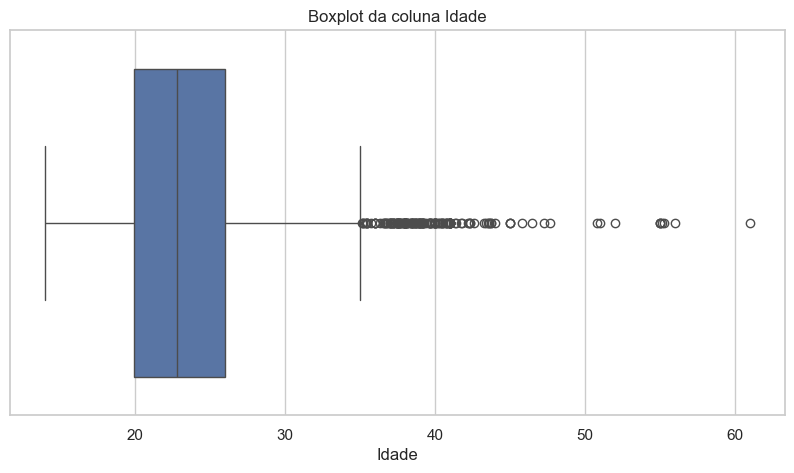

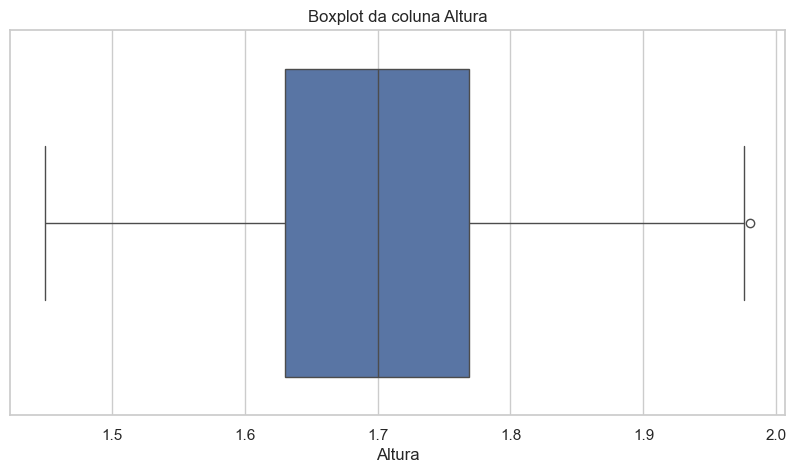

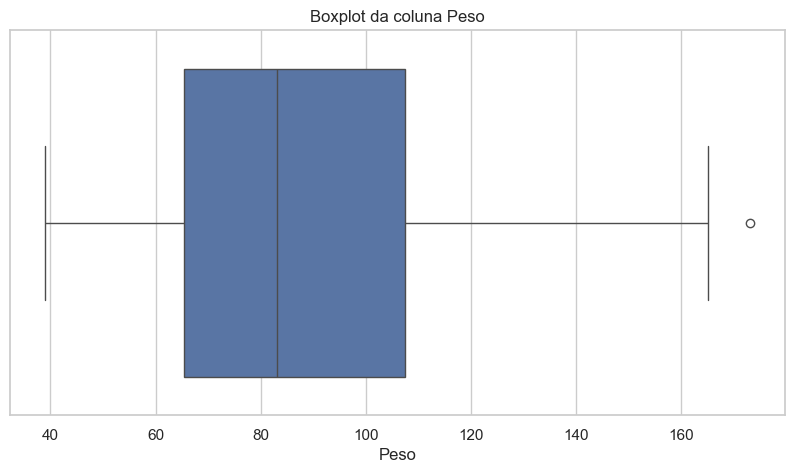

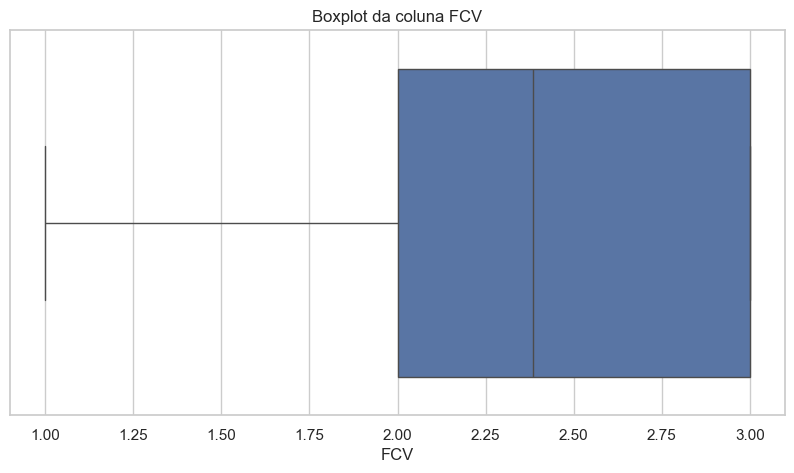

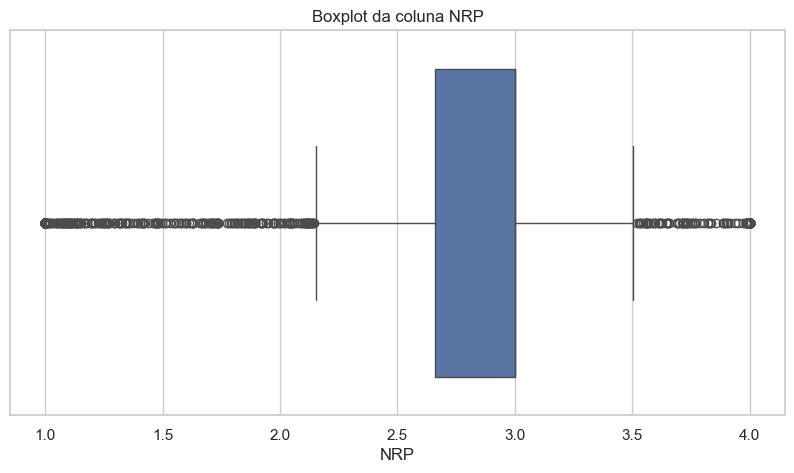

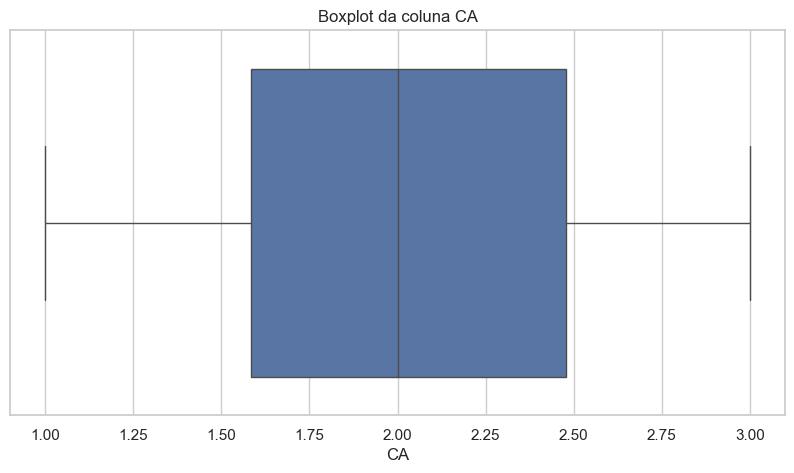

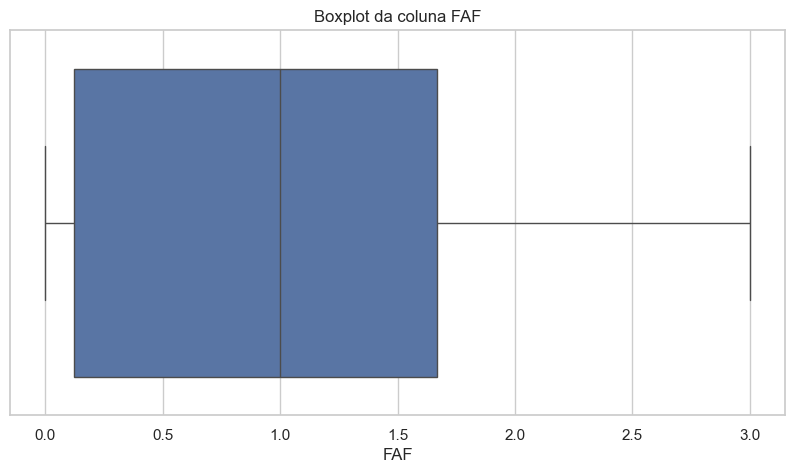

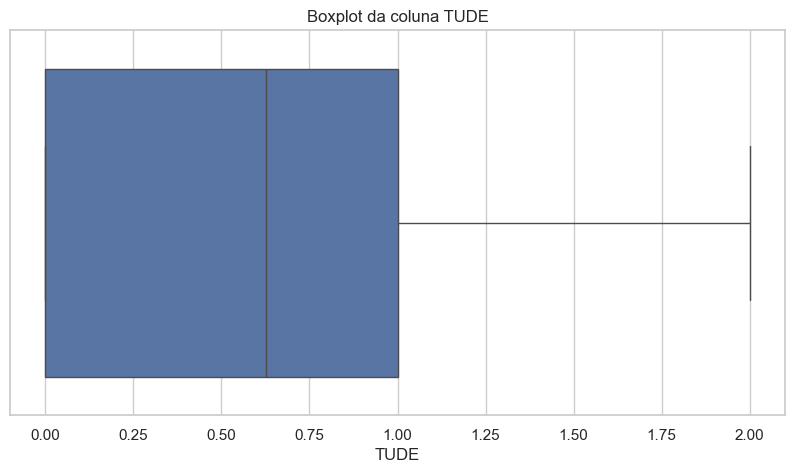

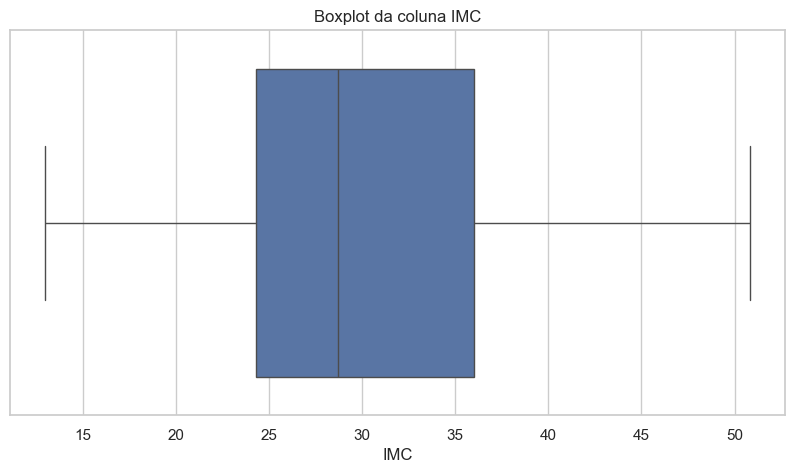

Número de outliers por coluna:
Altura    1
Peso      1
FCV       0
CA        0
FAF       0
TUDE      0
IMC       0
dtype: int64


In [ ]:
# Para a reforçar a verificação de dados inconsistentes e outliers, vamos criar boxplots para cada atributo numérico (tal como foi feito na Pergunta 3) e, de seguida, 
# vamos aplicar o método do IQR (GeekForGeeks [referência 4]) para detetar e remover os outliers.

# Primeiro, selecionamos as colunas categóricas para não serem incluídas na análise de outliers
colunas_categoricas = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS', 'Label']

# Criamos boxplots para a visualização de outliers
for col in obesidade.columns:
    if col not in colunas_categoricas:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=obesidade[col])
        plt.title(f'Boxplot da coluna {col}')
        plt.show()

# Utilizamos o método do IQR para detecção de outliers (GeekForGeeks [referência 4])
numeric_cols = obesidade.select_dtypes(include=['float64']).columns

# Como foi assumido que os outliers da coluna "Idade" e da coluna "NRP" são valores normais, não removemos os outliers destas colunas
numeric_cols = numeric_cols.drop('Idade', errors='ignore')
numeric_cols = numeric_cols.drop('NRP', errors='ignore')
Q1 = obesidade[numeric_cols].quantile(0.25)
Q3 = obesidade[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((obesidade[numeric_cols] < (Q1 - 1.5 * IQR)) | (obesidade[numeric_cols] > (Q3 + 1.5 * IQR)))
print("Número de outliers por coluna:")
print(outliers.sum())

# Removemos os outliers
obesidade_cleaned = obesidade[~((obesidade[numeric_cols] < (Q1 - 1.5 * IQR)) | (obesidade[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

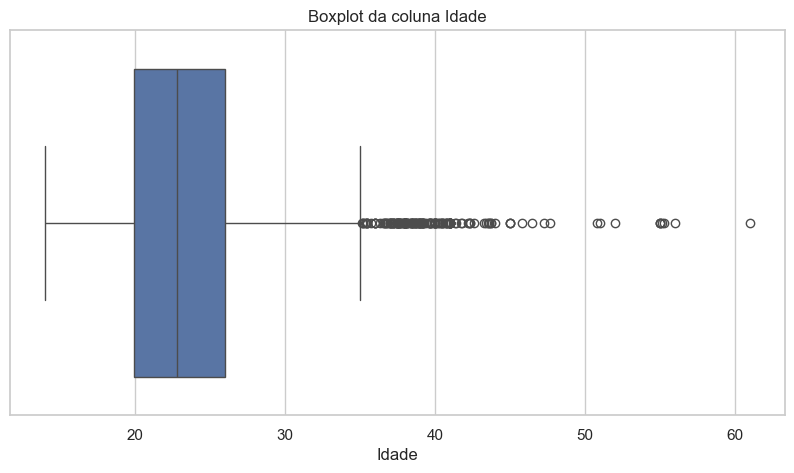

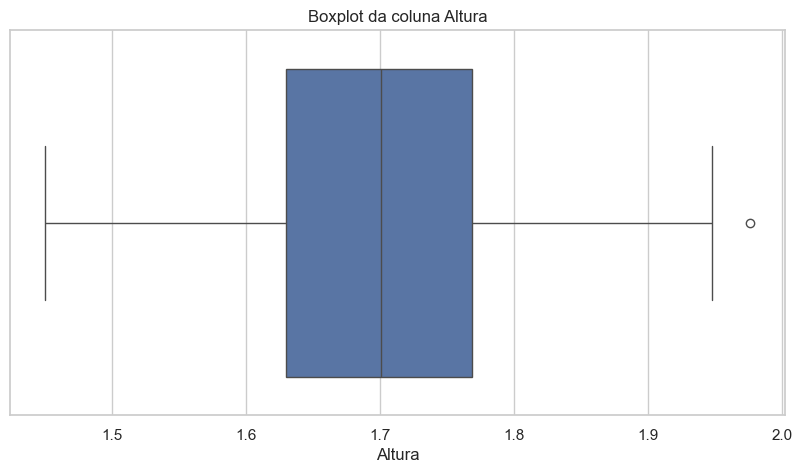

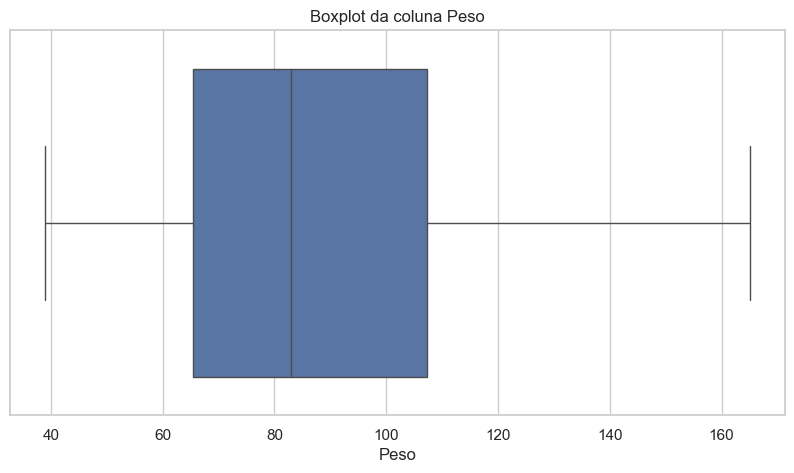

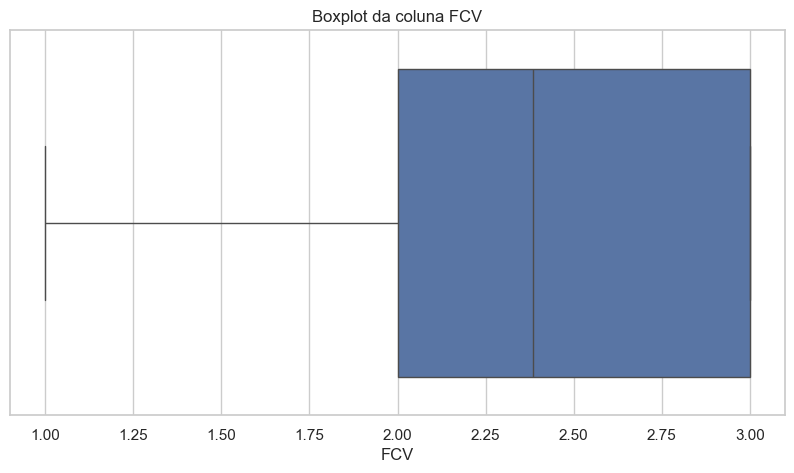

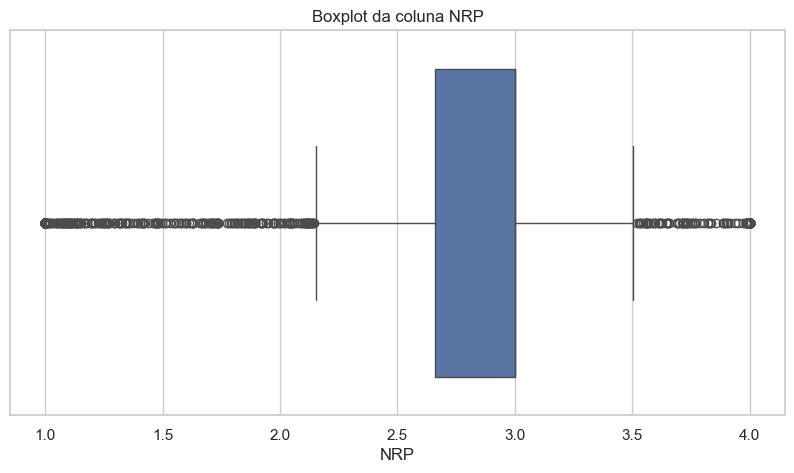

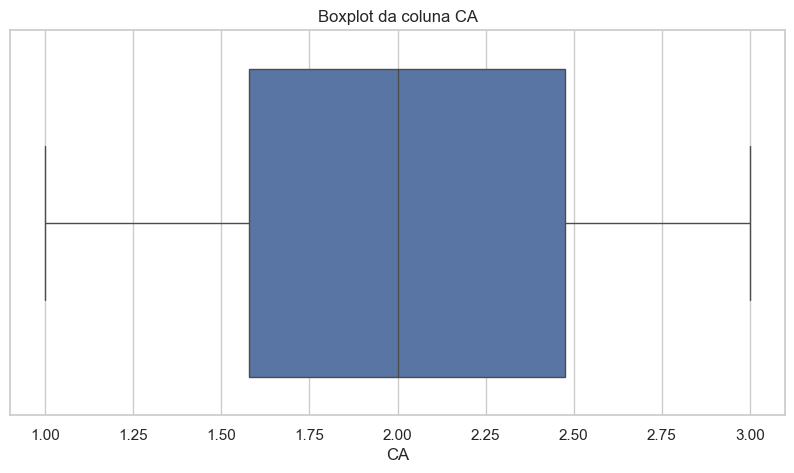

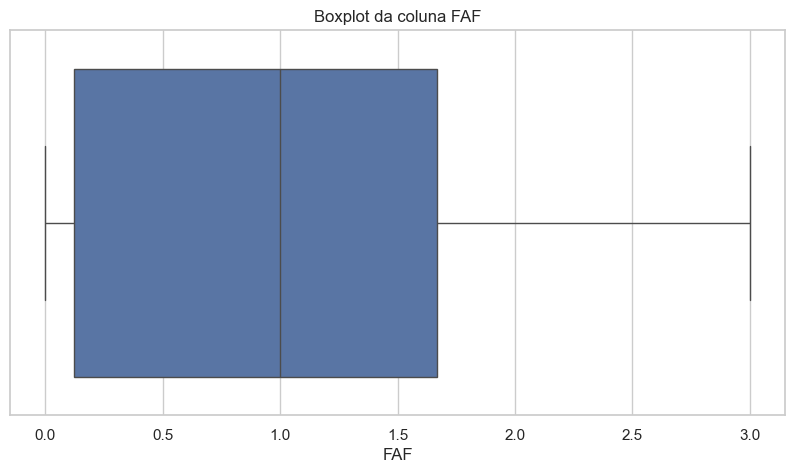

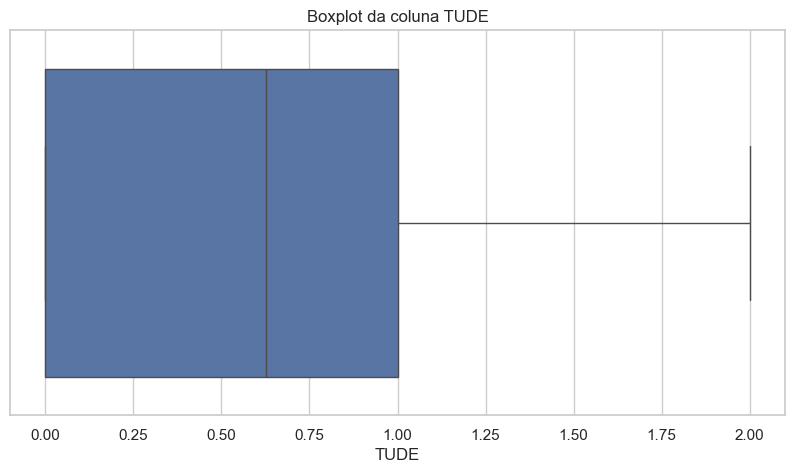

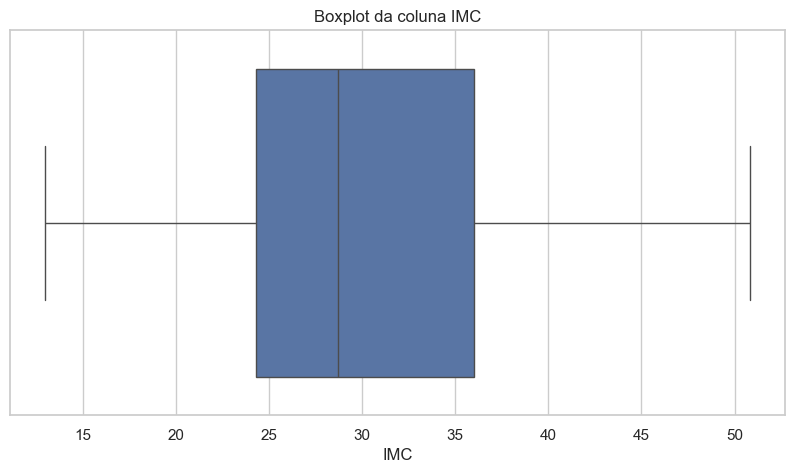

In [ ]:
# Como podemos ver, não existem praticamente outliers nas colunas do dataset, com exceção da coluna "Altura" e "Peso". Pela observação dos gráficos, foi possível detetar outliers relativos à coluna "Idade"
# e à coluna "NRP", mas como foi assumido que esses valores são normais, não foram removidos.
# Com os outliers removidos, criamos boxplots para a verificar a remoção dos mesmos
for col in obesidade_cleaned.columns:
    if col not in colunas_categoricas:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=obesidade_cleaned[col])
        plt.title(f'Boxplot da coluna {col}')
        plt.show()

In [ ]:
# Como podemos ver, todos os outliers foram removidos com sucesso.

In [ ]:
obesidade_cleaned.describe()

# Para a pergunta 2 da 4.2!
obesidade_cleaned2 = obesidade_cleaned.copy()

### Alínea c) - Implemente a seleção de atributos, se aplicável

In [ ]:
# Nesta alínea, tomamos a decisão de que todos os atributos são significativos para obter a melhor performance possível na previsão de atributos.

### Alínea d) - Implemente a normalização dos dados, se necessário

Para  a normalização dos dados, foi utilizada a seguinte função:
$$ y' = \frac{{y - \text{{min}}_y}}{{\text{{max}}_y - \text{{min}}_y}} $$


Esta função realiza a normalização min-max que mapeia os valores das variáveis no intervalo [0-1]

Foi realizada a normalização dos dados porque quase todas as variáveis têm escalas diferentes e algumas delas têm uma disparidade significativa

In [ ]:
# Começamos por criar a função de normalização dos dados
def normalize(y):
    y_norm=((y-np.min(y))/(np.max(y)-np.min(y)))
    return y_norm

In [ ]:
# De seguida, foi necessário converter os dados categóricos em dados numéricos. Para isso, utilizamos o método Label Encoding.
# O label encoding é uma técnica de pré-processamento de dados que converte os valores de uma coluna categórica em valores numéricos. Ou seja, cada valor único na coluna é substituído por um número inteiro. 

from sklearn.preprocessing import LabelEncoder

# Começamos por inicializar o LabelEncoder
le = LabelEncoder()

# Selecionamos as colunas que pretendemos codificar
colunas_para_codificar = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'CCER', 'Fumador', 'MCC', 'CBA', 'TRANS', 'Label']

# E aplicamos o Label Encoding para cada coluna
for coluna in colunas_para_codificar:
    obesidade_cleaned[coluna] = le.fit_transform(obesidade_cleaned[coluna])


C:\Users\User\AppData\Local\Temp\ipykernel_8376\799026803.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesidade_cleaned[coluna] = le.fit_transform(obesidade_cleaned[coluna])
C:\Users\User\AppData\Local\Temp\ipykernel_8376\799026803.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesidade_cleaned[coluna] = le.fit_transform(obesidade_cleaned[coluna])
C:\Users\User\AppData\Local\Temp\ipykernel_8376\799026803.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
# Como podemos ver nesta tabela, as variáveis categóricas foram codificadas com sucesso.
obesidade_cleaned.head()

Genero  Idade  Altura  Peso  Historico_obesidade_familiar  FCCAC  FCV  NRP  \
0       0   21.0    1.62  64.0                             1      0  2.0  3.0   
1       0   21.0    1.52  56.0                             1      0  3.0  3.0   
2       1   23.0    1.80  77.0                             1      0  2.0  3.0   
3       1   27.0    1.80  87.0                             0      0  3.0  3.0   
4       1   22.0    1.78  89.8                             0      0  2.0  1.0   

   CCER  Fumador   CA  MCC  FAF  TUDE  CBA  TRANS  Label     IMC  
0     2        0  2.0    0  0.0   1.0    1      4      8  24.387  
1     2        1  3.0    1  3.0   0.0    2      4      8  24.238  
2     2        0  2.0    0  2.0   1.0    0      4      8  23.765  
3     2        0  2.0    0  2.0   0.0    0      2      0  26.852  
4     2        0  2.0    0  0.0   0.0    2      4      1  28.342

In [ ]:
# De seguida, vamos fazer a normalização dos dados através da função de normalização criada acima

# Verificação dos dados antes da normalização
obesidade_cleaned.IMC.describe()

count    2109.000000
mean       29.689765
std         8.003417
min        12.999000
25%        24.314000
50%        28.716000
75%        36.013000
max        50.812000
Name: IMC, dtype: float64

In [ ]:
# Normalização dos dados
data_norm = obesidade_cleaned.apply(normalize)

In [ ]:
# Sumário do atributo IMC depois da normalização
data_norm['IMC'].describe()

count    2109.000000
mean        0.441403
std         0.211658
min         0.000000
25%         0.299236
50%         0.415651
75%         0.608627
max         1.000000
Name: IMC, dtype: float64

In [ ]:
# Sumário dos dados depois da normalização
data_norm.describe()

Genero        Idade       Altura         Peso  \
count  2109.000000  2109.000000  2109.000000  2109.000000   
mean      0.505453     0.219524     0.478378     0.377026   
std       0.500089     0.135038     0.177071     0.207227   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.126556     0.342425     0.209619   
50%       1.000000     0.187009     0.476001     0.349048   
75%       1.000000     0.255319     0.605397     0.541174   
max       1.000000     1.000000     1.000000     1.000000   

       Historico_obesidade_familiar        FCCAC          FCV          NRP  \
count                   2109.000000  2109.000000  2109.000000  2109.000000   
mean                       0.817449     0.883831     0.709483     0.561777   
std                        0.386390     0.320503     0.266976     0.259449   
min                        0.000000     0.000000     0.000000     0.000000   
25%                        1.000000     1.000000     0.500000     0.552880   
50%                        1.000000     1.000000     0.692751     0.666667   
75%                        1.000000     1.000000     1.000000     0.666667   
max                        1.000000     1.000000     1.000000     1.000000   

              CCER      Fumador           CA          MCC          FAF  \
count  2109.000000  2109.000000  2109.000000  2109.000000  2109.000000   
mean      0.590643     0.020863     0.503772     0.045519     0.336611   
std       0.224630     0.142959     0.306432     0.208489     0.283574   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.666667     0.000000     0.289604     0.000000     0.040528   
50%       0.666667     0.000000     0.500000     0.000000     0.333333   
75%       0.666667     0.000000     0.738001     0.000000     0.555463   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              TUDE          CBA        TRANS        Label          IMC  
count  2109.000000  2109.000000  2109.000000  2109.000000  2109.000000  
mean      0.328771     0.543702     0.766240     0.538822     0.441403  
std       0.304562     0.182661     0.413472     0.359371     0.211658  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.333333     0.750000     0.125000     0.299236  
50%       0.312675     0.666667     1.000000     0.625000     0.415651  
75%       0.500000     0.666667     1.000000     0.875000     0.608627  
max       1.000000     1.000000     1.000000     1.000000     1.000000

### Pergunta 5 - Crie um diagrama de correlação entre todos os atributos e comente o que observa

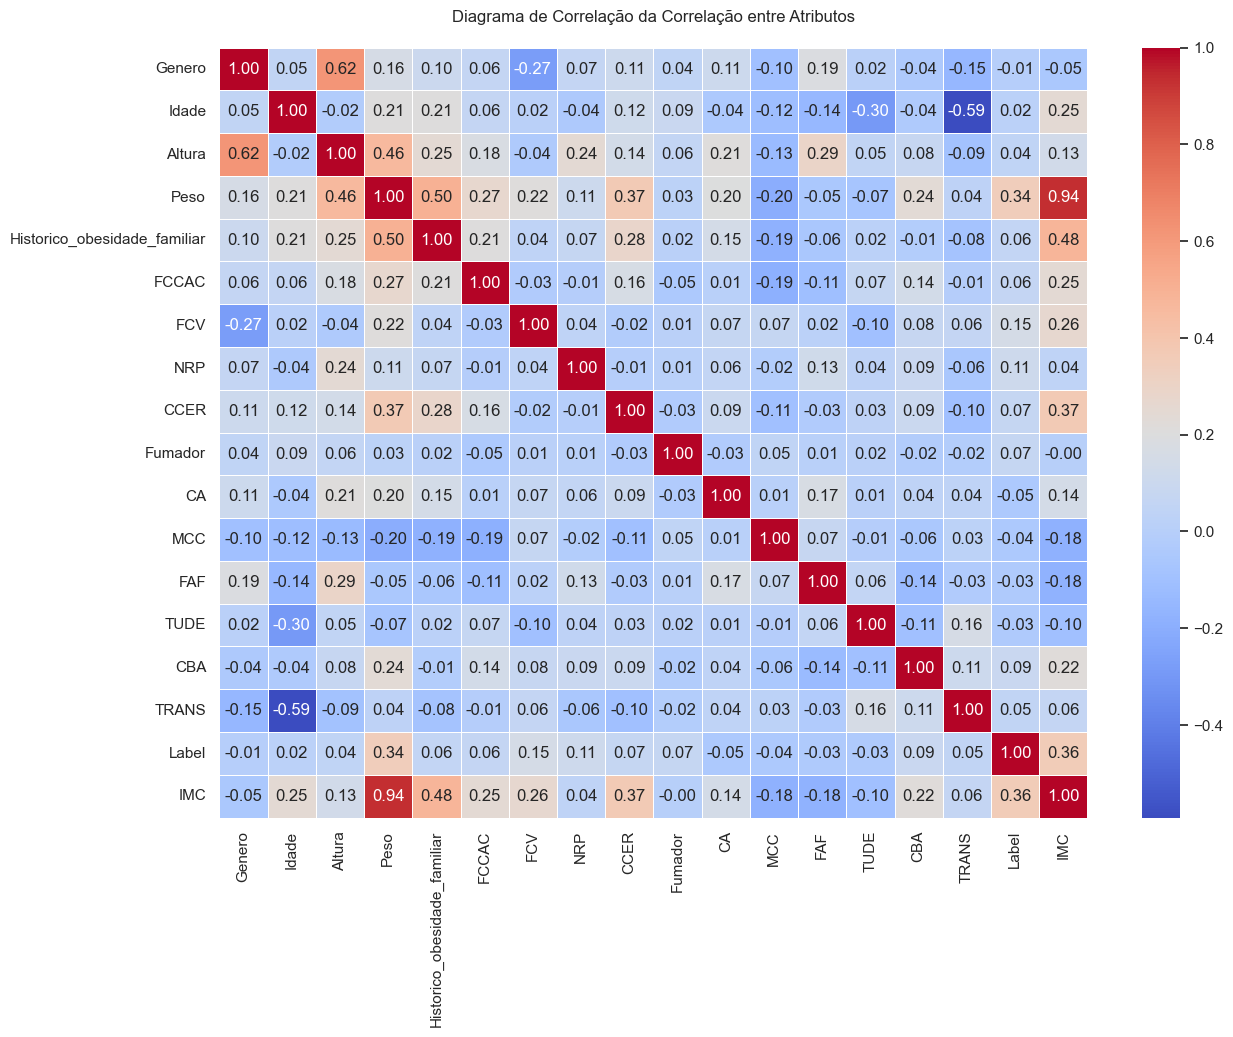

In [ ]:
# Depois de codificar as variáveis categóricas, vamos criar um diagrama de correlação com todos os atributos do dataset, para verificar a relação entre eles.
correlation_matrix = obesidade_cleaned.corr()

# Plotamos o diagrama de correlação
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Diagrama de Correlação da Correlação entre Atributos\n')
plt.show()

In [ ]:
# Como podemos ver, a correlação entre os atributos é bastante baixa, o que indica que os atributos são independentes uns dos outros. 
# Existem, no entanto, alguma relações fortes entre alguns atributos. Como por exemplo, o Peso e o IMC estão fortemente positivamente correlacionados, o que é esperado, 
# visto que o IMC é calculado com base no peso. Relativamente à altura, a baixa correlação com o IMC pode ser explicada pelo facto que o IMC é mais influencidado pelo peso do que pela altura, devido à formula do IMC, ou seja, a baixa correlação 
# entre a altura e o IMC não se deve apenas à pequena variação absoluta nas alturas entre pessoas, mas sim à maneira como o IMC é calculado e como o peso varia mais significativamente entre indivíduos.
# A forte correlação positiva entre a Altura e o Género também é esperada, visto que os homens tendem a ser mais altos que as mulheres.
# A fraca correlação negativa entre os Transportes e a Idade pode ser explicada pelo facto de as pessoas mais jovens tenderem a usar mais os transportes públicos do que as pessoas mais velhas.
# Realçar que os transportes públicos é o tipo de transporte mais abundante na coluna "TRANS"

### Pergunta 6 - Obtenha um modelo de regressão linear simples para a variável “IMC” usando o atributo relativo à “Idade” de cada registo:

### Alínea a) - Apresente a função linear resultante

In [ ]:
# Para a criação do modelo de regressão linear, vamos utilizar a biblioteca 'sklearn' e a função 'LinearRegression'. 
# Foi também utilizada a função 'train_test_split' para dividir o dataset em dados de treino e de teste.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

# Começamos por extrair as variáveis independentes (X) e dependentes (y)
X = obesidade_cleaned[['Idade']]
y = obesidade_cleaned['IMC']

# E começamos a criar o modelo de regressão linear. Foi utilizado um test size de 20% visto que na alínea c) da pergunta 6, é referido o seguinte: 
# "Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo sobre os 20% casos de teste". Logo, foi assumido que o test size é de 20%.

# Tal como dito anteriormente, utilizamos a função 'train_test_split' para dividir o dataset em dados de treino e de teste.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=100)

# E imprime-se as dimensões dos dados de treino e de teste
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1687, 1)
X_test shape: (422, 1)
y_train shape: (1687,)
y_test shape: (422,)


In [ ]:
# Iniciamos o modelo de regressão linear
regression = LinearRegression()

# Treinamos o modelo de regressão linear
regression.fit(X_train, y_train)

# Retiramos os coeficientes da função linear
coeficiente = regression.coef_[0]
intercepto = regression.intercept_

# E Apresentamos a função linear resultante
print(f"A função linear resultante é: IMC = {coeficiente:.2f} * Idade + {intercepto:.2f}")

A função linear resultante é: IMC = 0.28 * Idade + 22.75


### Alínea b) - Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão

(0.0, 52.70265)

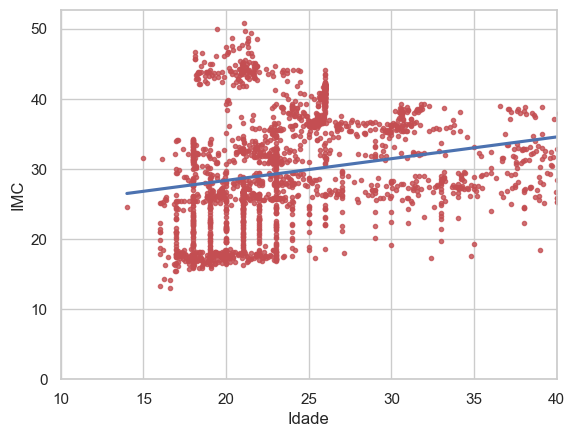

In [ ]:
# Para a visualização do modelo de regressão linear, vamos criar um gráfico de dispersão com a linha de regressão.
# Para isso foi utilizado a biblioteca 'seaborn' e a função 'regplot'.

sns.regplot(x="Idade", y="IMC", data=obesidade_cleaned, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(10,40)
plt.ylim(ymin=0)

### Alínea c) - Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo sobre os 20% casos de teste

In [ ]:
# Para calcular o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE) do modelo sobre os 20% casos de teste, 
# foi utilizada a função 'mean_absolute_error' da biblioteca 'sklearn.metrics'

from sklearn.metrics import mean_absolute_error

y_pred = regression.predict(X_test)

# Apresentação do MAE e RMSE
print("MAE:", mean_absolute_error(y_test, y_pred).round(4))

RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
print("RMSE: {:.4f}".format(RMSE))

print("\nMediante os resultados obtidos, podemos concluir que os valores obtidos não parcem ser excessivamente elevados, embora isso indique que o modelo de regressão linear pode não ser totalemente preciso.")

MAE: 6.519
RMSE: 7.8541

Mediante os resultados obtidos, podemos concluir que os valores obtidos não parcem ser excessivamente elevados, embora isso indique que o modelo de regressão linear pode não ser totalemente preciso.


### Alínea d) - Teste se é possível obter um modelo de regressão linear simples com melhor resultado, utilizando outra variável dos preditores disponíveis no dataset.

In [ ]:
# Visto que, através do diagrama de correlação, foi possível verificar que a correlação entre o Peso e o IMC é a relação mais forte, 
# foi testado um modelo de regressão linear simples com estas duas variáveis. O procedimento foi o mesmo que o anterior.

# Extraimos as variáveis independentes (X) e dependentes (y)
X = obesidade_cleaned[['Peso']]
y = obesidade_cleaned['IMC']

# utilizamos a função 'train_test_split' para dividir o dataset em dados de treino e de teste.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=100)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1687, 1)
X_test shape: (422, 1)
y_train shape: (1687,)
y_test shape: (422,)


In [ ]:
# Iniciamos o modelo de regressão linear
regression = LinearRegression()

# Treinamos o modelo de regressão linear
regression.fit(X_train, y_train)

# Retiramos os coeficientes da função linear
coeficiente = regression.coef_[0]
intercepto = regression.intercept_

# E apresentamos a função linear resultante
print(f"A função linear resultante é: IMC = {coeficiente:.2f} * Peso + {intercepto:.2f}")

A função linear resultante é: IMC = 0.28 * Peso + 5.02


(0.0, 54.145736968073955)

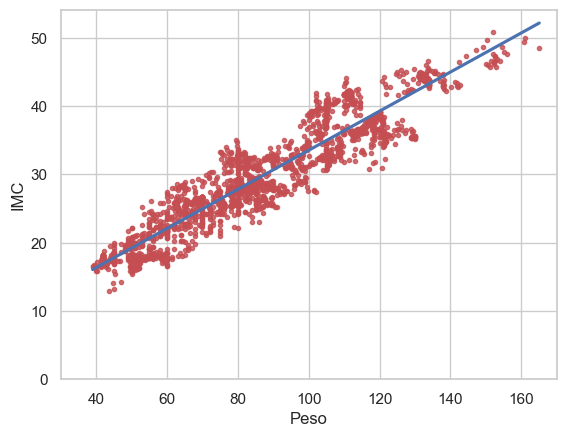

In [ ]:
# Criamos um gráfico de dispersão com a linha de regressão
sns.regplot(x="Peso", y="IMC", data=obesidade_cleaned, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(30,170)
plt.ylim(ymin=0)

In [ ]:
# E calculamos o MAE e RMSE para o modelo de regressão linear criado

from sklearn.metrics import mean_absolute_error

y_pred = regression.predict(X_test)

print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred).round(5))

RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
print("Root Mean Square Error (RMSE): {:.4f}".format(RMSE))

print("\nComo podemos ver, o MAE e o RMSE obtidos são bastante baixos, o que pode indicar que o modelo de regressão linear é preciso quando se utiliza o Peso como variável independente em relação ao IMC.")

Mean Absolute Error (MAE):  2.36519
Root Mean Square Error (RMSE): 2.9047

Como podemos ver, o MAE e o RMSE obtidos são bastante baixos, o que pode indicar que o modelo de regressão linear é preciso quando se utiliza o Peso como variável independente em relação ao IMC.


### Pergunta 7 - Tendo em conta o conjunto de dados apresentado, pretende-se prever o atributo “IMC”, aplicando os seguintes modelos (para os modelos sugeridos, o conjunto de atributos a utilizar pode variar):


###  Alínea a) - Regressão linear múltipla.

In [ ]:
# Para a criação do modelo de regressão múltipla, utilizamos as 4 variáveis mais correlacionadas com o IMC, que são o Peso, Historico de obesidade familiar, 
# CCER e a Label. Tal facto foi verificado através do diagrama de correlação criado na pergunta 5

# Começamos por extrair as variáveis independentes (X) e dependentes (y)
X = obesidade_cleaned[['Peso', 'Historico_obesidade_familiar', 'CCER', 'Label']].to_numpy()
y = obesidade_cleaned.IMC

In [ ]:
# Fazemos a divisão dos dados em dados de treino e de teste (30% dos dados para teste e 70% para treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [ ]:
# Treinamos o modelo de regressão linear múltipla
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazemos uma correção nos nomes a apresentar nos coeficientes do modelo
feature_names = ['Peso', 'Historico_obesidade_familiar', 'CCER', 'Label', 'FCV']

# E apresentamos os coeficientes do modelo
print("Intercept: ", mlr.intercept_)
print("Coefficients: ")
print(list(zip(feature_names, mlr.coef_)))


Intercept:  4.40610477798252
Coefficients: 
[('Peso', 0.2737440644775815), ('Historico_obesidade_familiar', 0.3593204798605047), ('CCER', 0.4109758552131435), ('Label', 0.12375334317066006)]


$$
\text{Equação de Regressão} = 4.406 + (0.274 \cdot \text{Peso}) + (0.359 \cdot \text{Histórico\_obesidade\_familiar}) + (0.411 \cdot \text{CCER}) + (0.124 \cdot \text{Label})
$$

In [ ]:
# Com a reta de regressão criada, vamos agora fazer a previsão do IMC para o conjunto de teste
y_pred_mlr = mlr.predict(X_test)

In [ ]:
# Comparação entre o valor atual e o valor previsto
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

Actual value  Predicted value
1989        41.889        36.665874
1700        35.035        35.585779
1801        42.912        44.068182
1482        32.648        28.105669
1303        34.660        35.935492

In [ ]:
# Como podemos ver, os valores estão próximos uns dos outros, tirando o primeiro que apresenta uma diferença considerável.

In [ ]:
# Após fazer a previsão, partimos para o cálculo do R Squared, do Erro Médio Absoluto (MAE), do Erro Médio Quadrado (MSE) e da Raiz Quadrada do Erro Médio (RMSE) 
# do modelo de regressão linear múltipla. Para isso utilizamos a biblioteca 'sklearn.metrics'

from sklearn import metrics

# Calculamos o MAE e o MSE
meanAbErrRLM = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErrRLM = metrics.mean_squared_error(y_test, y_pred_mlr)

# Calculamos o RMSE
rootMeanSqErrRLM = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

# E calculamos o R Squared
r2_score_mlr = mlr.score(X,y)*100

print('R squared:',r2_score_mlr.round(4))
print('Mean Absolute Error:', meanAbErrRLM.round(4))
print('Mean Square Error:', meanSqErrRLM.round(4))
print('Root Mean Square Error:', rootMeanSqErrRLM.round(4))


R squared: 87.7441
Mean Absolute Error: 2.2887
Mean Square Error: 7.9187
Root Mean Square Error: 2.814


In [ ]:
# Como podemos ver, o modelo de regressão linear múltipla pode não ser muito preciso para fazer previsões, visto que tem um R squared um bocado baixo e um MSE bastante elevado

In [ ]:
# Para terminar a análise, calculamos ainda os resíduos do modelo de regressão linear múltipla. Ou seja, estamos a calcular a diferença entre o valor real e o valor previsto.
# Estes resíduos vão ser úteis futuramente na pergunta 9

residuos_mlr = y_test - y_pred_mlr

### Alínea b) - Árvore de regressão, usando a função DecisionTreeRegressor. Apresente a árvore de regressão obtida.

In [ ]:
# Na árvore de regressão, foram escolhidos todos os atributos do dataset para a previsão do IMC. Isso deve-se ao facto de que, após alguns testes, foi possível verificar que a árvore de regressão
# tem melhor desempenho ao utilizar todos os atributos do dataset do que ao utilizar apenas alguns atributos (como foi feito na regressão linear múltipla).

# Aqui temos todas as variáveis do dataset, exceto a variável dependente (IMC)
features = ['Peso', 'Historico_obesidade_familiar', 'CCER', 'Fumador', 'CA', 'MCC', 
            'FAF', 'TUDE', 'CBA', 'TRANS', 'Genero', 'Idade', 'Altura', 
            'FCCAC', 'FCV', 'NRP', 'Label']

# Começamos por extrair as variáveis independentes (X) e dependentes (y)
X = obesidade_cleaned[features]
y = obesidade_cleaned['IMC']

In [ ]:
# Separamos os dados em dados de treino e de teste (30% dos dados para teste e 70% para treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criamos o modelo de árvore de regressão
# Fazemos uma restrição de alguns parâmetros da árvore. Utilizamos um max_depth de 6 e um min_samples_split de 3 para evitar uma alta complexidade do modelo
tree = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=3)

# Treinamos o modelo de árvore de regressão
model = tree.fit(X_train, y_train)

# E fazemos a previsão do IMC para o conjunto de teste
y_pred = tree.predict(X_train)
y_pred_tree = tree.predict(X_test)

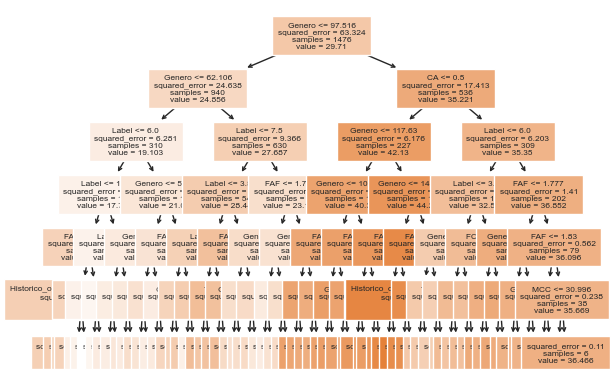

In [ ]:
# Plotamos a árvore de regressão
from sklearn import tree

tree.plot_tree(model, 
          feature_names = list(obesidade_cleaned.columns), 
          class_names = list(obesidade_cleaned['IMC']),  
          filled=True,                    
          fontsize=6);

In [ ]:
# O modelo:
from sklearn.tree import export_text
print(export_text(model,
                  show_weights=True))

|--- feature_0 <= 97.52
|   |--- feature_0 <= 62.11
|   |   |--- feature_16 <= 6.00
|   |   |   |--- feature_16 <= 1.50
|   |   |   |   |--- feature_12 <= 1.49
|   |   |   |   |   |--- feature_4 <= 1.23
|   |   |   |   |   |   |--- value: [27.30]
|   |   |   |   |   |--- feature_4 >  1.23
|   |   |   |   |   |   |--- value: [27.96]
|   |   |   |   |--- feature_12 >  1.49
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- value: [25.80]
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- value: [26.49]
|   |   |   |--- feature_16 >  1.50
|   |   |   |   |--- feature_16 <= 2.50
|   |   |   |   |   |--- feature_12 <= 1.53
|   |   |   |   |   |   |--- value: [18.07]
|   |   |   |   |   |--- feature_12 >  1.53
|   |   |   |   |   |   |--- value: [17.60]
|   |   |   |   |--- feature_16 >  2.50
|   |   |   |   |   |--- feature_11 <= 16.76
|   |   |   |   |   |   |--- value: [13.73]
|   |   |   |   |   |--- feature_11 >  16.76
|   |   |   |   |   |   |-

In [ ]:
# Após a apresentação da árvore de regressão, foi calculado o MAE no conjunto de treino e no conjunto de teste, bem como o RMSE.

MAE1_tree = metrics.mean_absolute_error(y_train, y_pred)
MAE2_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
MAE3_tree = np.mean(abs(y_test-y_pred_tree))

print("MAE on training set: {:.3f}".format(MAE1_tree))
print("MAE on test set: {:.3f}".format(MAE2_tree))
print("MAE on test set: {:.3f}".format(MAE3_tree))

RMSE_tree = np.sqrt(np.mean((y_test-y_pred_tree)**2))
print("RMSE: {:.4f}".format(RMSE_tree))

MAE on training set: 0.464
MAE on test set: 0.575
MAE on test set: 0.575
RMSE: 0.7656


In [ ]:
# Como podemos ver, o modelo de árvore de regressão tem um MAE (tanto no teste como no treino) e um RMSE bastante baixos, o que indica que o modelo é bastante preciso para fazer previsões.

In [ ]:
# Semelhante ao que fizemos no modelo de regressão linear múltipla, calculamos os resíduos do modelo da árvore de regressão. 
# Estes resíduos vão ser úteis futuramente na pergunta 9

residuos_tree = y_test - y_pred_tree

### Alínea c) - Rede neuronal usando a função MLPRegressor, fazendo variar os parâmetros e arquitetura do modelo. Apresente a rede obtida.

In [ ]:
# Na rede neuronal, utilizamos novamente todos os atributos do dataset, mas tomamos uma abordagem diferente. 
# Foram criadas duas redes neuronais, uma onde era variado o número de neurónios de um hidden layer (de 4 a 30) 
# e outra onde era variado o número de neurónios de 2 Hidden Layers (de 4 a 10 em ambos os layers)
# Em cada uma das redes, era também variado a função de ativação (relu, tanh e identity)
# No final de cada teste, foram selecionadas as melhores redes neuronais para cada uma das funções de ativação

## Rede 1

In [ ]:
# Tal como pedido, foi utilizada a função MLPRegressor para a criação da rede neuronal

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fazemos a seleção das variáveis independentes (X) e dependentes (y)
X = obesidade_cleaned[features]
y = obesidade_cleaned['IMC']

# Criamos um array onde vamos armazenar as informações dos melhores modelos para cada função de ativação. Vai ser útil futuramente
model_info_rede_1 = []

# Escolhemos as funções de ativação a testar
activations = ['relu', 'tanh', 'identity']

# Criamos um dicionário para armazenar os melhores modelos para cada função de ativação
best_models_rede_1 = {'relu': {'hidden_layers': None, 'r2': -float('inf')},
               'tanh': {'hidden_layers': None, 'r2': -float('inf')},
               'identity': {'hidden_layers': None, 'r2': -float('inf')}}

# E criamos uma ciclo "for" para iterar sobre as funções de ativação e o número de neurónios nos Hidden Layers
for activation in activations:
    best_r2 = -float('inf')
    best_hidden_layers = None
    print(f"\nTesting activation function: {activation}:\n")
    for Nhidden in range(4, 31):
        nn = MLPRegressor(hidden_layer_sizes=(Nhidden,), activation=activation, solver='adam', 
                          max_iter=2000, learning_rate_init=0.001, random_state=42)
        nn.fit(X_train, y_train)
        y_pred = nn.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"  Hidden layers {Nhidden}: R-squared = {r2.round(4)}, MAE = {mae.round(4)}, RMSE = {rmse.round(4)}")
        
        # Atualizamos o melhor modelo para a função de ativação atual, se necessário
        if r2 > best_r2:
            best_r2 = r2
            best_hidden_layers = Nhidden
            best_mae = mae
            best_rmse = rmse
            best_y_pred = y_pred
    
    best_models_rede_1[activation]['hidden_layers'] = best_hidden_layers
    best_models_rede_1[activation]['r2'] = best_r2
    best_models_rede_1[activation]['mae'] = best_mae
    best_models_rede_1[activation]['rmse'] = best_rmse
    best_models_rede_1[activation]['y_pred'] = best_y_pred

# Imprimimos o melhor R-squared, MAE e RMSE para cada função de ativação
print("\nBest R-squared, MAE e RMSE for each activation function:")

# Criamos outro ciclo for para guardar e apresentar as informações dos melhores modelos para cada função de ativação
for activation, info in best_models_rede_1.items():
    hidden_layers = info['hidden_layers']
    r2 = info['r2']
    mae = info['mae']
    rmse = info['rmse']
    y_pred = info['y_pred']

    # Armazenamos as informações num "tuple"
    model_info = (activation, hidden_layers, r2, mae, rmse, y_pred)
    
    # Adicionamos o "tuple" à matriz
    model_info_rede_1.append(model_info)

    # E finalmente imprimimos os melhores modelos para cada uma das funções de ativação
    print(f"\nBest model for activation function: {activation}")
    print(f"  Hidden layers {hidden_layers}: R-squared = {r2.round(4)}, MAE = {mae.round(4)}, RMSE = {rmse.round(4)}")



Testing activation function: relu:

  Hidden layers 4: R-squared = 0.9419, MAE = 1.5455, RMSE = 1.953
  Hidden layers 5: R-squared = 0.9394, MAE = 1.5719, RMSE = 1.995


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Hidden layers 6: R-squared = 0.9571, MAE = 1.3068, RMSE = 1.6783
  Hidden layers 7: R-squared = 0.9451, MAE = 1.4742, RMSE = 1.8979
  Hidden layers 8: R-squared = 0.9481, MAE = 1.4283, RMSE = 1.8461
  Hidden layers 9: R-squared = 0.933, MAE = 1.6393, RMSE = 2.098
  Hidden layers 10: R-squared = 0.943, MAE = 1.5167, RMSE = 1.934
  Hidden layers 11: R-squared = 0.9517, MAE = 1.3719, RMSE = 1.7814
  Hidden layers 12: R-squared = 0.9406, MAE = 1.5428, RMSE = 1.9756
  Hidden layers 13: R-squared = 0.946, MAE = 1.453, RMSE = 1.8822
  Hidden layers 14: R-squared = 0.934, MAE = 1.6152, RMSE = 2.082
  Hidden layers 15: R-squared = 0.9472, MAE = 1.4348, RMSE = 1.8615
  Hidden layers 16: R-squared = 0.9539, MAE = 1.3435, RMSE = 1.739
  Hidden layers 17: R-squared = 0.9447, MAE = 1.4808, RMSE = 1.9053
  Hidden layers 18: R-squared = 0.9536, MAE = 1.3437, RMSE = 1.7462
  Hidden layers 19: R-squared = 0.9369, MAE = 1.5778, RMSE = 2.0355
  Hidden layers 20: R-squared = 0.94, MAE = 1.5358, RMSE = 1.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


  Hidden layers 28: R-squared = 0.9454, MAE = 1.4679, RMSE = 1.8933
  Hidden layers 29: R-squared = 0.9581, MAE = 1.2827, RMSE = 1.6586
  Hidden layers 30: R-squared = 0.949, MAE = 1.4201, RMSE = 1.8296

Testing activation function: tanh:

  Hidden layers 4: R-squared = 0.9812, MAE = 0.6696, RMSE = 1.11
  Hidden layers 5: R-squared = 0.9797, MAE = 0.8714, RMSE = 1.1554
  Hidden layers 6: R-squared = 0.9827, MAE = 0.8044, RMSE = 1.0658
  Hidden layers 7: R-squared = 0.9837, MAE = 0.7498, RMSE = 1.0333
  Hidden layers 8: R-squared = 0.9835, MAE = 0.7701, RMSE = 1.0414


In [ ]:
# Como podemos ver, no final da execução da função, foram apresentados os melhores modelos para cada uma das funções de ativação

In [ ]:
# Por fim, calculamos os resíduos para a melhor rede neural obtida

# Criamos um DataFrame com as informações dos modelos
df_models = pd.DataFrame(model_info_rede_1, columns=['Activation', 'Hidden Layers', 'R-squared', 'MAE', 'RMSE', 'Y_pred'])

# Imprimimos a tabela comparativa
print("\nComparação dos Modelos:\n")
print(df_models[['Activation', 'Hidden Layers', 'R-squared', 'MAE', 'RMSE']])

# Identificamos o melhor modelo de acordo com o R-squared, MAE e RMSE
best_r2_model = df_models.loc[df_models['R-squared'].idxmax()]
best_mae_model = df_models.loc[df_models['MAE'].idxmin()]
best_rmse_model = df_models.loc[df_models['RMSE'].idxmin()]

print("\n\nMelhor modelo baseado em R-squared:", best_r2_model['Activation'])

print("\nMelhor modelo baseado em MAE:", best_mae_model['Activation'])

print("\nMelhor modelo baseado em RMSE:", best_rmse_model['Activation'])

print("\nComo podemos ver, o melhor modelo é claramente o modelo com a função de ativação 'tanh'. Logo, vamos utilizar este modelo para calcular os resíduos.")

residuos_nn_model_1 = best_models_rede_1['tanh']['y_pred'] - y_test


Comparação dos Modelos:

  Activation  Hidden Layers  R-squared       MAE      RMSE
0       relu             22   0.970651  1.064600  1.388127
1       tanh             24   0.989275  0.620881  0.839128
2   identity             11   0.934406  1.613925  2.075203


Melhor modelo baseado em R-squared: tanh

Melhor modelo baseado em MAE: tanh

Melhor modelo baseado em RMSE: tanh

Como podemos ver, o melhor modelo é claramente o modelo com a função de ativação 'tanh'. Logo, vamos utilizar este modelo para calcular os resíduos.


## Rede 2

In [ ]:
# Na rede dois, o processo foi semelhante ao da rede um, mas com a diferença de que foram testadas várias combinações de neurónios em dois hidden layers (de 3 a 10, em cada layer).

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = obesidade_cleaned[features]
y = obesidade_cleaned['IMC']

model_info_rede_2 = []

best_models_rede_2 = {'relu': {'hidden_layers': None, 'r2': -float('inf')},
               'tanh': {'hidden_layers': None, 'r2': -float('inf')},
               'identity': {'hidden_layers': None, 'r2': -float('inf')}}

# Iterar sobre as funções de ativação e faixas de número de neurônios nas camadas ocultas
for activation in activations:
    best_r2 = -float('inf')
    best_hidden_layers = None
    print(f"\nTesting activation function: {activation}:\n")
    for x in range(3, 11):
        for y in range(3, 11):
            Nhidden = (x, y)
            nn = MLPRegressor(hidden_layer_sizes=Nhidden, activation=activation, solver='adam', 
                              max_iter=2000, learning_rate_init=0.001, random_state=42)
            nn.fit(X_train, y_train)
            y_pred = nn.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            print(f"  Hidden layers {Nhidden}: R-squared = {r2.round(4)}, MAE = {mae.round(4)}, RMSE = {rmse.round(4)}")
        
            # Atualizar o melhor modelo para a função de ativação atual, se necessário
            if r2 > best_r2:
                best_r2 = r2
                best_hidden_layers = Nhidden
                best_mae = mae
                best_rmse = rmse
                best_y_pred = y_pred
    
    best_models_rede_2[activation]['hidden_layers'] = best_hidden_layers
    best_models_rede_2[activation]['r2'] = best_r2
    best_models_rede_2[activation]['mae'] = best_mae
    best_models_rede_2[activation]['rmse'] = best_rmse
    best_models_rede_2[activation]['y_pred'] = best_y_pred

# Imprimimos o melhor R-squared, MAE e RMSE para cada função de ativação
print("\nBest R-squared for each activation function:")

# Criamos outro ciclo for para guardar e apresentar as informações dos melhores modelos para cada função de ativação
for activation, info in best_models_rede_2.items():
    hidden_layers = info['hidden_layers']
    r2 = info['r2']
    mae = info['mae']
    rmse = info['rmse']
    y_pred = info['y_pred']

    # Armazenar as informações num "tuple"
    model_info = (activation, hidden_layers, r2, mae, rmse, y_pred)
    
    # Adicionamos o "tuple" à matriz
    model_info_rede_2.append(model_info)

    print(f"\nBest model for activation function: {activation}")
    print(f"  Hidden layers {hidden_layers}: R-squared = {r2.round(4)}, MAE = {mae.round(4)}, RMSE = {rmse.round(4)}")



Testing activation function: relu:



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (3, 3): R-squared = -2.6311, MAE = 13.1715, RMSE = 15.4401
  Hidden layers (3, 4): R-squared = 0.9353, MAE = 1.6211, RMSE = 2.0613
  Hidden layers (3, 5): R-squared = 0.9333, MAE = 1.6323, RMSE = 2.0932
  Hidden layers (3, 6): R-squared = 0.9486, MAE = 1.4139, RMSE = 1.8375
  Hidden layers (3, 7): R-squared = 0.9521, MAE = 1.3896, RMSE = 1.7741
  Hidden layers (3, 8): R-squared = 0.9346, MAE = 1.6244, RMSE = 2.0719
  Hidden layers (3, 9): R-squared = 0.9344, MAE = 1.6268, RMSE = 2.0753
  Hidden layers (3, 10): R-squared = 0.9359, MAE = 1.6106, RMSE = 2.052
  Hidden layers (4, 3): R-squared = 0.9484, MAE = 1.4284, RMSE = 1.8414
  Hidden layers (4, 4): R-squared = 0.9485, MAE = 1.4234, RMSE = 1.8391
  Hidden layers (4, 5): R-squared = 0.9327, MAE = 1.6434, RMSE = 2.1018
  Hidden layers (4, 6): R-squared = 0.9377, MAE = 1.5628, RMSE = 2.0224
  Hidden layers (4, 7): R-squared = 0.9481, MAE = 1.4397, RMSE = 1.8457
  Hidden layers (4, 8): R-squared = 0.9348, MAE = 1.6233, RMS

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (5, 3): R-squared = -3.4963, MAE = 15.1571, RMSE = 17.1814
  Hidden layers (5, 4): R-squared = 0.9509, MAE = 1.3813, RMSE = 1.7947
  Hidden layers (5, 5): R-squared = 0.9523, MAE = 1.3717, RMSE = 1.7696
  Hidden layers (5, 6): R-squared = 0.9448, MAE = 1.4808, RMSE = 1.9043
  Hidden layers (5, 7): R-squared = 0.9346, MAE = 1.6302, RMSE = 2.0726
  Hidden layers (5, 8): R-squared = 0.9404, MAE = 1.5382, RMSE = 1.9778
  Hidden layers (5, 9): R-squared = 0.9405, MAE = 1.536, RMSE = 1.9762
  Hidden layers (5, 10): R-squared = 0.9423, MAE = 1.499, RMSE = 1.9456
  Hidden layers (6, 3): R-squared = 0.9351, MAE = 1.6033, RMSE = 2.0644
  Hidden layers (6, 4): R-squared = 0.9572, MAE = 1.2968, RMSE = 1.6767
  Hidden layers (6, 5): R-squared = 0.9573, MAE = 1.291, RMSE = 1.6739
  Hidden layers (6, 6): R-squared = 0.9534, MAE = 1.3235, RMSE = 1.7484
  Hidden layers (6, 7): R-squared = 0.9484, MAE = 1.4252, RMSE = 1.8413
  Hidden layers (6, 8): R-squared = 0.9314, MAE = 1.6656, RMSE 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (4, 3): R-squared = 0.9839, MAE = 0.6179, RMSE = 1.0276
  Hidden layers (4, 4): R-squared = 0.9823, MAE = 0.7062, RMSE = 1.0774
  Hidden layers (4, 5): R-squared = 0.9398, MAE = 0.677, RMSE = 1.9886
  Hidden layers (4, 6): R-squared = 0.9444, MAE = 0.5782, RMSE = 1.9101
  Hidden layers (4, 7): R-squared = 0.9411, MAE = 0.6399, RMSE = 1.9667
  Hidden layers (4, 8): R-squared = 0.9856, MAE = 0.6995, RMSE = 0.9735
  Hidden layers (4, 9): R-squared = 0.9327, MAE = 0.9263, RMSE = 2.1018
  Hidden layers (4, 10): R-squared = 0.9912, MAE = 0.429, RMSE = 0.7604


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (5, 3): R-squared = 0.982, MAE = 0.7277, RMSE = 1.0882
  Hidden layers (5, 4): R-squared = 0.9883, MAE = 0.5912, RMSE = 0.8763
  Hidden layers (5, 5): R-squared = 0.9712, MAE = 0.9248, RMSE = 1.3741
  Hidden layers (5, 6): R-squared = 0.986, MAE = 0.6791, RMSE = 0.9579
  Hidden layers (5, 7): R-squared = 0.9554, MAE = 1.1612, RMSE = 1.7112
  Hidden layers (5, 8): R-squared = 0.9908, MAE = 0.5514, RMSE = 0.7766
  Hidden layers (5, 9): R-squared = 0.9785, MAE = 0.8386, RMSE = 1.1878
  Hidden layers (5, 10): R-squared = 0.985, MAE = 0.7134, RMSE = 0.9918
  Hidden layers (6, 3): R-squared = 0.9579, MAE = 0.6849, RMSE = 1.6623
  Hidden layers (6, 4): R-squared = 0.9876, MAE = 0.5239, RMSE = 0.9011
  Hidden layers (6, 5): R-squared = 0.9795, MAE = 0.719, RMSE = 1.1607
  Hidden layers (6, 6): R-squared = 0.9845, MAE = 0.612, RMSE = 1.0083
  Hidden layers (6, 7): R-squared = 0.9864, MAE = 0.6307, RMSE = 0.9443
  Hidden layers (6, 8): R-squared = 0.9724, MAE = 0.7313, RMSE = 1.3

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (7, 3): R-squared = 0.99, MAE = 0.4783, RMSE = 0.81
  Hidden layers (7, 4): R-squared = 0.9888, MAE = 0.4923, RMSE = 0.8583
  Hidden layers (7, 5): R-squared = 0.9877, MAE = 0.5829, RMSE = 0.8977
  Hidden layers (7, 6): R-squared = 0.9881, MAE = 0.5908, RMSE = 0.8843
  Hidden layers (7, 7): R-squared = 0.9918, MAE = 0.4764, RMSE = 0.7349
  Hidden layers (7, 8): R-squared = 0.9916, MAE = 0.4654, RMSE = 0.7438
  Hidden layers (7, 9): R-squared = 0.9898, MAE = 0.5441, RMSE = 0.8194
  Hidden layers (7, 10): R-squared = 0.9747, MAE = 0.6102, RMSE = 1.2898


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (8, 3): R-squared = 0.9907, MAE = 0.4173, RMSE = 0.7795
  Hidden layers (8, 4): R-squared = 0.9929, MAE = 0.4084, RMSE = 0.6826
  Hidden layers (8, 5): R-squared = 0.9889, MAE = 0.5439, RMSE = 0.8534
  Hidden layers (8, 6): R-squared = 0.9875, MAE = 0.662, RMSE = 0.9043
  Hidden layers (8, 7): R-squared = 0.988, MAE = 0.5962, RMSE = 0.8891
  Hidden layers (8, 8): R-squared = 0.9868, MAE = 0.6241, RMSE = 0.9308
  Hidden layers (8, 9): R-squared = 0.9849, MAE = 0.5518, RMSE = 0.9951
  Hidden layers (8, 10): R-squared = 0.9874, MAE = 0.589, RMSE = 0.9081


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (9, 3): R-squared = 0.979, MAE = 0.4028, RMSE = 1.1752
  Hidden layers (9, 4): R-squared = 0.9843, MAE = 0.4873, RMSE = 1.0168
  Hidden layers (9, 5): R-squared = 0.9896, MAE = 0.4982, RMSE = 0.8256
  Hidden layers (9, 6): R-squared = 0.9874, MAE = 0.5535, RMSE = 0.9096
  Hidden layers (9, 7): R-squared = 0.9885, MAE = 0.5313, RMSE = 0.8691
  Hidden layers (9, 8): R-squared = 0.9881, MAE = 0.5512, RMSE = 0.8841
  Hidden layers (9, 9): R-squared = 0.9836, MAE = 0.6273, RMSE = 1.0388
  Hidden layers (9, 10): R-squared = 0.9843, MAE = 0.6277, RMSE = 1.0156


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



  Hidden layers (10, 3): R-squared = 0.9854, MAE = 0.59, RMSE = 0.9806
  Hidden layers (10, 4): R-squared = 0.9759, MAE = 0.6326, RMSE = 1.2571
  Hidden layers (10, 5): R-squared = 0.9864, MAE = 0.6291, RMSE = 0.9462
  Hidden layers (10, 6): R-squared = 0.9859, MAE = 0.5999, RMSE = 0.9614
  Hidden layers (10, 7): R-squared = 0.9862, MAE = 0.6318, RMSE = 0.9518
  Hidden layers (10, 8): R-squared = 0.9805, MAE = 0.6032, RMSE = 1.1309
  Hidden layers (10, 9): R-squared = 0.9813, MAE = 0.7177, RMSE = 1.1093
  Hidden layers (10, 10): R-squared = 0.9564, MAE = 0.7322, RMSE = 1.6924

Testing activation function: identity:

  Hidden layers (3, 3): R-squared = 0.9353, MAE = 1.612, RMSE = 2.0613
  Hidden layers (3, 4): R-squared = 0.9327, MAE = 1.6621, RMSE = 2.102
  Hidden layers (3, 5): R-squared = 0.9326, MAE = 1.6367, RMSE = 2.1033
  Hidden layers (3, 6): R-squared = 0.9346, MAE = 1.6333, RMSE = 2.0719
  Hidden layers (3, 7): R-squared = 0.9339, MAE = 1.637, RMSE = 2.0828
  Hidden layers (3,

In [ ]:
# Como podemos ver, no final da execução da função, foram apresentados os melhores modelos para cada uma das funções de ativação. Esta rede foi mais complexa do que a rede 1, 
# demorando quase o triplo do tempo a ser executada.

In [ ]:
# Por fim, calculamos os resíduos para a melhor rede neuronal obtida

# Criamos um DataFrame com as informações dos modelos
df_models = pd.DataFrame(model_info_rede_2, columns=['Activation', 'Hidden Layers', 'R-squared', 'MAE', 'RMSE', 'Y_pred'])

# Imprimimos a tabela comparativa
print("\nComparação dos Modelos:\n")
print(df_models[['Activation', 'Hidden Layers', 'R-squared', 'MAE', 'RMSE']])

# Identificamos o melhor modelo de acordo com o R-squared, MAE e RMSE
best_r2_model = df_models.loc[df_models['R-squared'].idxmax()]
best_mae_model = df_models.loc[df_models['MAE'].idxmin()]
best_rmse_model = df_models.loc[df_models['RMSE'].idxmin()]

print("\n\nMelhor modelo baseado em R-squared:", best_r2_model['Activation'])

print("\nMelhor modelo baseado em MAE:", best_mae_model['Activation'])

print("\nMelhor modelo baseado em RMSE:", best_rmse_model['Activation'])

print("\nComo podemos ver, o melhor modelo é claramente o modelo com a função de ativação 'tanh'. Logo, vamos utilizar este modelo para calcular os resíduos.")

residuos_nn_model_2 = best_models_rede_2['tanh']['y_pred'] - y_test


Comparação dos Modelos:

  Activation Hidden Layers  R-squared       MAE      RMSE
0       relu        (6, 5)   0.957321  1.290956  1.673935
1       tanh        (8, 4)   0.992902  0.408376  0.682645
2   identity        (5, 4)   0.936546  1.603338  2.041074


Melhor modelo baseado em R-squared: tanh

Melhor modelo baseado em MAE: tanh

Melhor modelo baseado em RMSE: tanh

Como podemos ver, o melhor modelo é claramente o modelo com a função de ativação 'tanh'. Logo, vamos utilizar este modelo para calcular os resíduos.


### Pergunta 8 - Compare os resultados obtidos pelos modelos referidos na questão 7, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE).

In [ ]:
# Para fazermos a comparação dos resultados obtidos nos diferentes modelos, apenas foram extraidos os valores de R-squared (quando possível), MAE e RMSE para cada um dos modelos.
# Após a extração, foram comparados os valores obtidos para cada um dos modelos.

### Regressão Linear Múltipla

In [ ]:
print('R squared:',r2_score_mlr.round(4))
print('Mean Absolute Error:', meanAbErrRLM.round(4))
print('Mean Square Error:', meanSqErrRLM.round(4))
print('Root Mean Square Error:', rootMeanSqErrRLM.round(4))

R squared: 87.7441
Mean Absolute Error: 2.2887
Mean Square Error: 7.9187
Root Mean Square Error: 2.814


### Árvore de Regressão

In [ ]:
print("MAE on training set: {:.3f}".format(MAE1_tree))
print("MAE on test set: {:.3f}".format(MAE2_tree))
print("MAE on test set: {:.3f}".format(MAE3_tree))

RMSE_tree = np.sqrt(np.mean((y_test-y_pred_tree)**2))
print("RMSE: {:.4f}".format(RMSE_tree))

MAE on training set: 0.464
MAE on test set: 0.575
MAE on test set: 0.575
RMSE: 0.7656


### Redes Neuronais - Rede 1

In [ ]:
for model_info in model_info_rede_1:
    activation, hidden_layers, r2, mae, rmse, y_pred = model_info
    print(f"\nBest model for activation function: {activation}")
    print(f"  Hidden layers {hidden_layers}: R-squared = {r2.round(4)}, MAE = {mae.round(4)}, RMSE = {rmse.round(4)}")


Best model for activation function: relu
  Hidden layers 22: R-squared = 0.9707, MAE = 1.0646, RMSE = 1.3881

Best model for activation function: tanh
  Hidden layers 24: R-squared = 0.9893, MAE = 0.6209, RMSE = 0.8391

Best model for activation function: identity
  Hidden layers 11: R-squared = 0.9344, MAE = 1.6139, RMSE = 2.0752


### Redes Neuronais - Rede 2

In [ ]:
for model_info in model_info_rede_2:
    activation, hidden_layers, r2, mae, rmse, y_pred = model_info
    print(f"\nBest model for activation function: {activation}")
    print(f"  Hidden layers {hidden_layers}: R-squared = {r2.round(4)}, MAE = {mae.round(4)}, RMSE = {rmse.round(4)}")


Best model for activation function: relu
  Hidden layers (6, 5): R-squared = 0.9573, MAE = 1.291, RMSE = 1.6739

Best model for activation function: tanh
  Hidden layers (8, 4): R-squared = 0.9929, MAE = 0.4084, RMSE = 0.6826

Best model for activation function: identity
  Hidden layers (5, 4): R-squared = 0.9365, MAE = 1.6033, RMSE = 2.0411


### Conclusões

In [ ]:
print("Através da análise do erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE) dos modelos de regressão linear, árvore de decisão e redes neurais, podemos concluir que \no melhor modelo é o modelo com a função de ativação tanh com" ,model_info_rede_2[1][1], "Hidden Layers da rede 2 do modelo de redes neuronais, visto que tem o MAE e RMSE mais baixos. Foi ainda apresentado o R Squared \npara esse mesmo modelo, e podemos ver que é igual a",model_info_rede_2[1][2].round(4),", indicando que o modelo é bastante preciso.")

Através da análise do erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE) dos modelos de regressão linear, árvore de decisão e redes neurais, podemos concluir que 
o melhor modelo é o modelo com a função de ativação tanh com (8, 4) Hidden Layers da rede 2 do modelo de redes neuronais, visto que tem o MAE e RMSE mais baixos. Foi ainda apresentado o R Squared 
para esse mesmo modelo, e podemos ver que é igual a 0.9929 , indicando que o modelo é bastante preciso.


### Pergunta 9 - Justifique se os resultados obtidos para os dois melhores modelos são estatisticamente significativos (para um nível de significância de 5%). Identifique o modelo que apresenta o melhor desempenho

In [ ]:
# Com base nos valores de MAE e RMSE fornecidos acima, podemos concluir que o modelo com a função de ativação tanh com (8, 4) Hidden Layers da rede 2 do modelo de redes neuronais 
# e o modelo de Árvore de Regressão são os melhores modelos para prever o IMC de cada pessoa. Com isto, vamos agora verificar se os resultados obtidos entre ambos são estatisticamente 
# significativos. Para isso, vamos utilizar o teste t, mais especificamente o ttest_rel(), um teste t para duas amostras emparelhadas. Podemos assumir que são duas
# amostras emparelhadas porque estamos a utilizar o mesmo conjunto de dados para ambos os modelos.

from scipy import stats

# Teste t para comparar os resultados entre o modelo da rede 2 do modelo de rede neuronal e o modelo da árvore de regressão (os dois melhores modelos)
t_stat_tree_nn, p_value_tree_nn = stats.ttest_rel(residuos_nn_model_2, residuos_tree)

# Nível de significância
alpha = 0.05


if p_value_tree_nn < alpha:
    print("Conclusão: O p_value é cerca de",p_value_tree_nn.round(4),", logo, os resultados entre a rede 2 do modelo de rede neuronal e o modelo da árvore de regressão são estatisticamente significativos.")
else:
    print("Conclusão: O p_value é cerca de",p_value_tree_nn.round(4),", logo, os resultados entre a rede 2 do modelo de rede neuronal e o modelo da árvore de regressão não são estatisticamente significativos.")


Conclusão: O p_value é cerca de 0.2852 , logo, os resultados entre a rede 2 do modelo de rede neuronal e o modelo da árvore de regressão não são estatisticamente significativos.


## 4.2. Classificação

### Pergunta 1 - Utilizando o dataset fornecido, obtenha modelos de classificação para prever o risco de obesidade de cada indivíduo. Os modelos desenvolvidos devem ser avaliados utilizando o método de k-fold cross validation. Devem apresentar como resultados a média e desvio padrão da métrica que considerem mais adequada ao problema em análise. Os métodos a utilizar são os seguintes:

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.metrics import specificity_score
# Função para calcular Sensitivity, Specificity, Accuracy e F1. Basta apenas passar os valores reais e previstos!

def calculate_metrics(y_true, y_pred):

    # Calcular  métricas
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    sensitivity = recall_score(y_true, y_pred, average='weighted')
    specificity=specificity_score(y_true, y_pred, average='weighted')
    print(f"Model Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"F1 Score: {f1}")

- Árvores de Decisão: Utilizando a função DecisionTreeClassifier desenvolva um
modelo de classificação que responda ao problema proposto. Deve fazer o ajuste
dos parâmetros do modelo, de forma a garantir que não está a ocorrer
overfitting nos dados de treino;

In [ ]:
# Variavel alvo
y = obesidade_cleaned.loc[:, "Label"].values
# Variavel preditora - Todos os atributos do dataset menos a variavel alvo ("Label")
X = obesidade_cleaned.drop(["Label"], axis=1).values

In [ ]:
# Vamos codificar a variável alvo com o codificador de rótulo.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# ajustar e transformar a variável alvo
y = le.fit_transform(y)

In [ ]:
# Método Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
X_train.shape, X_test.shape

((1476, 17), (633, 17))

In [ ]:
# Criar o modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# construir o modelo com os dados de treino
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.9652448657187994

In [ ]:
# Vamos fazer a previsão usando os dados de treino e de teste
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [ ]:
# Resultados

from sklearn.metrics import accuracy_score

tree_train = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", tree_train)

tree_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", tree_test)


Train Accuracy: 1.0
Test Accuracy: 0.9652448657187994


In [ ]:
# Vamos ver também a matriz de confusão para os erros de treino
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_true = y_train, y_pred=clf.predict(X_train), labels=[True, False])
print(cmatrix)

error_rate = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Training Error Rate:", error_rate)

[[159   0]
 [  0 235]]
Training Error Rate: 0.0


In [ ]:
# Vamos ver também a matriz de confusão para os erros de teste
ypred = clf.predict(X_test)
cmatrix = confusion_matrix(y_true=y_test, y_pred=ypred, labels=[True, False])
print(cmatrix)
error_rate_test = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Test Error Rate:", error_rate_test)

[[79  0]
 [ 0 90]]
Test Error Rate: 0.0


Para calcular a matriz de confusão para um problema de classificação 2-classes:

- True positives (TP): O número de casos corretamente classificados para a classe positiva.

- True negatives (TN): O número de casos corretamente classificados para a classe negativa.

- False positives (FP): O número de casos incorretamente classificados para a classe positiva.

- False negatives (FN): O número de casos incorretamente classificados para a classe negativa.

#### Metrics for Performance Evaluation (Medidas de desempenho)

- Accuracy: Rate of correct examples (out of total examples)

- Error rate: Rate of wrong examples (out of total examples)

- Precision: rate of positive examples classified correctly, among all predicted as positive

- Recall (sensitivity): success rate in the positive class (of the total positives, how many were detected)

- F1:. Harmonic average of precision and recall with the aim of giving a unique measure that equally values the mistakes made in either direction (FP or FN)

  - F1 =  2 x Precision x Recall/(Precision + Recall)


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       1.00      1.00      1.00        79
           2       1.00      0.98      0.99        62
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00         3
           5       0.98      1.00      0.99       121
           6       0.91      0.86      0.89        74
           7       0.90      0.92      0.91        96
           8       0.97      1.00      0.98        90

    accuracy                           0.97       633
   macro avg       0.97      0.97      0.97       633
weighted avg       0.97      0.97      0.97       633



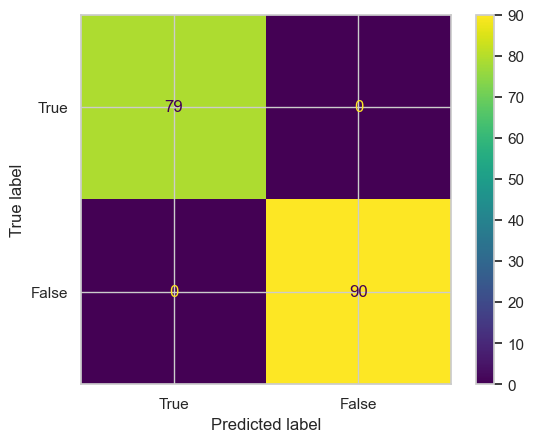

In [ ]:
# Matriz de confusão e métricas
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def matriz_confusao(actual, predicted):
    matrix = confusion_matrix(y_true = actual, y_pred = predicted, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[True, False])
    disp.plot()
    matrix = classification_report(actual,predicted)
    print('Classification report : \n',matrix)

res = matriz_confusao(y_test,ypred)

### Alínea b)  - Compare os resultados dos modelos anteriores. Discuta em detalhe qual o modelo que apresentou melhor e pior desempenho de acordo com as seguintes métricas: Accuracy; Sensitivity; Specificity e F1.

In [ ]:
calculate_metrics(y_test, ypred)

# Para ttest
Y_PRED_DT = ypred

Model Metrics:
Accuracy: 0.9652448657187994
Sensitivity: 0.9652448657187994
Specificity: 0.9943504729022471
F1 Score: 0.9650723886190385


#### k-fold cross validation

In [ ]:
# K-Fold Cross Validation - Implementação 
#
# Dividir o dataset em K folds

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size : (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Definir o número de folds
k = 10
fold_indices = kfold_indices(X, k)

In [ ]:
# Performing K-Fold Cross-Validation
#from sklearn.metrics import accuracy_score

# Initialize your machine learning model 

model = DecisionTreeClassifier()

scores = []
prevs_folds=[]
y_folds=[]
# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)
    
    # Append the fold score to the list of scores
    scores.append(fold_score)


    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores: [0.9952380952380953, 1.0, 0.9952380952380953, 1.0, 0.9904761904761905, 1.0, 1.0, 0.9952380952380953, 0.9142857142857143, 0.8142857142857143]
Mean Accuracy: 0.9704761904761906
Standart Deviation: 0.05768787703202975


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       238
           2       1.00      1.00      1.00       208
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00       369
           6       0.88      0.90      0.89       261
           7       0.92      0.91      0.91       337
           8       1.00      1.00      1.00       305

    accuracy                           0.97      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.97      0.97      0.97      2100



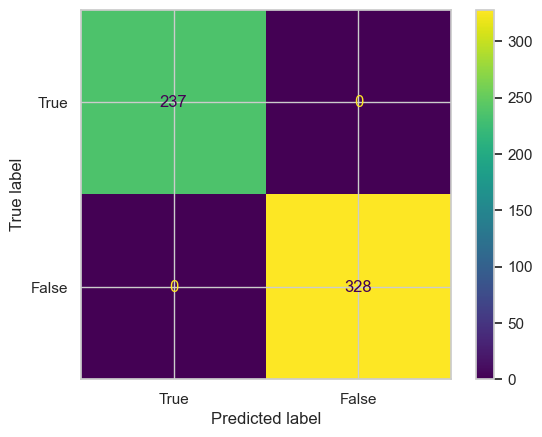

In [ ]:
resultados = matriz_confusao(np.concatenate(y_folds), np.concatenate(prevs_folds))

### Hyperparameter tuning / Overfitting 

Vimos o overfitting apesar de não ser necessário, pois os resultados obtidos em K-Fold Cross-Validation são bastante bons!

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
import numpy as np
max_depths = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
train_score = []
test_score = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

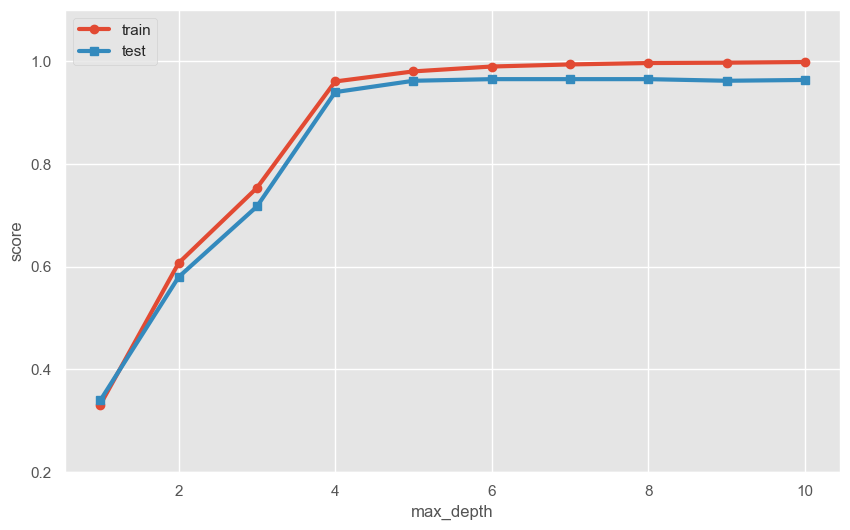

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.2, 1.1)
plt.legend();

In [ ]:
# What about the minimum numbers of samples required to make a node a leaf node? (another Hyperparameter)
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    clf = DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

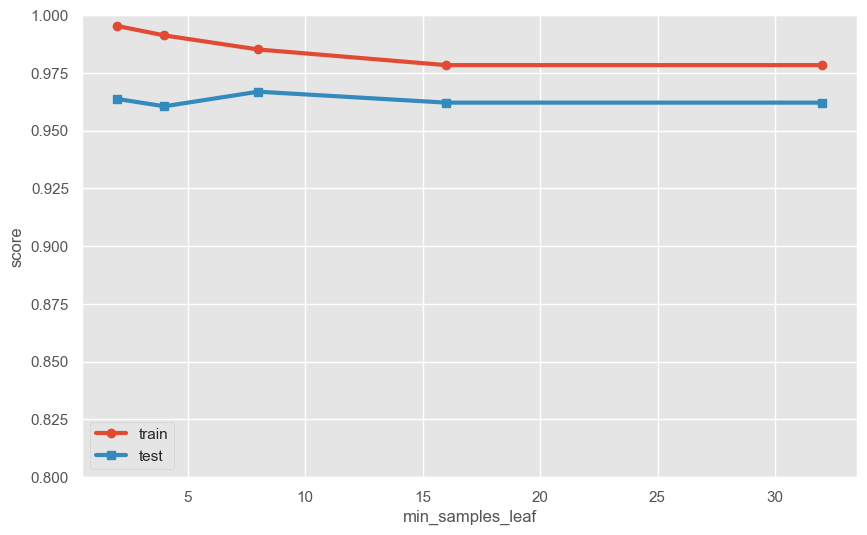

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.8, 1)
plt.legend()

Pegamos nos melhores parametros usando  GridSearchCV:

In [ ]:

# Como usar os melhores parametros usando  GridSearchCV:
# https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv
# Mais informação sobre GridSearchCV:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# Lembrando que este codigo veio dos sites acima, e foi adaptado para o nosso problema!

from sklearn.model_selection import GridSearchCV


# Definir a grade de parâmetros
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# Configurar o GridSearchCV
DTC = DecisionTreeClassifier(random_state=42)
# Utilizar a validação cruzada com 10 folds
grid_search = GridSearchCV(estimator=DTC, param_grid=param_grid, cv=10, scoring='accuracy')

# Ajustar o GridSearchCV com os dados de treino
grid_search.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n Best estimator:\n",grid_search.best_estimator_)
print("\n Best cross-validation accuracy: ",grid_search.best_score_)
print("\n Best parameters found: ",grid_search.best_params_)
# Avaliar o desempenho no dataset de teste
best_clf = grid_search.best_estimator_
test_score = best_clf.score(X_test, y_test)
print("\n Test set accuracy: {:.2f}".format(test_score))






c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


 Results from Grid Search 

 Best estimator:
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=32,
                       random_state=42)

 Best cross-validation accuracy:  0.978318624747196

 Best parameters found:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 32}

 Test set accuracy: 0.96


- SVM: Utilizando a função SVC desenvolva um modelo de classificação que
responda ao problema proposto. Deve testar todos os Kernels possíveis, e fazer
ajuste de parâmetros, de forma a garantir que não está a ocorrer overfitting nos
dados de treino. No final, deve identificar o modelo com o melhor desempenho,
justificando;

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned.drop(["Label"], axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
n_sample = len(X)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [ ]:
from sklearn import svm
import seaborn as sns
# testando diferentes kernels
for kernel in ['linear', 'poly', 'rbf' ]:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    calculate_metrics(y_test, y_pred)
    

Model Metrics:
Accuracy: 0.9462875197472354
Sensitivity: 0.9462875197472354
Specificity: 0.9915108457759901
F1 Score: 0.9463778629231129
Model Metrics:
Accuracy: 0.7251184834123223
Sensitivity: 0.7251184834123223
Specificity: 0.9576994486377581
F1 Score: 0.7136820291457628
Model Metrics:
Accuracy: 0.674565560821485
Sensitivity: 0.674565560821485
Specificity: 0.9453010576082584
F1 Score: 0.6450214331109224


In [ ]:
# Tentar encontrar o melhor valor de C para o kernel linear
import sklearn.model_selection as skm
kfold = skm.KFold(n_splits=10, random_state=123, shuffle=True)
grid = skm.GridSearchCV(svm.SVC(kernel='linear', gamma=10),
                        {'C': [0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5}

In [ ]:
'''
# Tentar encontrar o melhor valor de C para o kernel poly
# Não para de treinar!

import sklearn.model_selection as skm

kfold = skm.KFold(n_splits=5, random_state=123, shuffle=True)
grid = skm.GridSearchCV(svm.SVC(kernel='poly', gamma=10),
                        {'C': [0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_
'''

"\n# Tentar encontrar o melhor valor de C para o kernel poly\n# Não para de treinar!\n\nimport sklearn.model_selection as skm\n\nkfold = skm.KFold(n_splits=5, random_state=123, shuffle=True)\ngrid = skm.GridSearchCV(svm.SVC(kernel='poly', gamma=10),\n                        {'C': [0.001,0.01,0.1,1,5,10,100]},\n                        refit=True,\n                        cv=kfold,\n                        scoring='accuracy')\ngrid.fit(X_train, y_train)\ngrid.best_params_\n"

In [ ]:
# Tentar encontrar o melhor valor de C para o kernel rbf
import sklearn.model_selection as skm
kfold = skm.KFold(n_splits=10, random_state=123, shuffle=True)
grid = skm.GridSearchCV(svm.SVC(kernel='rbf', gamma=10),
                        {'C': [0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5}

In [ ]:
from sklearn import svm
import seaborn as sns
# Testar com C = 5
for kernel in ['linear', 'poly', 'rbf' ]:
    clf = svm.SVC(kernel=kernel,C=5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc=accuracy_score(y_test, y_pred)

    calculate_metrics(y_test, y_pred)


Model Metrics:
Accuracy: 0.9478672985781991
Sensitivity: 0.9478672985781991
Specificity: 0.991872004308182
F1 Score: 0.9479508448971213
Model Metrics:
Accuracy: 0.8120063191153238
Sensitivity: 0.8120063191153238
Specificity: 0.9728278358362565
F1 Score: 0.803682750829005
Model Metrics:
Accuracy: 0.8135860979462876
Sensitivity: 0.8135860979462876
Specificity: 0.9734424801976413
F1 Score: 0.8040672758326395


Conluimos que o melhor é este:

In [ ]:
from sklearn import svm
import seaborn as sns

clf = svm.SVC(kernel='linear',C=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc=accuracy_score(y_test, y_pred)

# Para ttest
Y_PRED_SVM = y_pred

### Alínea b)  - Compare os resultados dos modelos anteriores. Discuta em detalhe qual o modelo que apresentou melhor e pior desempenho de acordo com as seguintes métricas: Accuracy; Sensitivity; Specificity e F1.

In [ ]:
calculate_metrics(y_test, y_pred)

Model Metrics:
Accuracy: 0.9447077409162717
Sensitivity: 0.9447077409162717
Specificity: 0.9914393491816574
F1 Score: 0.9447809359779391


#### k-fold cross validation.

In [ ]:
# K-Fold Cross Validation - Implementação
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores: [0.96682464 0.97630332 0.95734597 0.96682464 0.94312796 0.93838863
 0.97630332 0.98578199 0.95260664 0.95714286]
Mean Accuracy: 0.9620649966147596
Standart Deviation: 0.014381943336141447


- Rede Neuronal: Utilizando o package do Keras, deve desenvolver um modelo de
classificação que responda ao problema proposto. Deve fazer uma otimização da
arquitetura e dos parâmetros do modelo. No final deve apresentar a arquitetura
encontrada, e os parâmetros escolhidos, tentando justificar as escolhas
efetuadas durante o processo de otimização;

### MODEL 1 ( Arquitetura Simples)

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned.drop(["Label"], axis=1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# aplicar escala pradrão
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1476, 17), (633, 17))

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import backend

In [ ]:
# definir as camadas da rede neuronal
# keras.layers.Dense(9, activation='softmax'), porque temos 9 classes em Label (Peso_Normal, Excesso_Peso_Grau_I, Excesso_Peso_Grau_II, Obesidade_Moderada,Obesidade_Severa, Obesidade_Mórbida,Magreza_Grau_I,Magreza_Grau_II,Magreza_Grau_III )
# keras.layers.Flatten(input_shape=(17,)), porque temos 17 features (colunas do dataset X)
# keras.layers.Dense(2, activation='sigmoid'), não usamos esta camada porque temos mais de 2 classes em Label

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(17,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compilar o modelo
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,737 (6.79 KB)

 Trainable params: 1,737 (6.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1736 - loss: 2.1010 - val_accuracy: 0.3446 - val_loss: 1.7827
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4615 - loss: 1.6680 - val_accuracy: 0.4392 - val_loss: 1.5267
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5443 - loss: 1.4260 - val_accuracy: 0.4797 - val_loss: 1.3721
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 1.2706 - val_accuracy: 0.5372 - val_loss: 1.2661
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6155 - loss: 1.1597 - val_accuracy: 0.5709 - val_loss: 1.1862
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6395 - loss: 1.0740 - val_accuracy: 0.5777 - val_loss: 1.1222
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6589 - loss: 1.0037 - val_accuracy: 0.6250 - val_loss: 1.0696
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - loss: 0.9439 - val_accuracy: 0.

In [ ]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# Lista de épocas para treinar o modelo
epochs_list = list(range(100, 1100, 100)) + [1500, 2000]

# Inicializar listas para armazenar os resultados
results = {'epochs': epochs_list, 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}

for epochs in epochs_list:
    # Definir a arquitetura do modelo
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(9, activation='softmax')
    ])

    # Compilar a rede neural
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Ajustar o modelo
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)

    # Obter os valores finais de precisão e perda
    results['accuracy'].append(history.history['accuracy'][-1])
    results['loss'].append(history.history['loss'][-1])
    results['val_accuracy'].append(history.history['val_accuracy'][-1])
    results['val_loss'].append(history.history['val_loss'][-1])

# Converter os resultados em um DataFrame para facilitar a visualização
results_df = pd.DataFrame(results)

# Plotar os gráficos de precisão e perda
plt.figure(figsize=(14, 6))

# Gráfico de precisão
plt.subplot(1, 2, 1)
plt.plot(results_df['epochs'], results_df['accuracy'], label='Accuracy')
plt.plot(results_df['epochs'], results_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(results_df['epochs'], results_df['loss'], label='Loss')
plt.plot(results_df['epochs'], results_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

# Exibir a tabela de resultados
print(results_df)
'''


"\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom tensorflow import keras\nfrom sklearn.model_selection import train_test_split\n\n# Dividir os dados em treino e teste\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)\n# Lista de épocas para treinar o modelo\nepochs_list = list(range(100, 1100, 100)) + [1500, 2000]\n\n# Inicializar listas para armazenar os resultados\nresults = {'epochs': epochs_list, 'accuracy': [], 'loss': [], 'val_accuracy': [], 'val_loss': []}\n\nfor epochs in epochs_list:\n    # Definir a arquitetura do modelo\n    model = keras.models.Sequential([\n        keras.layers.Flatten(input_shape=(X_train.shape[1],)),\n        keras.layers.Dense(64, activation='relu'),\n        keras.layers.Dense(32, activation='relu'),\n        keras.layers.Dense(9, activation='softmax')\n    ])\n\n    # Compilar a rede neural\n    model.compile(optimizer='adam',\n                  loss='sparse_categorical_crossen

Resultado:

In [ ]:
import pandas as pd

# Alguns dos dados extraídos da tabela fornecida anterioemente
data = {
    'Epochs': [600, 700, 800, 900, 1000, 1500, 2000],
    'Precisão': [0.95, 0.96, 0.95, 0.96, 0.96, 0.97, 0.96],
    'Perda': [0.11, 0.08, 0.11, 0.10, 0.07, 0.06, 0.06],
    'Val_precisão': [0.90, 0.89, 0.88, 0.90, 0.91, 0.92, 0.91],
    'Val_perda': [0.29, 0.45, 0.31, 0.40, 0.37, 0.42, 0.42]
}
df = pd.DataFrame(data)
print(df)

   Epochs  Precisão  Perda  Val_precisão  Val_perda
0     600      0.95   0.11          0.90       0.29
1     700      0.96   0.08          0.89       0.45
2     800      0.95   0.11          0.88       0.31
3     900      0.96   0.10          0.90       0.40
4    1000      0.96   0.07          0.91       0.37
5    1500      0.97   0.06          0.92       0.42
6    2000      0.96   0.06          0.91       0.42


 Conclusão:
- Podemos concluir que treinar o modelo por mais de 1000 épocas não traz melhorias significativas na precisão. 
Portanto, podemos definir o número de épocas como 1000, já que esse valor oferece resultados praticamente iguais aos obtidos com 1500 e 2000 épocas, mas com um tempo de treinamento menor!

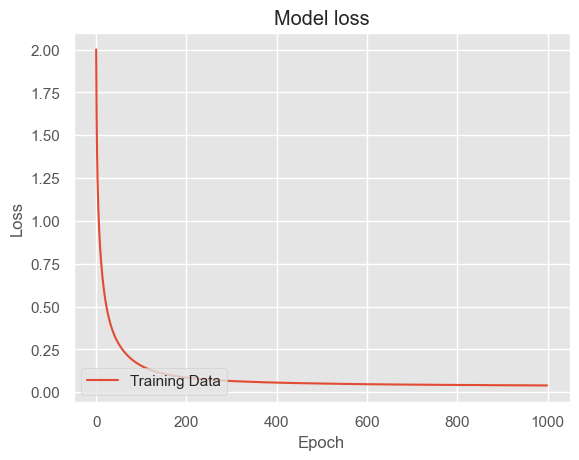

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower left')

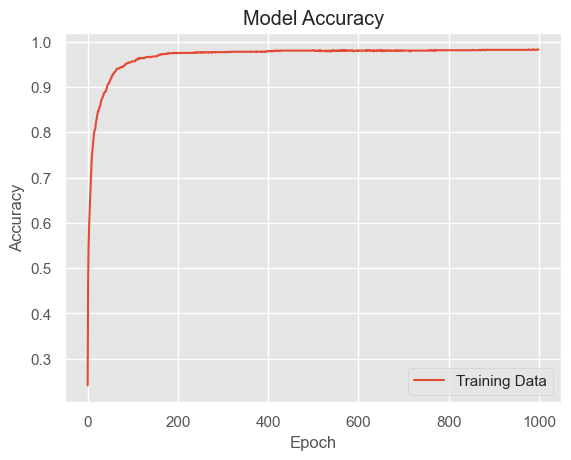

In [ ]:
plt.plot(history.history['accuracy'],)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')

### MODEL 2 (Arquitetura Intermediária)

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(17,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1886 - loss: 2.1627 - val_accuracy: 0.3176 - val_loss: 1.8773
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4348 - loss: 1.7504 - val_accuracy: 0.4493 - val_loss: 1.5933
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5493 - loss: 1.4559 - val_accuracy: 0.5034 - val_loss: 1.3684
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6237 - loss: 1.2209 - val_accuracy: 0.5608 - val_loss: 1.2034
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6757 - loss: 1.0457 - val_accuracy: 0.6385 - val_loss: 1.0806
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7221 - loss: 0.9133 - val_accuracy: 0.6824 - val_loss: 0.9818
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7523 - loss: 0.8101 - val_accuracy: 0.6926 - val_loss: 0.9031
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.7289 - val_accuracy: 0.7061 - val_lo

In [ ]:
print(model2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,589 (41.37 KB)

 Trainable params: 3,529 (13.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,060 (27.58 KB)

None


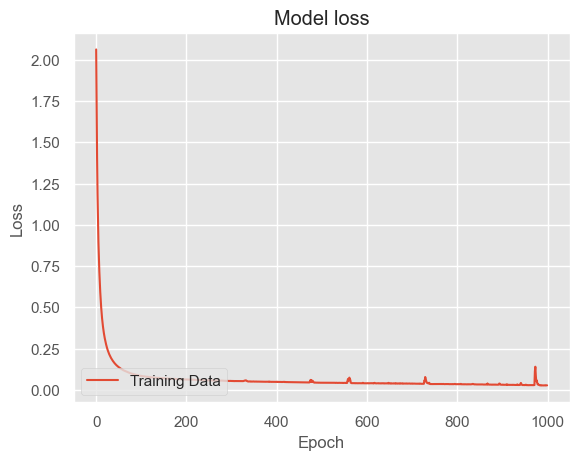

In [ ]:
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower left')

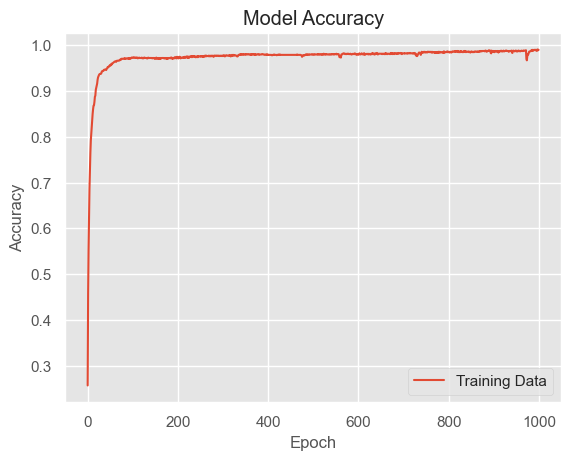

In [ ]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')

### MODEL 3 (Arquitetura Otimizada)

In [ ]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(17,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1942 - loss: 2.0426 - val_accuracy: 0.4054 - val_loss: 1.6723
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5219 - loss: 1.4640 - val_accuracy: 0.5777 - val_loss: 1.1862
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6677 - loss: 1.0112 - val_accuracy: 0.6554 - val_loss: 0.9502
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.7777 - val_accuracy: 0.7365 - val_loss: 0.8051
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8114 - loss: 0.6194 - val_accuracy: 0.7770 - val_loss: 0.6960
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.5036 - val_accuracy: 0.7872 - val_loss: 0.6262
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8693 - loss: 0.4203 - val_accuracy: 0.7973 - val_loss: 0.5790
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8998 - loss: 0.3602 - val_accuracy: 0.

In [ ]:
print(model3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,813 (151.62 KB)

 Trainable params: 12,937 (50.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,876 (101.08 KB)

None


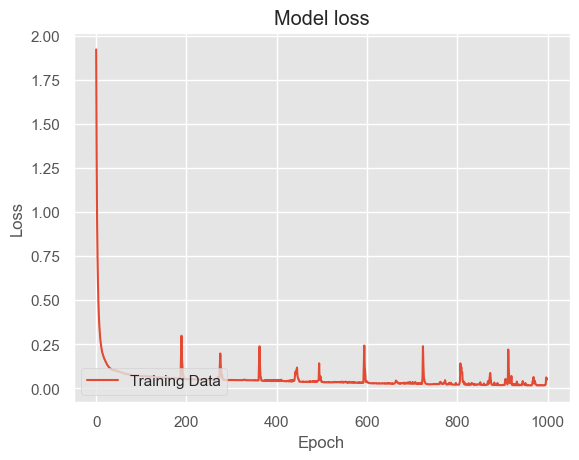

In [ ]:
plt.plot(history3.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower left')

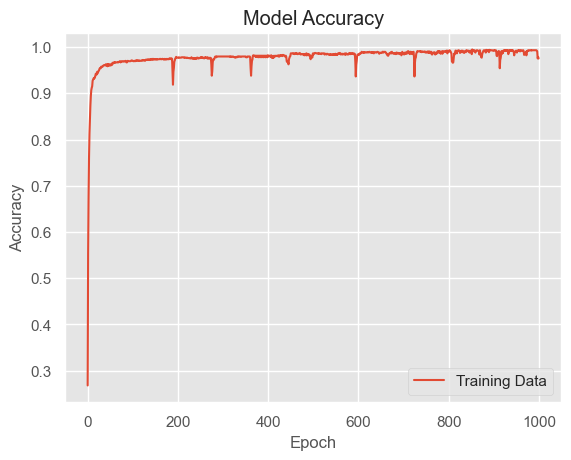

In [ ]:
plt.plot(history3.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')

### Comparação dos Resultados

In [ ]:
print("Comparação da loss dos 3 modelos")
print("Loss do modelo 1: ", np.min(history.history['loss']))
print("Loss do modelo 2: ", np.min(history2.history['loss']))
print("Loss do modelo 3: ", np.min(history3.history['loss']))

Comparação da loss dos 3 modelos
Loss do modelo 1:  0.039202697575092316
Loss do modelo 2:  0.02633296139538288
Loss do modelo 3:  0.017098192125558853


In [ ]:
print("Comparação da accuracy dos 3 modelos")
print("Accuracy do modelo 1: ", np.max(history.history['accuracy']))
print("Accuracy do modelo 2: ", np.max(history2.history['accuracy']))
print("Accuracy do modelo 3: ", np.max(history3.history['accuracy']))

Comparação da accuracy dos 3 modelos
Accuracy do modelo 1:  0.9830508232116699
Accuracy do modelo 2:  0.9906779527664185
Accuracy do modelo 3:  0.994915246963501


### Avaliar os modelos usando os dados de Teste

In [ ]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
loss2, accuracy2 = model2.evaluate(X_test, y_test)
loss3, accuracy3 = model3.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8694 - loss: 1.2744
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.8701 - loss: 1.3547
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8718 - loss: 1.1252 


In [ ]:
Y_pred = model.predict(X_test)
Y_pred2 = model2.predict(X_test)
Y_pred3 = model3.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_pred_labels2 = [np.argmax(i) for i in Y_pred2]
Y_pred_labels3 = [np.argmax(i) for i in Y_pred3]
print(Y_pred_labels)

[5, 6, 0, 0, 2, 0, 1, 6, 8, 5, 6, 8, 5, 1, 1, 3, 5, 5, 2, 8, 0, 2, 0, 8, 2, 0, 1, 6, 1, 0, 6, 8, 0, 6, 2, 0, 1, 5, 2, 2, 7, 0, 8, 7, 0, 5, 1, 8, 0, 1, 1, 6, 1, 8, 5, 5, 0, 8, 5, 6, 0, 8, 5, 2, 3, 8, 0, 2, 0, 6, 5, 2, 6, 5, 2, 2, 5, 5, 8, 5, 8, 7, 0, 2, 7, 1, 0, 0, 7, 0, 5, 7, 1, 5, 0, 1, 5, 5, 5, 5, 1, 1, 5, 6, 8, 5, 2, 5, 2, 0, 2, 1, 2, 0, 1, 5, 2, 7, 8, 7, 1, 7, 5, 2, 6, 1, 1, 8, 6, 5, 1, 6, 7, 7, 6, 7, 5, 2, 0, 6, 5, 5, 7, 5, 8, 8, 5, 2, 1, 8, 7, 0, 1, 7, 5, 0, 3, 5, 0, 6, 1, 5, 5, 6, 7, 6, 6, 8, 2, 2, 5, 7, 5, 1, 0, 2, 6, 7, 6, 6, 5, 1, 1, 1, 8, 5, 8, 5, 5, 5, 8, 5, 0, 0, 7, 2, 1, 6, 2, 5, 1, 7, 1, 0, 6, 5, 6, 8, 5, 5, 7, 6, 7, 7, 7, 4, 7, 7, 6, 5, 8, 8, 5, 3, 8, 7, 6, 2, 1, 2, 7, 0, 1, 5, 7, 8, 8, 5, 8, 2, 3, 2, 8, 5, 0, 5, 7, 0, 7, 6, 2, 1, 5, 0, 7, 6, 7, 8, 8, 6, 6, 5, 6, 0, 5, 0, 8, 2, 0, 5, 1, 1, 7, 2, 2, 2, 8, 0, 2, 3, 2, 5, 8, 5, 2, 6, 8, 2, 5, 2, 2, 8, 5, 1, 6, 7, 6, 5, 3, 6, 8, 5, 1, 7, 1, 0, 2, 7, 6, 1, 0, 8, 8, 0, 5, 1, 6, 2, 6, 8, 2, 6, 7, 5, 5, 7, 8, 5, 5, 5, 0, 7, 8, 

Matriz de confusão do modelo 1


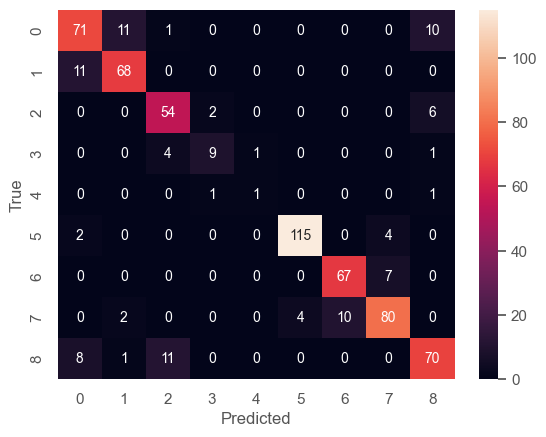

Métricas de avaliação do modelo 1
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        93
           1       0.83      0.86      0.84        79
           2       0.77      0.87      0.82        62
           3       0.75      0.60      0.67        15
           4       0.50      0.33      0.40         3
           5       0.97      0.95      0.96       121
           6       0.87      0.91      0.89        74
           7       0.88      0.83      0.86        96
           8       0.80      0.78      0.79        90

    accuracy                           0.85       633
   macro avg       0.79      0.77      0.78       633
weighted avg       0.85      0.85      0.84       633



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Matriz de confusão do modelo 1")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 1")
print(classification_report(y_test, Y_pred_labels))

Matriz de confusão do modelo 2


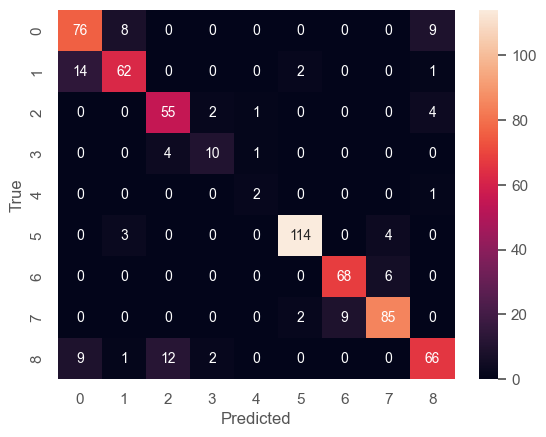

Métricas de avaliação do modelo 2
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        93
           1       0.84      0.78      0.81        79
           2       0.77      0.89      0.83        62
           3       0.71      0.67      0.69        15
           4       0.50      0.67      0.57         3
           5       0.97      0.94      0.95       121
           6       0.88      0.92      0.90        74
           7       0.89      0.89      0.89        96
           8       0.81      0.73      0.77        90

    accuracy                           0.85       633
   macro avg       0.79      0.81      0.80       633
weighted avg       0.85      0.85      0.85       633



In [ ]:
print("Matriz de confusão do modelo 2")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels2)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 2")
print(classification_report(y_test, Y_pred_labels2))

Matriz de confusão do modelo 3


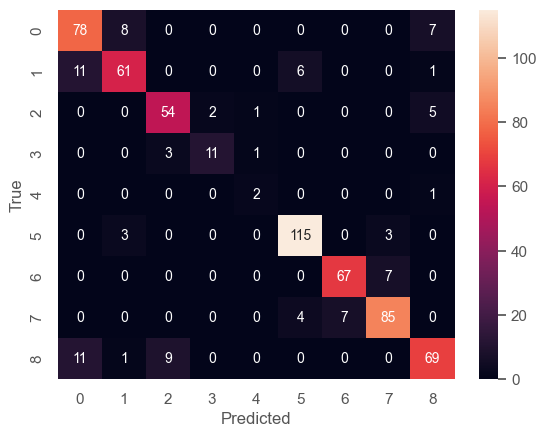

Métricas de avaliação do modelo 3
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        93
           1       0.84      0.77      0.80        79
           2       0.82      0.87      0.84        62
           3       0.85      0.73      0.79        15
           4       0.50      0.67      0.57         3
           5       0.92      0.95      0.93       121
           6       0.91      0.91      0.91        74
           7       0.89      0.89      0.89        96
           8       0.83      0.77      0.80        90

    accuracy                           0.86       633
   macro avg       0.81      0.82      0.82       633
weighted avg       0.86      0.86      0.86       633



In [ ]:
print("Matriz de confusão do modelo 3")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels3)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 3")
print(classification_report(y_test, Y_pred_labels3))

#### k-fold cross validation

Aplicamos k-fold cross validation com a melhor arquitetura, que no nosso caso foi a terceira

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import f1_score

# Definir o número de folds
num_folds = 10
kfold = StratifiedGroupKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Avaliar o modelo com validação cruzada
fold_no = 1
acc_per_fold = []
loss_per_fold = []
f1score_per_fold = []
scores_RN = []

for train, test in kfold.split(X_train,y_train):

    # Definir a arquitetura do modelo com maior precisão
    model4 = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(17,)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(9, activation='softmax')
    ])

    # Compilar a rede neuronal
    model4.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
    # Ajustar o modelo
    history4 = model4.fit(X_train, y_train,validation_split=0.2, epochs=1000, verbose=0)

    # Gerar métricas de avaliação
    scores = model4.evaluate(X_test, y_test, verbose=0)
    scores_RN.append(scores[1])
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    Y_pred4 = model4.predict(X_test)
    Y_pred_labels4 = [np.argmax(i) for i in Y_pred4]
    f1score_per_fold.append(f1_score(y_test, Y_pred_labels4, average=None))

    # Incrementar o número do fold
    fold_no = fold_no + 1

# Apresentar os resultados
print(f'Resultados da validação cruzada em todos os folds: ')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> F1 Score: {np.mean(f1score_per_fold)}')
print('------------------------------------------------------------------------')
print("Mean scores for all folds:", np.mean(scores_RN))
print("Standar de scores for all folds:", np.std(scores_RN))
print(scores_RN)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:950: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Resultados da validação cruzada em todos os folds: 
> Accuracy: 86.39810502529144 (+- 0.6756207162841084)
> Loss: 1.3166631221771241
> F1 Score: 0.8115191435702839
------------------------------------------------------------------------
Mean scores for all folds: 0.8639810502529144
Standar de scores for all folds: 0.006756207162841083
[0.8641390204429626, 0.8546603322029114, 0.8767772316932678, 0.8672986030578613, 0.8578199148178101, 0.8578199148178101, 0.8688783645629883, 0.8562401533126831, 0.8688783645629883, 0.8672986030578613]


### Alínea b)  - Compare os resultados dos modelos anteriores. Discuta em detalhe qual o modelo que apresentou melhor e pior desempenho de acordo com as seguintes métricas: Accuracy; Sensitivity; Specificity e F1.

In [ ]:
calculate_metrics(y_test, Y_pred_labels3)

Model Metrics:
Accuracy: 0.8562401263823065
Sensitivity: 0.8562401263823065
Specificity: 0.9774735980518752
F1 Score: 0.8558584426320299


- K-vizinhos-mais-próximos: Utilizando a função KNeighborsClassifier desenvolva
um modelo de classificação que responda ao problema proposto. Deve fazer o
ajuste dos parâmetros do modelo, de forma a otimizar o seu desempenho.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

rmse_val = [] 
k_list = []
kmax = 50
kstep = 2

for k in range(1,kmax,kstep):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_list.append(k) #store rmse values

    print('RMSE value for k= ' , k , 'is:', error)

# Menor valor de RMSE e respetivo valor de k
min_rmse = min(rmse_val)
#Encontrar o melhor valor de k
best_k = k_list[rmse_val.index(min_rmse)]
print('O melhor valor de k é', best_k)
print('Com um RMSE de', min_rmse)

RMSE value for k=  1 is: 2.1682762280087533
RMSE value for k=  3 is: 2.396350569209965
RMSE value for k=  5 is: 2.4658809217760593
RMSE value for k=  7 is: 2.4786609033140645
RMSE value for k=  9 is: 2.486297360647117
RMSE value for k=  11 is: 2.540664539705613
RMSE value for k=  13 is: 2.630781453950863
RMSE value for k=  15 is: 2.728064895245314
RMSE value for k=  17 is: 2.7831017962365032
RMSE value for k=  19 is: 2.758585621065979
RMSE value for k=  21 is: 2.7179120319808177
RMSE value for k=  23 is: 2.729222817578968
RMSE value for k=  25 is: 2.7949966581581673
RMSE value for k=  27 is: 2.817514618523286
RMSE value for k=  29 is: 2.8326130484879957
RMSE value for k=  31 is: 2.853727364976846
RMSE value for k=  33 is: 2.870011641900525
RMSE value for k=  35 is: 2.9326295292392786
RMSE value for k=  37 is: 2.902578251404986
RMSE value for k=  39 is: 2.914527538743051
RMSE value for k=  41 is: 2.921295131421288
RMSE value for k=  43 is: 2.937742628882677
RMSE value for k=  45 is: 2.9

In [ ]:
import plotly.express as px
curve = pd.DataFrame(rmse_val)
fig = px.line(curve, x=k_list, y=curve[0], title='RMSE vs. K')
fig.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

acc_val = [] #to store rmse values for different k
k_list = []
kmax = 50
kstep = 2

for k in range(1,kmax,kstep):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    acc = accuracy_score(y_test,y_pred) #calculate accuracy
    acc_val.append(acc) #store rmse values
    k_list.append(k) #store rmse values

    print('Accuracy value for k= ' , k , 'is:', acc)

# Maior valor de Accuracy e respetivo valor de k
max_acc = max(acc_val)

#Encontrar o melhor valor de k
best_k = k_list[acc_val.index(max_acc)]
print('O melhor valor de k é', best_k)
print('Com um Acc de', max_acc)

Accuracy value for k=  1 is: 0.7883096366508688
Accuracy value for k=  3 is: 0.7661927330173776
Accuracy value for k=  5 is: 0.7614533965244866
Accuracy value for k=  7 is: 0.740916271721959
Accuracy value for k=  9 is: 0.7266982622432859
Accuracy value for k=  11 is: 0.7156398104265402
Accuracy value for k=  13 is: 0.707740916271722
Accuracy value for k=  15 is: 0.6919431279620853
Accuracy value for k=  17 is: 0.688783570300158
Accuracy value for k=  19 is: 0.6951026856240127
Accuracy value for k=  21 is: 0.69826224328594
Accuracy value for k=  23 is: 0.6919431279620853
Accuracy value for k=  25 is: 0.6793048973143759
Accuracy value for k=  27 is: 0.6793048973143759
Accuracy value for k=  29 is: 0.6666666666666666
Accuracy value for k=  31 is: 0.6761453396524486
Accuracy value for k=  33 is: 0.674565560821485
Accuracy value for k=  35 is: 0.6571879936808847
Accuracy value for k=  37 is: 0.6666666666666666
Accuracy value for k=  39 is: 0.6540284360189573
Accuracy value for k=  41 is: 0

In [ ]:
# Plotar a curva de Accuracy vs. K
curve = pd.DataFrame(acc_val)
fig = px.line(curve, x=k_list, y=curve[0], title='Accuracy vs. K')
fig.show()

#### k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=best_k)
# Trainar o modelo com cv de 10
cv_scores_knn = cross_val_score(knn_cv, X, y, cv=10)
# printar cada cv score (acurácia) e a média deles
print(cv_scores_knn)
print('cv_scores_knn mean:{}'.format(np.mean(cv_scores_knn)))
print('cv_scores_knn std:{}'.format(np.std(cv_scores_knn)))

[0.86729858 0.86729858 0.90047393 0.90995261 0.93364929 0.89099526
 0.90521327 0.90047393 0.87203791 0.60952381]
cv_scores_knn mean:0.8656917174452718
cv_scores_knn std:0.08767355398489836


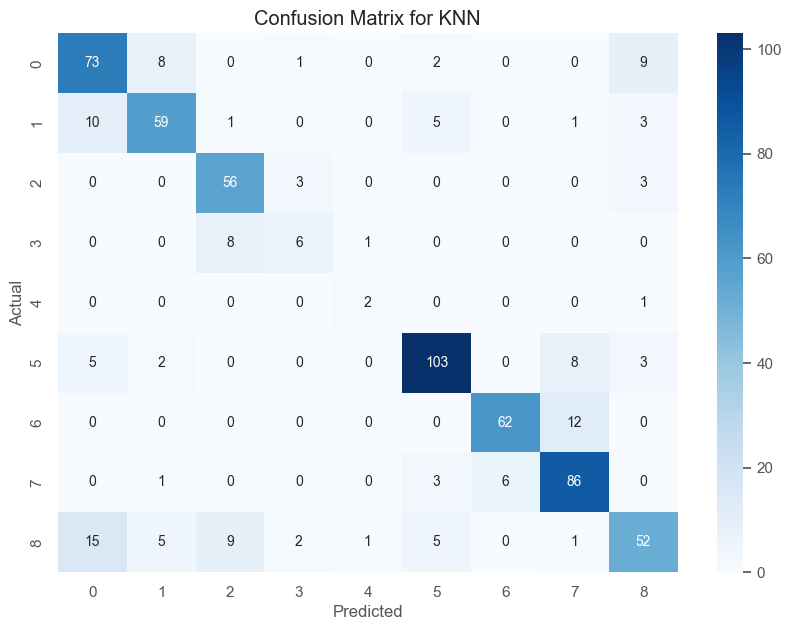

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Treinar o modelo KNN com o melhor valor de k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Treinar o modelo Decision Tree
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)
y_pred_dct = dct.predict(X_test)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Matriz de confusão (suportando multiclass)
cm_knn = confusion_matrix(y_test, y_pred_knn)
# Plotar matriz de confusão para KNN
plot_confusion_matrix(cm_knn, 'Confusion Matrix for KNN')


### Alínea b)  - Compare os resultados dos modelos anteriores. Discuta em detalhe qual o modelo que apresentou melhor e pior desempenho de acordo com as seguintes métricas: Accuracy; Sensitivity; Specificity e F1.

In [ ]:
calculate_metrics(y_test, y_pred_knn)

Model Metrics:
Accuracy: 0.7883096366508688
Sensitivity: 0.7883096366508688
Specificity: 0.9668574954617458
F1 Score: 0.7855263529532105


### Alínea a) Verifique se existe diferença significativa no desempenho dos dois melhores modelos obtidos anteriormente (use um nível de significância de 5%).Identifique o modelo que apresenta o melhor desempenho.

In [ ]:
# Verificar se a diferença de desempenho entre os modelos obtidos anteriormente é estatisticamente significativa.

from scipy import stats

residuos_dt = y_test - Y_PRED_DT
residuos_svm = y_test - Y_PRED_SVM

# Teste t para comparar os resultados entre o modelo da árvore de decisão e o modelo de SVM (os dois melhores modelos)
t_stat_tree_nn, p_value = stats.ttest_rel(residuos_dt,residuos_svm)
# Este teste comparará os resíduos dos modelos da árvore de decisão e SVM para verificar se a diferença de desempenho entre eles é estatisticamente significativa.
# Nível de significância
alpha = 0.05


if p_value < alpha:
    print("Conclusão: O p_value é cerca de",p_value.round(4),", logo, o desempenho entre estes modelos apresentam diferenças  estatisticamente significativas.")
else:
    print("Conclusão: O p_value é cerca de",p_value.round(4),", logo, o desempenho entre estes modelos não apresentam diferenças  estatisticamente significativas.")





Conclusão: O p_value é cerca de 0.3308 , logo, o desempenho entre estes modelos não apresentam diferenças  estatisticamente significativas.


c) Seleção de atributos: Os modelos de classificação desenvolvidos podem obter
um melhor desempenho se utilizarem apenas alguns dos atributos disponíveis?
Avalie esta hipótese realizando uma seleção de atributos, justificando as
escolhas realizadas. Pode basear-se no diagrama de correlação obtido
anteriormente, para justificar as escolhas efetuadas.

- Árvores de Decisão: Utilizando a função DecisionTreeClassifier desenvolva um
modelo de classificação que responda ao problema proposto. Deve fazer o ajuste
dos parâmetros do modelo, de forma a garantir que não está a ocorrer
overfitting nos dados de treino;


Para determinar quais atributos foram selecionados, consultamos o "Diagrama de Correlação entre Atributos" para identificar quais atributos possuem maior relação com o atributo "Label". Constatamos que os únicos atributos com maior correlação com o atributo "Label" foram "Peso" e "IMC".

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned[['Peso', 'IMC']].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
X_train.shape, X_test.shape


((1476, 2), (633, 2))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test)

0.9620853080568721

In [ ]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
tree_train = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", tree_train)
tree_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", tree_test)

Train Accuracy: 1.0
Test Accuracy: 0.9620853080568721


In [ ]:
# Lets also get the training error rate of the tree model
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_true = y_train, y_pred=clf.predict(X_train), labels=[True, False])
print(cmatrix)

error_rate = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Training Error Rate:", error_rate)

[[159   0]
 [  0 235]]
Training Error Rate: 0.0


In [ ]:
# Lets compute the error rate of the tree model

ypred = clf.predict(X_test)
cmatrix = confusion_matrix(y_true=y_test, y_pred=ypred, labels=[True, False])
print(cmatrix)
error_rate_test = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Test Error Rate:", error_rate_test)

[[79  0]
 [ 0 90]]
Test Error Rate: 0.0


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       1.00      1.00      1.00        79
           2       1.00      0.98      0.99        62
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00         3
           5       0.98      1.00      0.99       121
           6       0.91      0.84      0.87        74
           7       0.88      0.92      0.90        96
           8       0.97      1.00      0.98        90

    accuracy                           0.96       633
   macro avg       0.96      0.97      0.97       633
weighted avg       0.96      0.96      0.96       633



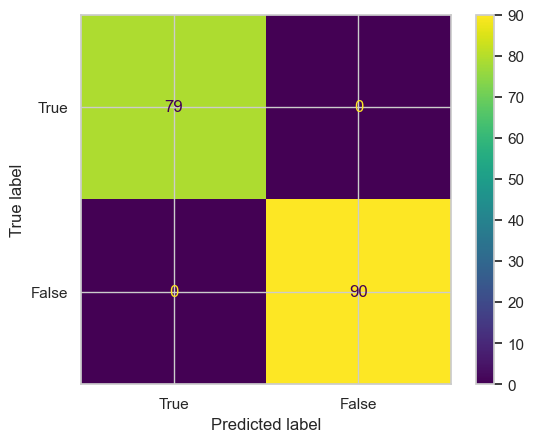

In [ ]:
# confusion matrix in sklearn

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def matriz_confusao(actual, predicted):

    # outcome values order in sklearn
    matrix = confusion_matrix(y_true = actual, y_pred = predicted, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[True, False])
    disp.plot()

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual,predicted)
    print('Classification report : \n',matrix)

# chamada à função
res = matriz_confusao(y_test,ypred)

#### k-fold cross validation

In [ ]:
# K-Fold Cross Validation - implementation
#
# Splitting the Data into Folds

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size : (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = kfold_indices(X, k)

In [ ]:
model = DecisionTreeClassifier()

scores = []
prevs_folds=[]
y_folds=[]
# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)
    
    # Append the fold score to the list of scores
    scores.append(fold_score)


    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores: [1.0, 0.9691211401425178, 0.995249406175772, 0.995249406175772, 0.8836104513064132]
Mean Accuracy: 0.968646080760095
Standart Deviation: 0.04388582016106794


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       238
           2       0.95      1.00      0.97       208
           3       1.00      0.77      0.87        43
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00       369
           6       0.92      0.88      0.90       266
           7       0.91      0.94      0.92       337
           8       1.00      1.00      1.00       305

    accuracy                           0.97      2105
   macro avg       0.97      0.95      0.96      2105
weighted avg       0.97      0.97      0.97      2105



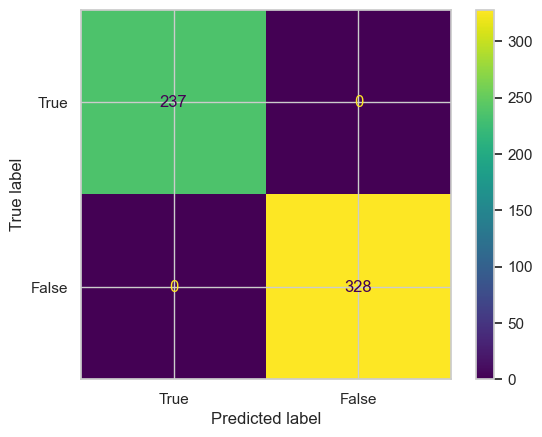

In [ ]:
resultados = matriz_confusao(np.concatenate(y_folds), np.concatenate(prevs_folds))

- SVM: Utilizando a função SVC desenvolva um modelo de classificação que
responda ao problema proposto. Deve testar todos os Kernels possíveis, e fazer
ajuste de parâmetros, de forma a garantir que não está a ocorrer overfitting nos
dados de treino. No final, deve identificar o modelo com o melhor desempenho,
justificando;

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned[['Peso', 'IMC']].values

In [ ]:
from sklearn.model_selection import train_test_split

n_sample = len(X)

order = np.random.permutation(n_sample)

X = X[order]
y = y[order]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [ ]:
from sklearn import svm
import seaborn as sns

for kernel in ['linear', 'poly', 'rbf' ]:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    calculate_metrics(y_test, y_pred)
    

Model Metrics:
Accuracy: 0.957345971563981
Sensitivity: 0.957345971563981
Specificity: 0.9937049298051662
F1 Score: 0.9573318060288893
Model Metrics:
Accuracy: 0.8499210110584519
Sensitivity: 0.8499210110584519
Specificity: 0.9803695748316992
F1 Score: 0.8368765924792171
Model Metrics:
Accuracy: 0.7582938388625592
Sensitivity: 0.7582938388625592
Specificity: 0.9650743779550999
F1 Score: 0.7445347766006639


In [ ]:
import sklearn.model_selection as skm

kfold = skm.KFold(n_splits=10, random_state=123, shuffle=True)
grid = skm.GridSearchCV(svm.SVC(kernel='linear', gamma=10),
                        {'C': [0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 100}

In [ ]:
import sklearn.model_selection as skm

kfold = skm.KFold(n_splits=10, random_state=123, shuffle=True)
grid = skm.GridSearchCV(svm.SVC(kernel='rbf', gamma=10),
                        {'C': [0.001,0.01,0.1,1,5,10,100]},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5}

In [ ]:
from sklearn import svm
import seaborn as sns

for kernel in ['linear', 'poly', 'rbf' ]:
    clf = svm.SVC(kernel=kernel,C=100)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc=accuracy_score(y_test, y_pred)

    calculate_metrics(y_test, y_pred)

print("-----------------------------")

for kernel in ['linear', 'poly', 'rbf' ]:
    clf = svm.SVC(kernel=kernel,C=5)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    acc=accuracy_score(y_test, y_pred)

    calculate_metrics(y_test, y_pred)

Model Metrics:
Accuracy: 0.9699842022116903
Sensitivity: 0.9699842022116903
Specificity: 0.9954004056508434
F1 Score: 0.9700280265636936
Model Metrics:
Accuracy: 0.933649289099526
Sensitivity: 0.933649289099526
Specificity: 0.9912501662745623
F1 Score: 0.9320282294963439
Model Metrics:
Accuracy: 0.9352290679304898
Sensitivity: 0.9352290679304898
Specificity: 0.991988023572807
F1 Score: 0.9325752977306051
-----------------------------
Model Metrics:
Accuracy: 0.9510268562401264
Sensitivity: 0.9510268562401264
Specificity: 0.9928187586803796
F1 Score: 0.9510664321268846
Model Metrics:
Accuracy: 0.8846761453396524
Sensitivity: 0.8846761453396524
Specificity: 0.9850734389584411
F1 Score: 0.8704931256038146
Model Metrics:
Accuracy: 0.8451816745655608
Sensitivity: 0.8451816745655608
Specificity: 0.9787900013800883
F1 Score: 0.8311550999198706


BEST

In [ ]:
from sklearn import svm
import seaborn as sns

clf = svm.SVC(kernel='linear',C=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc=accuracy_score(y_test, y_pred)



#### k-fold cross validation

In [ ]:
# K fold cross validation for SVM model to obtain scores, mean and standard deviation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)



K-Fold Cross-Validation Scores: [0.97156398 0.98104265 0.97156398 0.99052133 0.98578199 0.97630332
 0.95734597 0.97156398 0.95734597 0.96190476]
Mean Accuracy: 0.9724937937260213
Standart Deviation: 0.010783310701955288


- Rede Neuronal: Utilizando o package do Keras, deve desenvolver um modelo de
classificação que responda ao problema proposto. Deve fazer uma otimização da
arquitetura e dos parâmetros do modelo. No final deve apresentar a arquitetura
encontrada, e os parâmetros escolhidos, tentando justificar as escolhas
efetuadas durante o processo de otimização;

### MODEL 1

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned[['Peso', 'IMC']].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1476, 2), (633, 2))

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import backend

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,validation_split=0.2 ,epochs=1000)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 777 (3.04 KB)

 Trainable params: 777 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2574 - loss: 2.1106 - val_accuracy: 0.3480 - val_loss: 1.9107
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3622 - loss: 1.8357 - val_accuracy: 0.3919 - val_loss: 1.6771
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4036 - loss: 1.6167 - val_accuracy: 0.4696 - val_loss: 1.5050
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5029 - loss: 1.4632 - val_accuracy: 0.5912 - val_loss: 1.3792
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5971 - loss: 1.3522 - val_accuracy: 0.6689 - val_loss: 1.2764
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - loss: 1.2614 - val_accuracy: 0.7196 - val_loss: 1.1880
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 1.1820 - val_accuracy: 0.7432 - val_loss: 1.1104
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 1.1112 - val_accurac

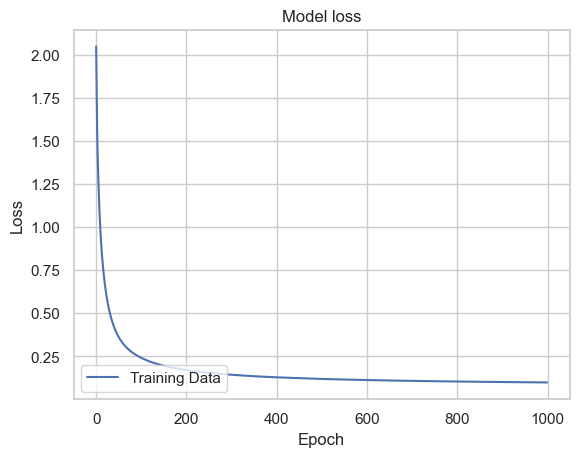

In [ ]:
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower left')

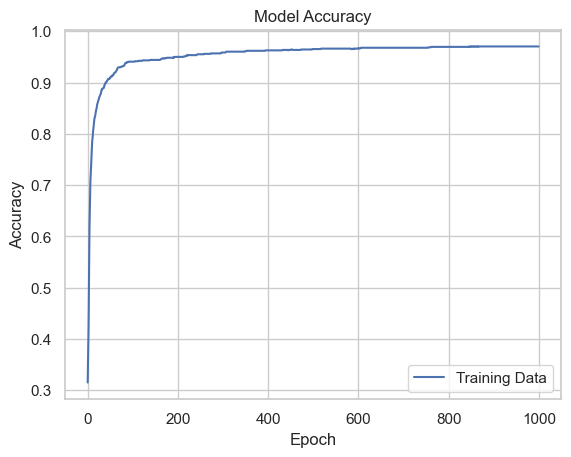

In [ ]:
plt.plot(history.history['accuracy'],)

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

### MODEL 2

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

print(model2.summary())
history2 = model2.fit(X_train, y_train,validation_split=0.2,  epochs=1000)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,569 (10.04 KB)

 Trainable params: 2,569 (10.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1849 - loss: 2.1275 - val_accuracy: 0.2905 - val_loss: 1.8759
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2917 - loss: 1.7551 - val_accuracy: 0.3345 - val_loss: 1.5367
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4199 - loss: 1.4406 - val_accuracy: 0.6014 - val_loss: 1.2949
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6177 - loss: 1.2393 - val_accuracy: 0.7196 - val_loss: 1.1002
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 1.0633 - val_accuracy: 0.7399 - val_loss: 0.9204
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7524 - loss: 0.9030 - val_accuracy: 0.8108 - val_loss: 0.7753
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.7761 - val_accuracy: 0.8514 - val_loss: 0.6673
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.6813 - val_accurac

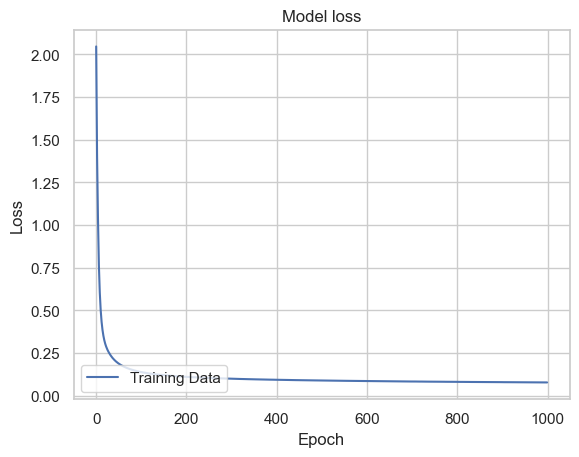

In [ ]:
plt.plot(history2.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower left')

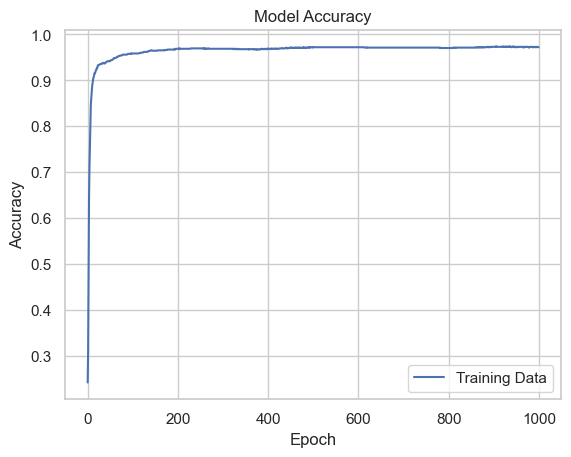

In [ ]:
plt.plot(history2.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')


### MODEL 3

In [ ]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
print(model3.summary())
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=1000)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,017 (43.04 KB)

 Trainable params: 11,017 (43.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2882 - loss: 2.0436 - val_accuracy: 0.3514 - val_loss: 1.6198
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3462 - loss: 1.4856 - val_accuracy: 0.4797 - val_loss: 1.2174
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5738 - loss: 1.1540 - val_accuracy: 0.7905 - val_loss: 0.8937
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.8540 - val_accuracy: 0.8345 - val_loss: 0.6420
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.6228 - val_accuracy: 0.8649 - val_loss: 0.5045
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8767 - loss: 0.4933 - val_accuracy: 0.8784 - val_loss: 0.4275
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8932 - loss: 0.4183 - val_accuracy: 0.8818 - val_loss: 0.3793
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8993 - loss: 0.3685 - val_accurac

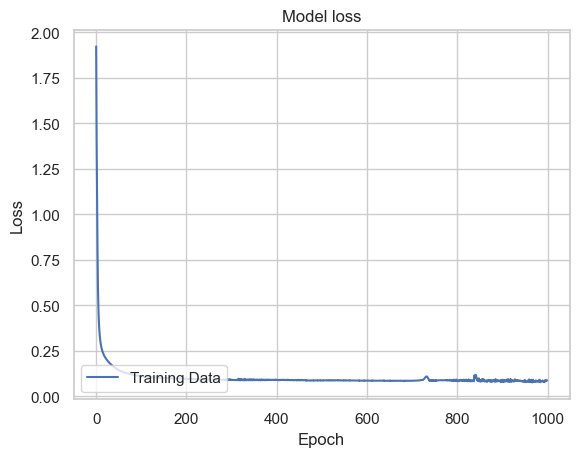

In [ ]:
plt.plot(history3.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower left')

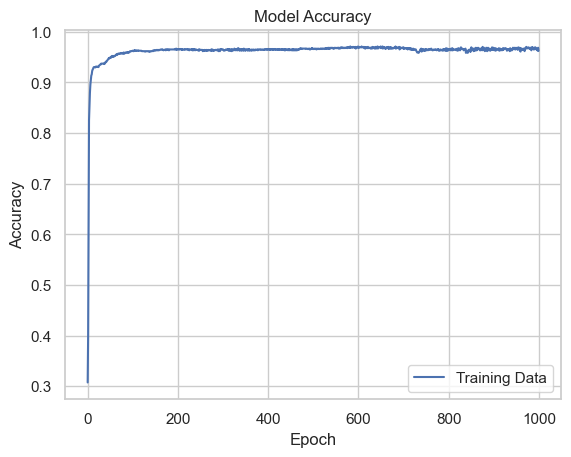

In [ ]:
plt.plot(history3.history['accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

### Comparação dos Resultados

In [ ]:
print("Comparação da loss dos 3 modelos")
print("Loss do modelo 1: ", np.min(history.history['loss']))
print("Loss do modelo 2: ", np.min(history2.history['loss']))
print("Loss do modelo 3: ", np.min(history3.history['loss']))

Comparação da loss dos 3 modelos
Loss do modelo 1:  0.09890715777873993
Loss do modelo 2:  0.07796577364206314
Loss do modelo 3:  0.07698247581720352


In [ ]:
print("Comparação da accuracy dos 3 modelos")
print("Accuracy do modelo 1: ", np.max(history.history['accuracy']))
print("Accuracy do modelo 2: ", np.max(history2.history['accuracy']))
print("Accuracy do modelo 3: ", np.max(history3.history['accuracy']))

Comparação da accuracy dos 3 modelos
Accuracy do modelo 1:  0.9703390002250671
Accuracy do modelo 2:  0.9737288355827332
Accuracy do modelo 3:  0.9711864590644836


### Evaliar os modelos usando os dados de Teste

In [ ]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
loss2, accuracy2 = model2.evaluate(X_test, y_test)
loss3, accuracy3 = model3.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9754 - loss: 0.0883
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9655 - loss: 0.0655
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9591 - loss: 0.0799


In [ ]:
Y_pred = model.predict(X_test)
Y_pred2 = model2.predict(X_test)
Y_pred3 = model3.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_pred_labels2 = [np.argmax(i) for i in Y_pred2]
Y_pred_labels3 = [np.argmax(i) for i in Y_pred3]

print(Y_pred_labels)

[5, 6, 0, 0, 2, 0, 1, 6, 8, 5, 6, 8, 5, 1, 0, 3, 5, 5, 2, 8, 0, 2, 0, 2, 2, 0, 1, 6, 1, 0, 6, 2, 8, 6, 2, 1, 1, 5, 2, 2, 7, 0, 8, 7, 0, 5, 1, 8, 0, 1, 1, 7, 1, 8, 5, 7, 0, 8, 5, 6, 0, 8, 5, 2, 3, 8, 0, 2, 0, 6, 5, 2, 6, 5, 2, 2, 5, 5, 8, 5, 8, 7, 0, 2, 7, 1, 8, 0, 7, 0, 5, 7, 1, 5, 0, 1, 5, 5, 5, 5, 1, 1, 5, 6, 8, 5, 8, 5, 2, 0, 2, 1, 2, 0, 0, 5, 2, 7, 8, 7, 0, 7, 5, 2, 6, 1, 1, 0, 7, 5, 1, 6, 7, 7, 6, 7, 5, 2, 0, 6, 5, 5, 7, 5, 8, 8, 5, 2, 1, 0, 6, 0, 1, 7, 5, 0, 4, 5, 0, 6, 1, 5, 5, 7, 7, 6, 6, 8, 2, 2, 5, 7, 5, 1, 1, 2, 7, 7, 6, 6, 5, 1, 1, 0, 8, 5, 8, 5, 5, 5, 2, 5, 0, 0, 7, 2, 1, 6, 2, 5, 1, 7, 0, 0, 6, 5, 6, 8, 5, 5, 7, 6, 7, 7, 7, 3, 7, 7, 6, 5, 8, 8, 5, 3, 0, 7, 7, 2, 7, 8, 7, 0, 1, 5, 7, 8, 8, 5, 8, 2, 3, 2, 3, 5, 8, 5, 7, 8, 7, 6, 2, 1, 5, 1, 7, 6, 7, 8, 8, 6, 6, 5, 6, 0, 5, 0, 3, 2, 0, 5, 7, 1, 7, 2, 3, 2, 2, 0, 8, 3, 2, 5, 8, 5, 2, 7, 8, 8, 5, 2, 2, 8, 5, 1, 6, 7, 6, 5, 3, 7, 8, 5, 1, 7, 1, 0, 2, 7, 6, 1, 0, 8, 8, 1, 5, 1, 6, 2, 6, 8, 2, 6, 7, 5, 5, 7, 0, 5, 5, 5, 0, 7, 8, 

Matriz de confusão do modelo 1


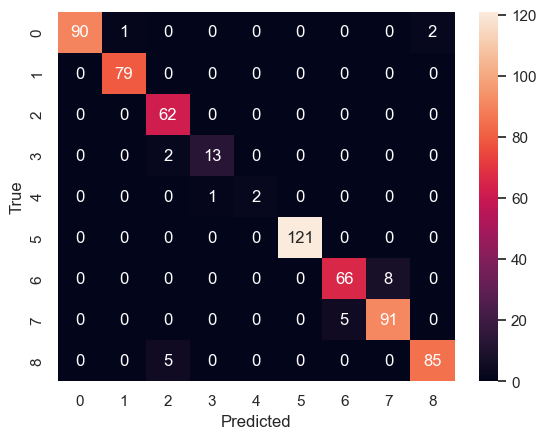

Métricas de avaliação do modelo 1
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.99      1.00      0.99        79
           2       0.90      1.00      0.95        62
           3       0.93      0.87      0.90        15
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00       121
           6       0.93      0.89      0.91        74
           7       0.92      0.95      0.93        96
           8       0.98      0.94      0.96        90

    accuracy                           0.96       633
   macro avg       0.96      0.92      0.94       633
weighted avg       0.96      0.96      0.96       633



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Matriz de confusão do modelo 1")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 1")
print(classification_report(y_test, Y_pred_labels))

Matriz de confusão do modelo 2


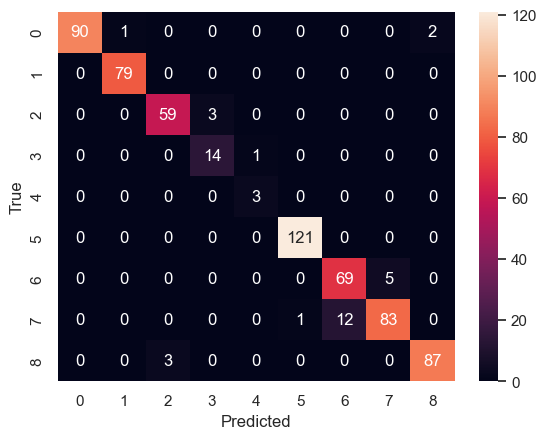

Métricas de avaliação do modelo 2
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.99      1.00      0.99        79
           2       0.95      0.95      0.95        62
           3       0.82      0.93      0.88        15
           4       0.75      1.00      0.86         3
           5       0.99      1.00      1.00       121
           6       0.85      0.93      0.89        74
           7       0.94      0.86      0.90        96
           8       0.98      0.97      0.97        90

    accuracy                           0.96       633
   macro avg       0.92      0.96      0.94       633
weighted avg       0.96      0.96      0.96       633



In [ ]:
print("Matriz de confusão do modelo 2")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels2)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 2")
print(classification_report(y_test, Y_pred_labels2))

Matriz de confusão do modelo 3


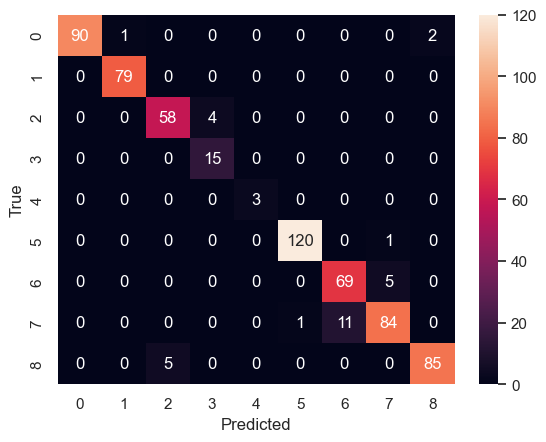

Métricas de avaliação do modelo 3
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.99      1.00      0.99        79
           2       0.92      0.94      0.93        62
           3       0.79      1.00      0.88        15
           4       1.00      1.00      1.00         3
           5       0.99      0.99      0.99       121
           6       0.86      0.93      0.90        74
           7       0.93      0.88      0.90        96
           8       0.98      0.94      0.96        90

    accuracy                           0.95       633
   macro avg       0.94      0.96      0.95       633
weighted avg       0.95      0.95      0.95       633



In [ ]:
print("Matriz de confusão do modelo 3")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels3)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 3")
print(classification_report(y_test, Y_pred_labels3))

#### k-fold cross validation

Com a melhor arquitetura (Model 1)

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import f1_score

# Definir o número de folds
num_folds = 10
kfold = StratifiedGroupKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Avaliar o modelo com validação cruzada
fold_no = 1
acc_per_fold = []
loss_per_fold = []
f1score_per_fold = []
scores_RN = []

for train, test in kfold.split(X_train,y_train):

    # Definir a arquitetura do modelo com maior precisão
    model4 = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(2,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(9, activation='softmax')
    ])

    # Compilar a rede neuronal
    model4.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
    # Ajustar o modelo
    history4 = model4.fit(X_train, y_train,validation_split=0.2, epochs=1000, verbose=0)

    # Gerar métricas de avaliação
    scores = model4.evaluate(X_test, y_test, verbose=0)
    scores_RN.append(scores[1])
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    Y_pred4 = model4.predict(X_test)
    Y_pred_labels4 = [np.argmax(i) for i in Y_pred4]
    f1score_per_fold.append(f1_score(y_test, Y_pred_labels4, average=None))

    # Incrementar o número do fold
    fold_no = fold_no + 1

# Apresentar os resultados
print(f'Resultados da validação cruzada em todos os folds: ')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> F1 Score: {np.mean(f1score_per_fold)}')
print('------------------------------------------------------------------------')
print("Mean scores for all folds:", np.mean(scores_RN))
print("Standar de scores for all folds:", np.std(scores_RN))
print(scores_RN)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:950: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Resultados da validação cruzada em todos os folds: 
> Accuracy: 96.145339012146 (+- 0.24676861988620621)
> Loss: 0.10257549062371255
> F1 Score: 0.9577314571842962
------------------------------------------------------------------------
Mean scores for all folds: 0.9614533901214599
Standar de scores for all folds: 0.002467686198862062
[0.9636650681495667, 0.9605055451393127, 0.9636650681495667, 0.9605055451393127, 0.9620853066444397, 0.9636650681495667, 0.9620853066444397, 0.9557662010192871, 0.958925724029541, 0.9636650681495667]


- K-vizinhos-mais-próximos: Utilizando a função KNeighborsClassifier desenvolva
um modelo de classificação que responda ao problema proposto. Deve fazer o
ajuste dos parâmetros do modelo, de forma a otimizar o seu desempenho.

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned[['Peso', 'IMC']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

rmse_val = [] #to store rmse values for different k
k_list = []
kmax = 50
kstep = 2

for k in range(1,kmax,kstep):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k_list.append(k) #store rmse values

    print('RMSE value for k= ' , k , 'is:', error)

# Menor valor de RMSE e respetivo valor de k
min_rmse = min(rmse_val)

#Encontrar o melhor valor de k
best_k = k_list[rmse_val.index(min_rmse)]
print('O melhor valor de k é', best_k)
print('Com um RMSE de', min_rmse)

RMSE value for k=  1 is: 0.8487515224843083
RMSE value for k=  3 is: 0.9776329539929683
RMSE value for k=  5 is: 0.9321364476459526
RMSE value for k=  7 is: 1.043296513237711
RMSE value for k=  9 is: 1.162880337483138
RMSE value for k=  11 is: 1.2302146642205136
RMSE value for k=  13 is: 1.3911251086550374
RMSE value for k=  15 is: 1.5072232611414111
RMSE value for k=  17 is: 1.5627981548075318
RMSE value for k=  19 is: 1.6203679881624455
RMSE value for k=  21 is: 1.6872348542501499
RMSE value for k=  23 is: 1.6522281379716341
RMSE value for k=  25 is: 1.6919099390056673
RMSE value for k=  27 is: 1.6517499935142272
RMSE value for k=  29 is: 1.7146336064662273
RMSE value for k=  31 is: 1.7663700606478923
RMSE value for k=  33 is: 1.7465832137607522
RMSE value for k=  35 is: 1.762788972198751
RMSE value for k=  37 is: 1.7686045587717047
RMSE value for k=  39 is: 1.7806223950473261
RMSE value for k=  41 is: 1.7636849259908802
RMSE value for k=  43 is: 1.7921189590395865
RMSE value for k= 

In [ ]:
import plotly.express as px

curve = pd.DataFrame(rmse_val)

fig = px.line(curve, x=k_list, y=curve[0], title='RMSE vs. K')
fig.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

acc_val = [] #to store rmse values for different k
k_list = []
kmax = 50
kstep = 2

for k in range(1,kmax,kstep):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    acc = accuracy_score(y_test,y_pred) #calculate accuracy
    acc_val.append(acc) #store rmse values
    k_list.append(k) #store rmse values

    print('Accuracy value for k= ' , k , 'is:', acc)

# Maior valor de Accuracy e respetivo valor de k
max_acc = max(acc_val)

#Encontrar o melhor valor de k
best_k = k_list[acc_val.index(max_acc)]
print('O melhor valor de k é', best_k)
print('Com um Acc de', max_acc)

Accuracy value for k=  1 is: 0.9210110584518167
Accuracy value for k=  3 is: 0.9210110584518167
Accuracy value for k=  5 is: 0.919431279620853
Accuracy value for k=  7 is: 0.909952606635071
Accuracy value for k=  9 is: 0.9004739336492891
Accuracy value for k=  11 is: 0.8957345971563981
Accuracy value for k=  13 is: 0.8815165876777251
Accuracy value for k=  15 is: 0.8720379146919431
Accuracy value for k=  17 is: 0.8657187993680885
Accuracy value for k=  19 is: 0.8609794628751974
Accuracy value for k=  21 is: 0.8483412322274881
Accuracy value for k=  23 is: 0.8451816745655608
Accuracy value for k=  25 is: 0.8309636650868878
Accuracy value for k=  27 is: 0.8309636650868878
Accuracy value for k=  29 is: 0.8230647709320695
Accuracy value for k=  31 is: 0.8230647709320695
Accuracy value for k=  33 is: 0.8167456556082149
Accuracy value for k=  35 is: 0.8151658767772512
Accuracy value for k=  37 is: 0.8151658767772512
Accuracy value for k=  39 is: 0.8120063191153238
Accuracy value for k=  41 i

In [ ]:
# Plotar a curva de Accuracy vs. K

curve = pd.DataFrame(acc_val)

fig = px.line(curve, x=k_list, y=curve[0], title='Accuracy vs. K')
fig.show()

#### k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=best_k)
# Trainar o modelo com cv de 5
cv_scores_knn = cross_val_score(knn_cv, X, y, cv=10)

# printar cada cv score (acurácia) e a média deles
print(cv_scores_knn)
print('cv_scores_knn mean:{}'.format(np.mean(cv_scores_knn)))
print('cv_scores_knn std:{}'.format(np.std(cv_scores_knn)))


[0.93838863 0.93838863 0.92890995 0.97156398 0.95734597 0.93364929
 0.97156398 0.95260664 0.92890995 0.75238095]
cv_scores_knn mean:0.9273707966598963
cv_scores_knn std:0.06029081349719548


### ----------------------------------------------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------------------------------------------

2. Novos preditores: A partir dos preditores que compõem o dataset disponibilizado,
derive novos preditores, que considere que possam ser úteis para utilizar em
modelos de classificação. Avalie se com a utilização dos novos preditores, nos dois
melhores modelos obtidos anteriormente, existe diferença significativa no
desempenho (use um nível de significância de 5%).

### Novo Preditor: Índice de massa corporal(BMI)

- BMI é uma uma métrica simples da relação entre peso e altura

Fórmula: 

$$ BMI = \frac{\text{Peso (kg)}}{\text{Altura (m)}^2} $$



### Novo Preditor: Metabolismo basal (BMR)

-  BMR representa a quantidade mínima de energia que o corpo precisa para manter suas funções vitais enquanto está em repouso;


Fórmula para Homens:
$$ BMR = 88.362 + (13.397 \times \text{Peso (kg)}) + (4.799 \times \text{Altura (m)} \times 100) - (5.677 \times \text{Idade (anos)}) $$
Fórmula para Mulheres:
$$ BMR = 447.593 + (9.247 \times \text{Peso (kg)}) + (3.098 \times \text{Altura (m)} \times 100) - (4.330 \times \text{Idade (anos)}) $$

### Novo Preditor: Necessidades calóricas diárias (NCD)

Fórmula: 

$$ NCD = BMR\times \ 1.5 $$


Criar novos preditores:

In [ ]:
# BMI
obesidade_cleaned['BMI'] = obesidade_cleaned['Peso'] / (obesidade_cleaned['Altura'] ** 2)
# Criar nova coluna 'BMR' com base no gênero
obesidade_cleaned['BMR'] = np.where(obesidade_cleaned['Genero'] == 0, 
                                    447.593 + (9.247 * obesidade_cleaned['Peso']) + (3.098 * obesidade_cleaned['Altura']) - (4.330 * obesidade_cleaned['Idade']), 
                                    88.362 + (13.397 * obesidade_cleaned['Peso']) + (4.799 * obesidade_cleaned['Altura']) - (5.677 * obesidade_cleaned['Idade']))

# Calcular calorias diárias com base no BMR
obesidade_cleaned['NCD'] = obesidade_cleaned['BMR'] * 1.5

C:\Users\User\AppData\Local\Temp\ipykernel_8376\3267923259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesidade_cleaned['BMI'] = obesidade_cleaned['Peso'] / (obesidade_cleaned['Altura'] ** 2)
C:\Users\User\AppData\Local\Temp\ipykernel_8376\3267923259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesidade_cleaned['BMR'] = np.where(obesidade_cleaned['Genero'] == 0,
C:\Users\User\AppData\Local\Temp\ipykernel_8376\3267923259.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

- Rede Neuronal:

In [ ]:
#target variable
y = obesidade_cleaned.loc[:, "Label"].values
#feature variable
X = obesidade_cleaned[['BMI', 'BMR', 'NCD', 'IMC', 'Peso']].values



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1476, 5), (633, 5))

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import backend

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(5,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,validation_split=0.2 ,epochs=1000)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 969 (3.79 KB)

 Trainable params: 969 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2676 - loss: 2.1825 - val_accuracy: 0.3345 - val_loss: 1.8342
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3676 - loss: 1.7366 - val_accuracy: 0.4223 - val_loss: 1.5643
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4651 - loss: 1.4988 - val_accuracy: 0.4696 - val_loss: 1.4150
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4905 - loss: 1.3720 - val_accuracy: 0.4966 - val_loss: 1.3154
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6062 - loss: 1.2848 - val_accuracy: 0.6014 - val_loss: 1.2319
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6702 - loss: 1.2087 - val_accuracy: 0.6757 - val_loss: 1.1556
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7098 - loss: 1.1378 - val_accuracy: 0.6926 - val_loss: 1.0828
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 1.0704 - val_accurac

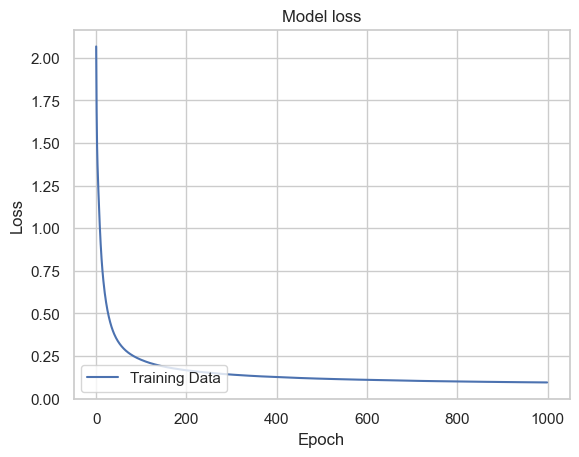

In [ ]:
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower left')

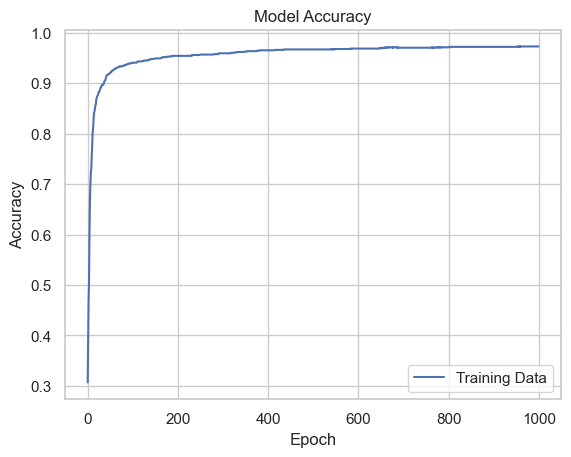

In [ ]:
plt.plot(history.history['accuracy'],)

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

In [ ]:
print("Loss do modelo 1: ", np.min(history.history['loss']))
print("Accuracy do modelo 1: ", np.max(history.history['accuracy']))

Loss do modelo 1:  0.09427125751972198
Accuracy do modelo 1:  0.9728813767433167


In [ ]:
loss1, accuracy1 = model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9736 - loss: 0.0829 


In [ ]:
Y_pred = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_PRED_NN = Y_pred_labels
print(Y_pred_labels)

[5, 6, 0, 0, 2, 0, 1, 6, 8, 5, 6, 8, 5, 1, 0, 3, 5, 5, 2, 8, 0, 2, 0, 2, 2, 0, 1, 6, 1, 0, 6, 2, 8, 6, 2, 1, 1, 5, 2, 2, 7, 0, 8, 7, 0, 5, 1, 8, 0, 1, 1, 7, 1, 8, 5, 7, 0, 8, 5, 6, 0, 8, 5, 2, 3, 8, 0, 2, 0, 6, 5, 2, 6, 5, 2, 2, 5, 5, 8, 5, 8, 7, 0, 2, 7, 1, 8, 0, 7, 0, 5, 7, 1, 5, 0, 1, 5, 5, 5, 5, 1, 1, 5, 6, 8, 5, 8, 5, 2, 0, 2, 1, 2, 0, 0, 5, 2, 7, 8, 7, 0, 7, 5, 2, 6, 1, 1, 0, 7, 5, 1, 6, 7, 7, 6, 7, 5, 2, 0, 6, 5, 5, 7, 5, 8, 8, 5, 2, 1, 0, 6, 0, 1, 7, 5, 0, 4, 5, 0, 6, 1, 5, 5, 7, 5, 6, 6, 8, 2, 2, 5, 7, 5, 1, 1, 2, 7, 7, 6, 6, 5, 1, 1, 0, 8, 5, 8, 5, 5, 5, 2, 5, 0, 0, 7, 2, 1, 6, 2, 5, 1, 7, 0, 0, 6, 5, 6, 8, 5, 5, 7, 6, 7, 7, 7, 3, 7, 7, 6, 5, 8, 8, 5, 3, 0, 7, 7, 2, 7, 8, 7, 0, 1, 5, 7, 8, 8, 5, 8, 2, 3, 2, 3, 5, 8, 5, 7, 8, 7, 6, 2, 1, 5, 1, 7, 6, 7, 8, 8, 6, 6, 5, 6, 0, 5, 0, 3, 2, 0, 5, 7, 1, 7, 2, 3, 2, 2, 0, 8, 3, 2, 5, 8, 5, 2, 6, 8, 8, 5, 2, 2, 8, 5, 1, 6, 7, 6, 5, 3, 6, 8, 5, 1, 7, 1, 0, 2, 7, 6, 1, 0, 8, 8, 1, 5, 1, 6, 2, 6, 8, 2, 6, 7, 5, 5, 7, 0, 5, 5, 5, 0, 7, 8, 

Matriz de confusão do modelo 1


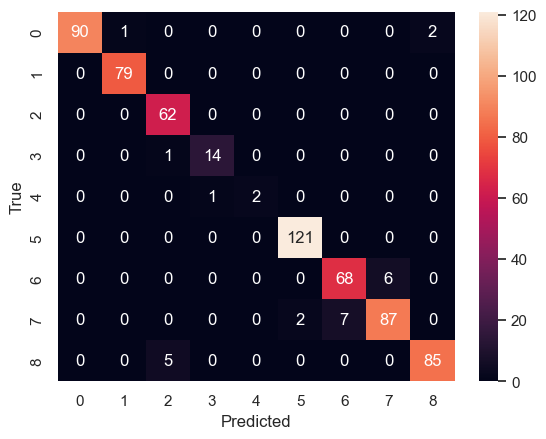

Métricas de avaliação do modelo 1
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.99      1.00      0.99        79
           2       0.91      1.00      0.95        62
           3       0.93      0.93      0.93        15
           4       1.00      0.67      0.80         3
           5       0.98      1.00      0.99       121
           6       0.91      0.92      0.91        74
           7       0.94      0.91      0.92        96
           8       0.98      0.94      0.96        90

    accuracy                           0.96       633
   macro avg       0.96      0.93      0.94       633
weighted avg       0.96      0.96      0.96       633



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Matriz de confusão do modelo 1")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 1")
print(classification_report(y_test, Y_pred_labels))

#### k-fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import f1_score

# Definir o número de folds
num_folds = 10
kfold = StratifiedGroupKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Avaliar o modelo com validação cruzada
fold_no = 1
acc_per_fold = []
loss_per_fold = []
f1score_per_fold = []
scores_RN = []

for train, test in kfold.split(X_train,y_train):

    # Definir a arquitetura do modelo com maior precisão
    model4 = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(5,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(9, activation='softmax')
    ])

    # Compilar a rede neuronal
    model4.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
    # Ajustar o modelo
    history4 = model4.fit(X_train, y_train,validation_split=0.2, epochs=1000, verbose=0)

    # Gerar métricas de avaliação
    scores = model4.evaluate(X_test, y_test, verbose=0)
    scores_RN.append(scores[1])
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    Y_pred4 = model4.predict(X_test)
    Y_pred_labels4 = [np.argmax(i) for i in Y_pred4]
    f1score_per_fold.append(f1_score(y_test, Y_pred_labels4, average=None))

    # Incrementar o número do fold
    fold_no = fold_no + 1

# Apresentar os resultados
print(f'Resultados da validação cruzada em todos os folds: ')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> F1 Score: {np.mean(f1score_per_fold)}')
print('------------------------------------------------------------------------')
print("Mean scores for all folds:", np.mean(scores_RN))
print("Standar de scores for all folds:", np.std(scores_RN))
print(scores_RN)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:950: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Resultados da validação cruzada em todos os folds: 
> Accuracy: 96.09794676303864 (+- 0.18758894568351323)
> Loss: 0.1003897801041603
> F1 Score: 0.9474345349478005
------------------------------------------------------------------------
Mean scores for all folds: 0.9609794676303863
Standar de scores for all folds: 0.0018758894568351322
[0.9605055451393127, 0.9605055451393127, 0.9636650681495667, 0.958925724029541, 0.9652448892593384, 0.9605055451393127, 0.9605055451393127, 0.9605055451393127, 0.9605055451393127, 0.958925724029541]


- SVM:

In [ ]:
y = obesidade_cleaned.loc[:, "Label"].values
X = obesidade_cleaned[['BMI', 'BMR', 'NCD', 'IMC', 'Peso']].values


In [ ]:
from sklearn.model_selection import train_test_split

n_sample = len(X)

order = np.random.permutation(n_sample)

X = X[order]
y = y[order]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [ ]:
from sklearn import svm
import seaborn as sns

clf = svm.SVC(kernel='linear',C=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Y_PRED_SVM2 = y_pred

#### k-fold cross validation

In [ ]:
# K fold cross validation for SVM model to obtain scores, mean and standard deviation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)



K-Fold Cross-Validation Scores: [0.94312796 0.96682464 0.97156398 0.96682464 0.96208531 0.95260664
 0.97630332 0.97156398 0.96208531 0.95714286]
Mean Accuracy: 0.9630128639133378
Standart Deviation: 0.009443597448482718


TTEST

In [ ]:
# Veifar se a diferença de desempenho entre os modelos obtidos anteriormente é estatisticamente significativa.

from scipy import stats

residuos_NN = y_test - Y_PRED_NN
residuos_svm = y_test - Y_PRED_SVM2
t_stat_tree_nn, p_value = stats.ttest_rel(residuos_NN,residuos_svm)
alpha = 0.05
if p_value< alpha:
    print("Conclusão: O p_value é cerca de",p_value.round(4),", logo, o desempenho entre estes modelos  apresentam diferenças  estatisticamente significativas.")
else:
    print("Conclusão: O p_value é cerca de",p_value.round(4),", logo, o desempenho entre estes modelos não apresentam diferenças  estatisticamente significativas.")


Conclusão: O p_value é cerca de 0.0942 , logo, o desempenho entre estes modelos não apresentam diferenças  estatisticamente significativas.


3. Estude a capacidade preditiva relativamente ao atributo “Genero” usando os
métodos:
- Rede Neuronal;
- SVM

Rede Neuronal:

In [ ]:
#target variable
y = obesidade_cleaned.loc[:, "Genero"].values
#feature variable
X = obesidade_cleaned[['Altura']].values


In [ ]:
obesidade_cleaned.head()

Genero  Idade  Altura  Peso  Historico_obesidade_familiar  FCCAC  FCV  NRP  \
0       0   21.0    1.62  64.0                             1      0  2.0  3.0   
1       0   21.0    1.52  56.0                             1      0  3.0  3.0   
2       1   23.0    1.80  77.0                             1      0  2.0  3.0   
3       1   27.0    1.80  87.0                             0      0  3.0  3.0   
4       1   22.0    1.78  89.8                             0      0  2.0  1.0   

   CCER  Fumador   CA  MCC  FAF  TUDE  CBA  TRANS  Label     IMC  
0     2        0  2.0    0  0.0   1.0    1      4      8  24.387  
1     2        1  3.0    1  3.0   0.0    2      4      8  24.238  
2     2        0  2.0    0  2.0   1.0    0      4      8  23.765  
3     2        0  2.0    0  2.0   0.0    0      2      0  26.852  
4     2        0  2.0    0  0.0   0.0    2      4      1  28.342

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((1476, 1), (633, 1))

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import backend

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train,validation_split=0.2 ,epochs=1000)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)            │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258 (1.01 KB)

 Trainable params: 258 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6377 - loss: 0.6444 - val_accuracy: 0.7703 - val_loss: 0.5317
Epoch 2/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7663 - loss: 0.5214 - val_accuracy: 0.7804 - val_loss: 0.4698
Epoch 3/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7777 - loss: 0.4795 - val_accuracy: 0.7770 - val_loss: 0.4505
Epoch 4/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7784 - loss: 0.4697 - val_accuracy: 0.7770 - val_loss: 0.4459
Epoch 5/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7819 - loss: 0.4677 - val_accuracy: 0.7770 - val_loss: 0.4446
Epoch 6/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7819 - loss: 0.4669 - val_accuracy: 0.7770 - val_loss: 0.4440
Epoch 7/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7819 - loss: 0.4662 - val_accuracy: 0.7770 - val_loss: 0.4435
Epoch 8/1000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7819 - loss: 0.4654 - val_accurac

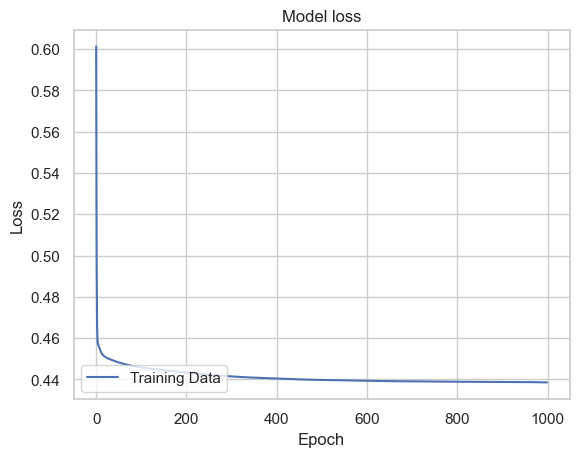

In [ ]:
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower left')

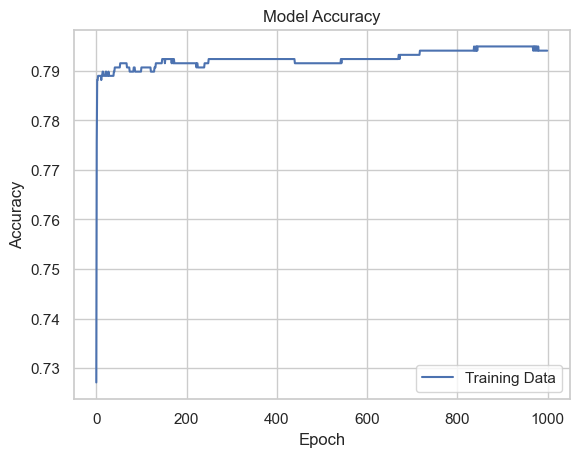

In [ ]:
plt.plot(history.history['accuracy'],)

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')

In [ ]:
print("Loss do modelo 1: ", np.min(history.history['loss']))
print("Accuracy do modelo 1: ", np.max(history.history['accuracy']))

Loss do modelo 1:  0.43850183486938477
Accuracy do modelo 1:  0.7949152588844299


In [ ]:
loss1, accuracy1 = model.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.7727 - loss: 0.4779


In [ ]:
Y_pred = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
Y_PRED_NN = Y_pred_labels
print(Y_pred_labels)

[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 

Matriz de confusão do modelo 1


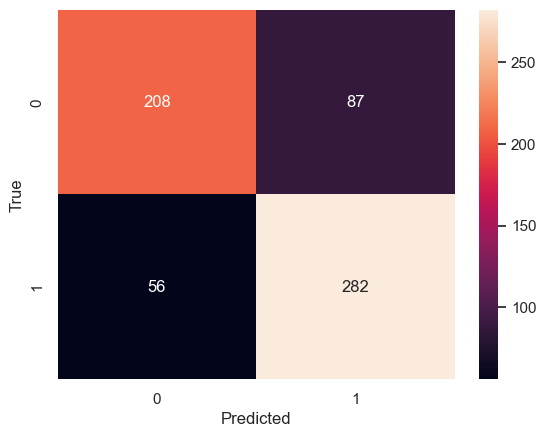

Métricas de avaliação do modelo 1
              precision    recall  f1-score   support

           0       0.79      0.71      0.74       295
           1       0.76      0.83      0.80       338

    accuracy                           0.77       633
   macro avg       0.78      0.77      0.77       633
weighted avg       0.78      0.77      0.77       633



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Matriz de confusão do modelo 1")
CV = confusion_matrix(y_true=y_test,y_pred= Y_pred_labels)
sns.heatmap(CV, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Métricas de avaliação do modelo 1")
print(classification_report(y_test, Y_pred_labels))

### Alínea c)  - Compare os resultados dos modelos. Identifique o modelo que apresenta o melhor desempenho, de acordo com os critérios: Accuracy; Sensitivity; Specificity e F1.

In [ ]:
calculate_metrics(y_test, Y_pred_labels)

Model Metrics:
Accuracy: 0.7740916271721959
Sensitivity: 0.7740916271721959
Specificity: 0.765312645217735
F1 Score: 0.7727803499437975


### Alínea a) Usando o método k-fold cross validation obtenha a média e o desvio padrão da taxa de acerto da previsão do atributo “Genero” com os dois melhores modelos obtidos na alínea anterior.

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import f1_score

# Definir o número de folds
num_folds = 10
kfold = StratifiedGroupKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Avaliar o modelo com validação cruzada
fold_no = 1
acc_per_fold = []
loss_per_fold = []
f1score_per_fold = []
scores_RN = []

for train, test in kfold.split(X_train,y_train):

    # Definir a arquitetura do modelo com maior precisão
    model4 = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(1,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')
    ])

    # Compilar a rede neuronal
    model4.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    
    # Ajustar o modelo
    history4 = model4.fit(X_train, y_train,validation_split=0.2, epochs=1000, verbose=0)

    # Gerar métricas de avaliação
    scores = model4.evaluate(X_test, y_test, verbose=0)
    scores_RN.append(scores[1])
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    Y_pred4 = model4.predict(X_test)
    Y_pred_labels4 = [np.argmax(i) for i in Y_pred4]
    f1score_per_fold.append(f1_score(y_test, Y_pred_labels4, average=None))

    # Incrementar o número do fold
    fold_no = fold_no + 1

# Apresentar os resultados
print(f'Resultados da validação cruzada em todos os folds: ')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> F1 Score: {np.mean(f1score_per_fold)}')
print('------------------------------------------------------------------------')
print("Mean scores for all folds:", np.mean(scores_RN))
print("Standar de scores for all folds:", np.std(scores_RN))
print(scores_RN)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Resultados da validação cruzada em todos os folds: 
> Accuracy: 77.74091601371765 (+- 0.5018125225708828)
> Loss: 0.48134882748126984
> F1 Score: 0.7753322438121615
------------------------------------------------------------------------
Mean scores for all folds: 0.7774091601371765
Standar de scores for all folds: 0.0050181252257088275
[0.7835702896118164, 0.7835702896118164, 0.7819905281066895, 0.7740916013717651, 0.7709320783615112, 0.7804107666015625, 0.7788309454917908, 0.7788309454917908, 0.7693523168563843, 0.7725118398666382]


- SVM:

In [ ]:
#target variable
y = obesidade_cleaned.loc[:, "Genero"].values
#feature variable
X = obesidade_cleaned[['Altura']].values

In [ ]:
from sklearn.model_selection import train_test_split

n_sample = len(X)

order = np.random.permutation(n_sample)

X = X[order]
y = y[order]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [ ]:
from sklearn import svm
import seaborn as sns

clf = svm.SVC(kernel='linear',C=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Y_PRED_SVM2 = y_pred

### Alínea a) Usando o método k-fold cross validation obtenha a média e o desvio padrão da taxa de acerto da previsão do atributo “Genero” com os dois melhores modelos obtidos na alínea anterior.

In [ ]:
# K fold cross validation for SVM model to obtain scores, mean and standard deviation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores: [0.7535545  0.79620853 0.78199052 0.81042654 0.76303318 0.7535545
 0.81990521 0.81516588 0.79146919 0.74285714]
Mean Accuracy: 0.7828165199729181
Standart Deviation: 0.026720640282463147


### Alínea b)  -Verifique se existe diferença significativa no desempenho dos dois melhores modelos obtidos anteriormente (use um nível de significância de 5%).

In [ ]:
# Verificar se a diferença de desempenho entre os modelos obtidos anteriormente é estatisticamente significativa.

from scipy import stats

residuos_NN = y_test - Y_PRED_NN
residuos_svm = y_test - Y_PRED_SVM2
t_stat_tree_nn, p_value = stats.ttest_rel(residuos_NN,residuos_svm)
alpha = 0.05
if p_value < alpha:
    print("Conclusão: O p_value é cerca de",p_value.round(4),", logo, o desempenho entre estes modelos apresentam diferenças  estatisticamente significativas.")
else:
    print("Conclusão: O p_value é cerca de",p_value.round(4),", logo, o desempenho entre estes modelos não apresentam diferenças  estatisticamente significativas.")

Conclusão: O p_value é cerca de 0.3446 , logo, o desempenho entre estes modelos não apresentam diferenças  estatisticamente significativas.


### Alínea c)  - Compare os resultados dos modelos. Identifique o modelo que apresenta o melhor desempenho, de acordo com os critérios: Accuracy; Sensitivity; Specificity e F1.

In [ ]:
calculate_metrics(y_test, y_pred)

Model Metrics:
Accuracy: 0.7835703001579779
Sensitivity: 0.7835703001579779
Specificity: 0.7833945203507471
F1 Score: 0.7828875104701242


### Referências:

#### 1. ChatGPT: https://chat.openai.com
#### 2. Hospital da Luz: https://www.hospitaldaluz.pt/pt/saude-e-bem-estar/indice-massa-corporal-imc-calcular
#### 3. Copilot: https://github.com/features/copilot
#### 4. GeekForGeeks: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
#### 5. Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#### 6. Projectpro: https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv
#### 7. Moodel ISEP - ANADI: https://moodle.isep.ipp.pt/course/view.php?id=4965
#### 8. Pediatri Concall: https://www.pediatriconcall.com/calculators/basel-metabolic-rate-bmr-calculator
#### 9. CDC:  https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html